In [1]:
import numpy as np

In [93]:
class Adam(object):
    
    def __init__(self, 
                 learning_rate=0.001,
                 beta1=0.9,
                 beta2=0.99,
                 velocity=0,
                 sqr_velocity=0,
                 epsilon=0.000001):
        
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.velocity = velocity
        self.epsilon = epsilon
        self.sqr_velocity = sqr_velocity
        self.t = 1
        
    def __call__(self, weights, gradients):
        
        self.velocity = self.beta1 * self.velocity + (1-self.beta1)* gradients
        self.sqr_velocity = self.beta2 * self.sqr_velocity + (1-self.beta2) * gradients**2
        
        velocity_corrected = self.velocity/(1-self.beta1**self.t)
        sqr_velocity_corrected = self.sqr_velocity / (1 -  self.beta2 ** self.t)
        
        weights -= self.learning_rate * velocity_corrected / np.sqrt(sqr_velocity_corrected + self.epsilon)
        self.t += 1
        
        return weights
        
class LinearRegression(object):
    """Multivariate linear regression using gradient descent"""
    
    def __init__(self, optimizer):
        self.optimizer = optimizer()
    
    def train(self, x, y, epochs=100, learning_rate=0.001):
        x = np.insert(x, 0, 1, axis=1)
        self.weights = (np.zeros(x.shape[1]))
        for _ in range(1, epochs):
            y_hat = x.dot(self.weights)
            y_error = y_hat - y
            y_error = y_error.reshape(y_error.size, 1)
            partial_gradients = 2 * (np.average((y_error * x), axis=0))
            
            self.weights = self.optimizer(self.weights, partial_gradients)
            print(partial_gradients)
            
    def validate(self, x, y):
        self._check_weights_exists('validating')
        
        x = np.insert(x, 0, 1, axis=1)
        
        predicted_y = np.dot(x, self.weights)
        rmse = np.sqrt(np.average(np.square(y-predicted_y))) 
        return predicted_y, rmse
        
        
    def predict(self, x):
        self._check_weights_exists('predicting')
        
        x = np.insert(x, 0, 1, axis=1)
        
        predicted_y = np.dot(x, self.weights)
        
        return predicted_y
    
    def _check_weights_exists(self, phrase):
        assert hasattr(self, 'weights'), ('ValueError: self.weights is not definded.'
            'PLease make sure to train the model before {}.'.format(phrase))

In [94]:
linear_regression = LinearRegression(optimizer=Adam)

In [95]:
x = np.random.randint(50, size=(100, 1))
y = np.squeeze(x * 0.9 + 100*np.random.rand())

In [105]:
linear_regression.train(x, y, learning_rate=0.1, epochs=100000) 

[ -123.51823383 -3451.31048351]
[ -123.46558209 -3449.58961165]
[ -123.39514891 -3447.28387136]
[ -123.31312515 -3444.59710988]
[ -123.22287628 -3441.64002612]
[ -123.12659543 -3438.48471792]
[ -123.02583856 -3435.18231972]
[ -122.9217644  -3431.77090218]
[ -122.81526251 -3428.2796882 ]
[ -122.70702977 -3424.73156847]
[ -122.59761969 -3421.14472324]
[ -122.48747608 -3417.53372861]
[ -122.37695699 -3413.91034403]
[ -122.26635239 -3410.28409187]
[ -122.15589742 -3406.66269509]
[ -122.04578273 -3403.05241503]
[ -121.93616255 -3399.45831633]
[ -121.82716105 -3395.88447787]
[ -121.71887758 -3392.33416255]
[ -121.61139083 -3388.80995537]
[ -121.50476229 -3385.31387652]
[ -121.39903911 -3381.8474748 ]
[ -121.29425643 -3378.41190508]
[ -121.19043934 -3375.007993  ]
[ -121.0876046  -3371.63628903]
[ -120.98576193 -3368.29711403]
[ -120.88491526 -3364.99059753]
[ -120.78506364 -3361.71671015]
[ -120.68620215 -3358.47529099]
[ -120.58832256 -3355.26607083]
[ -120.49141394 -3352.08869184]
[ -120.3

[  -89.50406834 -2336.26920264]
[  -89.45509599 -2334.66390675]
[  -89.40612638 -2333.05870091]
[  -89.3571595  -2331.45358493]
[  -89.30819535 -2329.84855865]
[  -89.25923393 -2328.24362189]
[  -89.21027522 -2326.63877449]
[  -89.16131923 -2325.03401629]
[  -89.11236594 -2323.42934713]
[  -89.06341537 -2321.82476684]
[  -89.01446749 -2320.22027527]
[  -88.9655223  -2318.61587226]
[  -88.9165798  -2317.01155767]
[  -88.86763999 -2315.40733133]
[  -88.81870286 -2313.80319311]
[  -88.76976841 -2312.19914287]
[  -88.72083663 -2310.59518045]
[  -88.67190751 -2308.99130571]
[  -88.62298106 -2307.38751852]
[  -88.57405727 -2305.78381875]
[  -88.52513613 -2304.18020625]
[  -88.47621765 -2302.5766809 ]
[  -88.42730181 -2300.97324257]
[  -88.37838862 -2299.36989112]
[  -88.32947806 -2297.76662644]
[  -88.28057014 -2296.1634484 ]
[  -88.23166485 -2294.56035688]
[  -88.1827622  -2292.95735176]
[  -88.13386216 -2291.35443293]
[  -88.08496475 -2289.75160026]
[  -88.03606995 -2288.14885365]
[  -87.9

[  -63.74230659 -1491.85380029]
[  -63.69493756 -1490.30126713]
[  -63.64757272 -1488.74887165]
[  -63.60021206 -1487.1966141 ]
[  -63.5528556  -1485.64449471]
[  -63.50550334 -1484.09251372]
[  -63.45815529 -1482.54067137]
[  -63.41081145 -1480.98896791]
[  -63.36347184 -1479.43740357]
[  -63.31613647 -1477.88597859]
[  -63.26880533 -1476.33469321]
[  -63.22147844 -1474.78354768]
[  -63.1741558  -1473.23254224]
[  -63.12683742 -1471.68167714]
[  -63.07952332 -1470.13095261]
[  -63.03221348 -1468.5803689 ]
[  -62.98490793 -1467.02992627]
[  -62.93760668 -1465.47962494]
[  -62.89030972 -1463.92946518]
[  -62.84301706 -1462.37944723]
[  -62.79572872 -1460.82957134]
[  -62.7484447  -1459.27983775]
[  -62.70116501 -1457.73024672]
[  -62.65388966 -1456.18079849]
[  -62.60661865 -1454.63149332]
[  -62.55935199 -1453.08233146]
[  -62.51208969 -1451.53331316]
[  -62.46483175 -1449.98443867]
[  -62.41757819 -1448.43570825]
[  -62.37032901 -1446.88712215]
[  -62.32308422 -1445.33868062]
[  -62.2

[ -35.4400936  -564.48535371]
[ -35.39822684 -563.11429084]
[ -35.35637819 -561.74382594]
[ -35.3145477  -560.37396095]
[ -35.27273545 -559.0046978 ]
[ -35.23094148 -557.63603846]
[ -35.18916585 -556.26798487]
[ -35.14740863 -554.90053902]
[ -35.10566987 -553.53370288]
[ -35.06394964 -552.16747844]
[ -35.022248   -550.80186768]
[ -34.980565   -549.43687263]
[ -34.9389007  -548.07249529]
[ -34.89725518 -546.70873768]
[ -34.85562848 -545.34560183]
[ -34.81402067 -543.9830898 ]
[ -34.77243182 -542.62120362]
[ -34.73086198 -541.25994536]
[ -34.68931122 -539.89931709]
[ -34.6477796  -538.53932088]
[ -34.60626719 -537.17995882]
[ -34.56477404 -535.82123301]
[ -34.52330022 -534.46314556]
[ -34.48184579 -533.10569858]
[ -34.44041083 -531.74889419]
[ -34.39899538 -530.39273454]
[ -34.35759953 -529.03722176]
[ -34.31622333 -527.68235801]
[ -34.27486685 -526.32814546]
[ -34.23353015 -524.97458628]
[ -34.1922133  -523.62168265]
[ -34.15091637 -522.26943677]
[ -34.10963942 -520.91785085]
[ -34.0683

[-18.14150068  -0.95208548]
[-18.13842042  -0.8652951 ]
[-18.13540051  -0.78050895]
[-18.1324402   -0.69770198]
[-18.12953873  -0.6168491 ]
[-18.12669535  -0.53792522]
[-18.12390928  -0.46090522]
[-18.12117978  -0.385764  ]
[-18.11850609  -0.31247643]
[-18.11588745  -0.24101741]
[-18.11332309  -0.17136183]
[-18.11081227  -0.1034846 ]
[-18.10835422  -0.03736068]
[-18.10594819   0.02703498]
[-18.10359343   0.08972736]
[-18.10128918   0.15074144]
[-18.09903468   0.21010212]
[-18.09682919   0.26783427]
[-18.09467196   0.32396268]
[-18.09256224   0.37851212]
[-18.09049928   0.43150724]
[-18.08848235   0.48297265]
[-18.0865107    0.53293288]
[-18.08458359   0.58141237]
[-18.0827003    0.62843546]
[-18.08086007   0.67402641]
[-18.0790622    0.71820937]
[-18.07730595   0.76100839]
[-18.07559059   0.80244742]
[-18.07391542   0.84255027]
[-18.0722797    0.88134065]
[-18.07068274   0.91884213]
[-18.06912383   0.95507815]
[-18.06760225   0.99007203]
[-18.06611731   1.02384694]
[-18.06466832   1.05

[-17.84107736   0.14436716]
[-17.84061094   0.14363418]
[-17.84014441   0.14290497]
[-17.83967776   0.14217951]
[-17.83921099   0.14145778]
[-17.83874412   0.14073976]
[-17.83827713   0.14002544]
[-17.83781003   0.13931479]
[-17.83734282   0.13860779]
[-17.83687549   0.13790442]
[-17.83640806   0.13720467]
[-17.83594052   0.13650852]
[-17.83547287   0.13581594]
[-17.83500511   0.13512692]
[-17.83453724   0.13444144]
[-17.83406927   0.13375948]
[-17.83360119   0.13308102]
[-17.833133     0.13240604]
[-17.83266471   0.13173453]
[-17.83219631   0.13106647]
[-17.83172781   0.13040184]
[-17.83125921   0.12974062]
[-17.8307905    0.12908279]
[-17.83032169   0.12842833]
[-17.82985277   0.12777724]
[-17.82938376   0.12712948]
[-17.82891464   0.12648505]
[-17.82844543   0.12584392]
[-17.82797611   0.12520608]
[-17.82750669   0.12457151]
[-17.82703718   0.12394019]
[-17.82656757   0.12331211]
[-17.82609786   0.12268725]
[-17.82562805   0.12206559]
[-17.82515814   0.12144711]
[-17.82468814   0.12

[-1.75876368e+01  1.01089867e-02]
[-1.75871497e+01  1.00583068e-02]
[-1.75866626e+01  1.00078813e-02]
[-1.75861755e+01  9.95770872e-03]
[-1.75856884e+01  9.90778796e-03]
[-1.75852013e+01  9.85811771e-03]
[-1.75847142e+01  9.80869672e-03]
[-1.75842271e+01  9.75952372e-03]
[-1.75837400e+01  9.71059747e-03]
[-1.75832529e+01  9.66191673e-03]
[-1.75827658e+01  9.61348026e-03]
[-1.75822786e+01  9.56528685e-03]
[-1.75817915e+01  9.51733526e-03]
[-1.75813043e+01  9.46962428e-03]
[-1.75808172e+01  9.42215270e-03]
[-1.75803300e+01  9.37491932e-03]
[-1.75798428e+01  9.32792294e-03]
[-1.75793556e+01  9.28116236e-03]
[-1.75788684e+01  9.23463642e-03]
[-1.75783812e+01  9.18834391e-03]
[-1.75778940e+01  9.14228368e-03]
[-1.75774068e+01  9.09645455e-03]
[-1.75769196e+01  9.05085536e-03]
[-1.75764324e+01  9.00548496e-03]
[-1.75759451e+01  8.96034219e-03]
[-1.75754579e+01  8.91542592e-03]
[-1.75749707e+01  8.87073500e-03]
[-1.75744834e+01  8.82626830e-03]
[-1.75739962e+01  8.78202470e-03]
[-1.75735089e+

[-1.72918136e+01  1.59266590e-03]
[-1.72913239e+01  1.62790311e-03]
[-1.72908488e+01  1.18300391e-03]
[-1.72903441e+01  1.71562664e-03]
[-1.72898656e+01  1.38280804e-03]
[-1.72893788e+01  1.32583331e-03]
[-1.72888794e+01  1.68261588e-03]
[-1.72884050e+01  1.21506164e-03]
[-1.72879071e+01  1.52375078e-03]
[-1.72874197e+01  1.48594415e-03]
[-1.72869386e+01  1.23576546e-03]
[-1.72864388e+01  1.61030717e-03]
[-1.72859607e+01  1.26233645e-03]
[-1.72854675e+01  1.41616012e-03]
[-1.72849771e+01  1.47681323e-03]
[-1.72844963e+01  1.22061794e-03]
[-1.72839982e+01  1.53631608e-03]
[-1.72835181e+01  1.25332197e-03]
[-1.72830255e+01  1.38830867e-03]
[-1.72825364e+01  1.40655405e-03]
[-1.72820531e+01  1.23050592e-03]
[-1.72815571e+01  1.47669051e-03]
[-1.72810767e+01  1.20746594e-03]
[-1.72805821e+01  1.40779381e-03]
[-1.72800970e+01  1.29158482e-03]
[-1.72796087e+01  1.28312475e-03]
[-1.72791172e+01  1.37936219e-03]
[-1.72786342e+01  1.19596750e-03]
[-1.72781393e+01  1.40641731e-03]
[-1.72776576e+

[-16.9902803    0.13401585]
[-16.99850616  -0.15438944]
[-16.98889882   0.14739895]
[-16.99530152  -0.08066841]
[-1.69926785e+01 -1.00261000e-02]
[-16.98910101   0.09220168]
[-16.99491469  -0.116372  ]
[-16.98841463   0.08258056]
[-1.69904105e+01  3.58679381e-04]
[-16.99206034  -0.07041214]
[-16.98649478   0.09761266]
[-16.99068397  -0.05719815]
[-1.69887719e+01 -1.00859996e-02]
[-16.9858814    0.06940702]
[-16.98973605  -0.07433211]
[-16.98589079   0.03675892]
[-16.98574044   0.02556621]
[-16.98786544  -0.06092958]
[-16.98373532   0.05958912]
[-1.69855209e+01 -1.56731829e-02]
[-16.98543811  -0.02910228]
[-16.98236426   0.05645881]
[-16.98483745  -0.04156048]
[-1.69828607e+01  7.69269122e-03]
[-16.98162814   0.03231522]
[-16.98346463  -0.04463211]
[-16.98057571   0.03480857]
[-1.69811730e+01 -1.12880886e-03]
[-16.98141212  -0.02520965]
[-16.97895196   0.04004124]
[-16.98048957  -0.02701479]
[-1.69790095e+01  5.80156977e-03]
[-16.97805768   0.02113199]
[-16.9791178   -0.03012128]
[-16.9

[-16.70488489   0.02382085]
[-16.70591756  -0.02652342]
[-16.7036228    0.03325417]
[-16.70516862  -0.03407275]
[-16.70245402   0.03959956]
[-16.70436198  -0.03971251]
[-16.70131468   0.0449704 ]
[-16.70354381  -0.04497074]
[-16.70018017   0.05018174]
[-16.70271389  -0.04984017]
[-16.69907807   0.05432011]
[-16.70181701  -0.05249351]
[-16.69808851   0.05473422]
[-16.70076053  -0.04986464]
[-16.69729881   0.04853399]
[-16.69948925  -0.04012701]
[-16.69670986   0.0356896 ]
[-16.69806555  -0.02534506]
[-16.69620497   0.02006342]
[-1.66966294e+01 -1.01495590e-02]
[-1.66956542e+01  5.95524527e-03]
[-1.66952703e+01  2.49179542e-03]
[-1.66950223e+01 -5.46597832e-03]
[-1.66939689e+01  1.32283596e-02]
[-1.66943773e+01 -1.64573806e-02]
[-16.69261546   0.02568423]
[-16.69386709  -0.03190674]
[-16.69102057   0.04613172]
[-16.6937196   -0.05936119]
[-16.68893752   0.08273521]
[-16.69407904  -0.1035925 ]
[-16.68660363   0.12764008]
[-16.69382474  -0.12751198]
[-16.68634623   0.10382321]
[-16.6903025

[-16.44330103   0.06370563]
[-1.64450868e+01 -1.15615654e-02]
[-16.44535611  -0.03664177]
[-16.44173594   0.06700127]
[-16.44496424  -0.05600717]
[-16.44208737   0.02303629]
[-16.44159856   0.02304628]
[-16.44327765  -0.04869061]
[-16.43970203   0.05347818]
[-16.44165014  -0.02716218]
[-1.64404822e+01 -4.67516491e-03]
[-16.43876226   0.03607839]
[-16.44067402  -0.04335887]
[-16.43779729   0.03567985]
[-1.64386377e+01 -8.30223674e-03]
[-1.64383582e+01 -1.52170772e-02]
[-16.43635095   0.03504547]
[-16.43795367  -0.03416393]
[-16.43567799   0.02498279]
[-1.64360180e+01 -2.43845528e-03]
[-1.64358813e+01 -1.40784613e-02]
[-16.43409358   0.02891794]
[-16.43532061  -0.02785804]
[-16.43330181   0.02278742]
[-1.64336940e+01 -6.35805874e-03]
[-1.64331827e+01 -5.60439358e-03]
[-16.43193143   0.01963898]
[-16.43271374  -0.02241901]
[-16.4308156    0.02423333]
[-1.64315253e+01 -1.54217174e-02]
[-1.64303025e+01  8.88092825e-03]
[-1.64299739e+01  3.58726095e-03]
[-1.64298793e+01 -9.44707609e-03]
[-16

[-1.61835986e+01  9.35518115e-03]
[-1.61836312e+01 -7.89108589e-03]
[-1.61825859e+01  1.05382976e-02]
[-1.61826361e+01 -7.28817000e-03]
[-1.61816663e+01  8.64099201e-03]
[-1.61815807e+01 -4.69453010e-03]
[-1.61807765e+01  5.75421794e-03]
[-1.61805192e+01 -1.89631646e-03]
[-1.61798772e+01  3.18396120e-03]
[-1.61794753e+01  3.19606386e-04]
[-1.61789585e+01  1.25454182e-03]
[-1.61784477e+01  1.99576111e-03]
[-1.61780301e+01 -3.50141228e-04]
[-1.61774205e+01  3.65751423e-03]
[-1.61771135e+01 -2.35015531e-03]
[-1.61763646e+01  6.26972224e-03]
[-1.61762495e+01 -6.08866306e-03]
[-1.61752201e+01  1.18152057e-02]
[-1.61755305e+01 -1.46270715e-02]
[-16.1738385    0.02520516]
[-16.1751959   -0.03588492]
[-16.17183313   0.05924036]
[-16.17581898  -0.08883872]
[-16.16849878   0.13725846]
[-16.17757871  -0.17941016]
[-16.16583548   0.19306792]
[-16.17470274  -0.11656245]
[-1.61710381e+01 -1.14475811e-02]
[-16.16642384   0.12509662]
[-16.17396546  -0.14066121]
[-16.16737996   0.06112091]
[-16.1668671

[-1.59085584e+01  1.03504344e-02]
[-1.59087403e+01 -1.18355950e-02]
[-15.90730257   0.01957961]
[-15.90815463  -0.02478505]
[-15.90575422   0.03849133]
[-15.90801944  -0.05264238]
[-15.9035404    0.07942657]
[-15.90873176  -0.10854831]
[-15.90053851   0.14644336]
[-15.9092758   -0.15888485]
[-15.89993298   0.1341519 ]
[-15.90502904  -0.05066898]
[-15.9043204   -0.04338198]
[-15.89911762   0.11263929]
[-15.90540424  -0.11158331]
[-15.8999229    0.05365713]
[-15.89998301   0.03550189]
[-15.90328659  -0.08999627]
[-15.89736989   0.08965251]
[-15.90040545  -0.02697575]
[-15.90037991  -0.04229636]
[-15.89611633   0.08264203]
[-15.89993815  -0.06000765]
[-1.58974839e+01  5.05210432e-03]
[-15.89555464   0.05273444]
[-15.898641  -0.065575]
[-15.89497898   0.03945453]
[-1.58952356e+01  1.47974589e-02]
[-15.8966913   -0.04954647]
[-15.89306371   0.05434386]
[-15.89479672  -0.01917643]
[-15.89432984  -0.01989064]
[-15.89179756   0.04775023]
[-15.8939279   -0.03891974]
[-1.58918888e+01  1.23978198

[-15.62189799   0.07305128]
[-15.62444727  -0.02748257]
[-15.6238117   -0.02261304]
[-15.62077758   0.06163691]
[-15.62401433  -0.06164914]
[-15.62056611   0.03630568]
[-1.56208903e+01  9.41032184e-03]
[-15.62193834  -0.04143849]
[-15.61851639   0.05564681]
[-15.62083137  -0.03713283]
[-1.56189839e+01  7.84569757e-03]
[-15.61791645   0.02700713]
[-15.61950251  -0.04164854]
[-15.61649867   0.04159924]
[-15.61783189  -0.01868891]
[-1.56169333e+01 -5.11625438e-03]
[-15.61540413   0.02932869]
[-15.61685464  -0.03484119]
[-15.61436601   0.03135571]
[-1.56151767e+01 -1.16404795e-02]
[-1.56145062e+01 -5.61435207e-03]
[-15.61312142   0.02405093]
[-15.61420523  -0.02798301]
[-15.61203993   0.02751315]
[-1.56128017e+01 -1.38633093e-02]
[-1.56118260e+01  2.26314369e-03]
[-1.56109948e+01  1.36087532e-02]
[-15.61151221  -0.01968142]
[-15.60966731   0.02521105]
[-15.61053384  -0.01963162]
[-1.56089935e+01  1.51811627e-02]
[-1.56090652e+01 -3.35607153e-03]
[-1.56085717e+01 -3.19038871e-03]
[-1.560758

[-15.33473077   0.02369572]
[-15.33685297  -0.06270299]
[-15.33282453   0.05445505]
[-1.53339786e+01  9.79216553e-05]
[-15.33484104  -0.04460986]
[-15.33131587   0.0558925 ]
[-15.33308737  -0.01889977]
[-15.33275045  -0.02391343]
[-15.33003467   0.04980193]
[-15.33201552  -0.03191885]
[-1.53306366e+01 -2.44888178e-03]
[-15.32896971   0.03655463]
[-15.33070283  -0.03696734]
[-15.32859216   0.01672178]
[-15.32807382   0.01771227]
[-15.32909613  -0.03228528]
[-15.32674923   0.02922186]
[-1.53272303e+01 -2.86375455e-03]
[-15.32719988  -0.01802047]
[-15.32524168   0.03062253]
[-15.32624509  -0.01874966]
[-1.53251371e+01  1.75554612e-03]
[-15.32411608   0.01938244]
[-15.3249041   -0.02286138]
[-15.32317084   0.01833706]
[-1.53232276e+01  2.93908268e-04]
[-1.53231178e+01 -1.22365584e-02]
[-15.32160451   0.02168301]
[-1.53222210e+01 -1.48853605e-02]
[-1.53210865e+01  6.49946123e-03]
[-1.53205283e+01  8.80824633e-03]
[-1.53207296e+01 -1.40191353e-02]
[-15.31928659   0.01757522]
[-1.53195962e+01

[-15.05094979  -0.05639797]
[-15.04589258   0.0948081 ]
[-15.05260238  -0.14341717]
[-15.04166951   0.20224534]
[-15.05339386  -0.2019377 ]
[-15.04337079   0.11361467]
[-15.04502976   0.0425474 ]
[-15.05036045  -0.15003589]
[-15.04099988   0.14359092]
[-15.04533796  -0.01614195]
[-15.04762649  -0.10804432]
[-15.03990824   0.13122943]
[-15.04419812  -0.02690799]
[-15.04555019  -0.08781823]
[-15.03898783   0.1132013 ]
[-15.04255031  -0.02086302]
[-15.04379992  -0.07838217]
[-15.03805543   0.09556987]
[-1.50407659e+01 -1.02963363e-02]
[-15.04215476  -0.07242465]
[-15.0370809    0.07933269]
[-1.50389996e+01 -3.31397371e-04]
[-15.04051679  -0.06670534]
[-15.03604655   0.0650753 ]
[-1.50373148e+01  6.93765530e-03]
[-15.03885952  -0.06034693]
[-15.03493568   0.05335012]
[-1.50357283e+01  1.09552505e-02]
[-15.03718815  -0.05352191]
[-15.03373968   0.04444259]
[-1.50342330e+01  1.19544185e-02]
[-15.03551512  -0.04664216]
[-15.0324614   0.0382582]
[-1.50328124e+01  1.04794686e-02]
[-15.03384784 

[-1.47590369e+01  3.86243354e-03]
[-14.75949665  -0.02751557]
[-14.75699367   0.03915878]
[-14.75842673  -0.02443097]
[-1.47570951e+01  3.47661236e-03]
[-14.75604833   0.02195805]
[-14.75711761  -0.02959225]
[-14.75490509   0.02746955]
[-1.47554937e+01 -8.17295838e-03]
[-1.47550043e+01 -8.13698508e-03]
[-14.75353942   0.02417989]
[-14.75450393  -0.02390308]
[-14.75272132   0.01893044]
[-1.47528761e+01 -2.35289230e-03]
[-1.47525811e+01 -8.75300728e-03]
[-14.75120949   0.02047806]
[-14.75192546  -0.01937921]
[-14.75033986   0.01693437]
[-1.47505062e+01 -4.73275651e-03]
[-1.47499631e+01 -2.92109605e-03]
[-1.47489694e+01  1.38036259e-02]
[-14.74936122  -0.01532636]
[-14.74787186   0.01780221]
[-1.47482613e+01 -1.12502940e-02]
[-1.47471988e+01  7.75111942e-03]
[-1.47468946e+01  1.65891122e-03]
[-1.47466112e+01 -5.12559581e-03]
[-1.47455985e+01  1.22267311e-02]
[-1.47458481e+01 -1.21933860e-02]
[-14.74452383   0.0154703 ]
[-1.47448669e+01 -1.20464205e-02]
[-1.47436314e+01  1.26802709e-02]
[-

[-1.45049788e+01 -8.35116764e-03]
[-1.45038819e+01  1.17896756e-02]
[-1.45040032e+01 -8.38651788e-03]
[-1.45029901e+01  8.98271924e-03]
[-1.45028864e+01 -3.74734230e-03]
[-1.45021815e+01  3.41806895e-03]
[-1.45017392e+01  1.89622234e-03]
[-1.45013637e+01 -1.83798703e-03]
[-1.45006242e+01  6.47310859e-03]
[-1.45005061e+01 -5.77924647e-03]
[-1.44995437e+01  9.91016199e-03]
[-1.44996285e+01 -9.05555566e-03]
[-1.44984622e+01  1.33791994e-02]
[-1.44987781e+01 -1.32360305e-02]
[-14.49732067   0.01883707]
[-14.49802892  -0.02076412]
[-14.49602267   0.02947183]
[-14.49750913  -0.03588425]
[-14.49439482   0.05102324]
[-14.49743384  -0.06571538]
[-14.49221455   0.0908567 ]
[-14.49786067  -0.11216414]
[-14.48995625   0.13327293]
[-14.4972488   -0.12423686]
[-14.49033433   0.08843769]
[-14.49312909  -0.02021692]
[-14.49335926  -0.04399577]
[-14.48878715   0.09115781]
[-14.4938738   -0.09334739]
[-14.48869848   0.0617694 ]
[-1.44900980e+01 -7.10561638e-04]
[-14.49110138  -0.05007768]
[-14.4867141  

[-14.24749206  -0.03592997]
[-14.24400996   0.06315028]
[-14.24728985  -0.06155894]
[-14.24360638   0.04418591]
[-1.42447026e+01 -8.25442317e-03]
[-14.24463765  -0.02226525]
[-14.24204218   0.04747187]
[-14.24450547  -0.0502117 ]
[-14.24123672   0.04180778]
[-14.24249868  -0.01611761]
[-1.42417425e+01 -7.25317204e-03]
[-14.24009678   0.03105275]
[-14.24172861  -0.03911347]
[-14.23882538   0.04080883]
[-14.24037585  -0.02666464]
[-1.42387218e+01  1.19175120e-02]
[-1.42383198e+01  9.05959932e-03]
[-14.23874693  -0.02123696]
[-14.2366311    0.03262637]
[-14.23808411  -0.03162166]
[-14.23574415   0.0296594 ]
[-14.23668927  -0.01778006]
[-1.42353943e+01  8.91526331e-03]
[-1.42350188e+01  5.18299420e-03]
[-1.42350649e+01 -1.25028203e-02]
[-14.23351908   0.02249586]
[-14.23445197  -0.02453878]
[-14.23234075   0.02917193]
[-14.23353223  -0.02642076]
[-14.23142394   0.02719296]
[-14.23241428  -0.02174293]
[-14.23063832   0.02087224]
[-14.23122944  -0.01485118]
[-1.42298656e+01  1.41231878e-02]


[-1.39582369e+01 -1.35419475e-02]
[-13.95681782   0.01726264]
[-13.95729997  -0.01485363]
[-13.95585352   0.01685745]
[-1.39562817e+01 -1.34743738e-02]
[-13.95493018   0.01509647]
[-1.39552585e+01 -1.19272193e-02]
[-13.95398195   0.01415945]
[-1.39542850e+01 -1.20290578e-02]
[-13.95296108   0.0156263 ]
[-13.95340835  -0.01533554]
[-13.95181187   0.0213405 ]
[-13.95270416  -0.02434951]
[-13.95042342   0.03497259]
[-13.95233274  -0.04437598]
[-13.94857202   0.06392614]
[-13.95255167  -0.08394046]
[-13.94608114   0.11404353]
[-13.9530713   -0.13345681]
[-13.94433977   0.13935554]
[-13.95108628  -0.10008121]
[-13.94653781   0.03429187]
[-13.94577408   0.04340833]
[-13.94936772  -0.09168348]
[-13.94299804   0.1029631 ]
[-13.94744721  -0.06044278]
[-1.39451969e+01 -2.12904076e-03]
[-13.94275729   0.06245243]
[-13.94661926  -0.08151988]
[-13.94175367   0.06334857]
[-1.39434578e+01 -9.20853436e-03]
[-13.9438917   -0.03972902]
[-13.94012505   0.06876945]
[-13.94337053  -0.05479965]
[-13.9406519

[-1.36803005e+01 -9.64499869e-03]
[-1.36793656e+01  5.13711714e-03]
[-1.36788740e+01  5.24723992e-03]
[-1.36787978e+01 -8.39077994e-03]
[-13.67764029   0.01376049]
[-1.36778821e+01 -1.04021955e-02]
[-1.36767863e+01  9.70796645e-03]
[-1.36766583e+01 -2.21735577e-03]
[-1.36761104e+01 -2.41029311e-04]
[-1.36753980e+01  7.17750456e-03]
[-1.36753540e+01 -7.52570224e-03]
[-1.36742904e+01  1.15177475e-02]
[-1.3674419e+01 -8.8979670e-03]
[-1.36733500e+01  1.03234613e-02]
[-1.36733520e+01 -5.90160172e-03]
[-1.36724972e+01  6.23018293e-03]
[-1.36722402e+01 -1.42529739e-03]
[-1.36716550e+01  1.78416744e-03]
[-1.36711398e+01  2.67833213e-03]
[-1.36707918e+01 -1.96283633e-03]
[-1.36700595e+01  6.11367271e-03]
[-1.36699177e+01 -5.35239591e-03]
[-1.36689734e+01  9.74023672e-03]
[-1.36690726e+01 -9.69937692e-03]
[-13.66782693   0.01536639]
[-13.66833054  -0.01745889]
[-13.6665161    0.02643193]
[-13.66783928  -0.03351763]
[-13.66482813   0.04997874]
[-13.66788432  -0.06732506]
[-13.6624294    0.097048

[-13.37701493  -0.03871285]
[-13.37366765   0.05590882]
[-13.37664697  -0.05884976]
[-13.37262267   0.05817813]
[-13.37520336  -0.04338747]
[-13.37255639   0.02805695]
[-1.33730684e+01 -5.04674621e-03]
[-1.33727816e+01 -1.17104680e-02]
[-13.37102676   0.03020854]
[-13.37262305  -0.03877824]
[-13.36952735   0.04751738]
[-13.37185348  -0.04562377]
[-13.3686486    0.04428533]
[-13.37051392  -0.03360508]
[-13.36823716   0.02558727]
[-1.33688633e+01 -1.12927412e-02]
[-1.33679636e+01  2.32675775e-03]
[-1.33672235e+01  1.06643540e-02]
[-13.36757919  -0.01726609]
[-13.3657321    0.02770648]
[-13.36705255  -0.03215124]
[-13.36434778   0.04120628]
[-13.36645903  -0.04482318]
[-13.36299859   0.0535435 ]
[-13.36583613  -0.05652246]
[-13.36170799   0.06394173]
[-13.36507943  -0.06379383]
[-13.36066936   0.06600081]
[-13.36393679  -0.0582927 ]
[-13.36012899   0.05157014]
[-13.3622745  -0.0355932]
[-13.36002385   0.02273533]
[-1.33603556e+01 -4.40052678e-03]
[-1.33599677e+01 -7.72202250e-03]
[-13.358

[-13.08788777   0.01370293]
[-1.30879850e+01 -5.67010986e-03]
[-1.30872649e+01  2.00587305e-03]
[-1.30866428e+01  6.43795419e-03]
[-1.30865979e+01 -8.23226732e-03]
[-13.08545665   0.01338057]
[-1.30857197e+01 -1.14800366e-02]
[-13.08448573   0.01320093]
[-1.30846586e+01 -8.67779975e-03]
[-1.30836470e+01  8.64635268e-03]
[-1.30835200e+01 -3.30734937e-03]
[-1.30828387e+01  3.08701897e-03]
[-1.30823849e+01  1.94882028e-03]
[-1.30820080e+01 -1.73442983e-03]
[-1.30812765e+01  6.31756573e-03]
[-1.30811575e+01 -5.89955516e-03]
[-1.30801715e+01  1.05772139e-02]
[-1.30803282e+01 -1.07651913e-02]
[-13.07901186   0.01664261]
[-13.07959774  -0.01890321]
[-13.07769152   0.02802729]
[-13.07911251  -0.0351566 ]
[-13.07600621   0.0514908 ]
[-13.0791356  -0.0682329]
[-13.07366865   0.09654068]
[-13.07976653  -0.12142592]
[-13.07124693   0.14437575]
[-13.07906313  -0.13045879]
[-13.07212542   0.08298988]
[-1.30742229e+01 -2.58168542e-03]
[-13.07566404  -0.06643373]
[-13.06994115   0.10681061]
[-13.07539

[-12.8209907    0.02577155]
[-12.82174179  -0.01524098]
[-1.28207199e+01  2.42464734e-03]
[-12.81984663   0.01516973]
[-12.8203833   -0.01874627]
[-12.8187937    0.01770681]
[-1.28189519e+01 -3.68251464e-03]
[-1.28185312e+01 -5.91494753e-03]
[-12.81735752   0.01677247]
[-12.81782194  -0.01475279]
[-1.28165338e+01  1.17239365e-02]
[-1.28163894e+01  3.49027556e-04]
[-1.28161047e+01 -6.38412950e-03]
[-12.81499059   0.01433163]
[-1.28152945e+01 -1.18816111e-02]
[-1.28141271e+01  1.05978916e-02]
[-1.28140022e+01 -1.42302272e-03]
[-1.28135476e+01 -2.53214253e-03]
[-1.28126754e+01  1.01778522e-02]
[-1.28127891e+01 -9.73886816e-03]
[-1.28116502e+01  1.17977270e-02]
[-1.28117087e+01 -6.29258157e-03]
[-1.28108855e+01  4.79666794e-03]
[-1.28104758e+01  2.20104100e-03]
[-1.28101571e+01 -3.40778714e-03]
[-1.28093016e+01  8.74958521e-03]
[-1.28093098e+01 -7.67492726e-03]
[-1.28082694e+01  1.06005756e-02]
[-1.28083274e+01 -7.47330724e-03]
[-1.28073466e+01  8.83198758e-03]
[-1.28072697e+01 -4.77770772

[-12.53542328   0.04252134]
[-12.53777901  -0.05159576]
[-12.53364694   0.06900207]
[-12.53776231  -0.08335071]
[-12.53163788   0.10318471]
[-12.53757458  -0.10944525]
[-12.53057555   0.10603549]
[-12.53552362  -0.07387574]
[-12.5318817    0.03050061]
[-12.53165052   0.02199767]
[-12.53360266  -0.05876249]
[-12.52888189   0.08131871]
[-12.53304638  -0.07265976]
[-12.52893578   0.04722771]
[-1.25299914e+01 -3.86347454e-03]
[-12.53034862  -0.03183808]
[-12.52711052   0.059174  ]
[-12.53023861  -0.06050446]
[-12.52648134   0.04768924]
[-12.52791238  -0.01582482]
[-12.52734427  -0.01317691]
[-12.52524217   0.04023889]
[-12.52742411  -0.04812655]
[-12.52407795   0.04646149]
[-12.52580053  -0.02670142]
[-1.25243180e+01  6.21088013e-03]
[-12.52345165   0.01872793]
[-12.5244907   -0.03181349]
[-12.5218039    0.04095306]
[-12.52360594  -0.03483934]
[-12.52126744   0.0263999 ]
[-1.25218277e+01 -8.29539189e-03]
[-1.25212391e+01 -4.96968787e-03]
[-12.51997167   0.02082265]
[-12.5209256   -0.026901

[-12.25803272   0.01554023]
[-12.25840723  -0.0130065 ]
[-1.22571766e+01  1.15678026e-02]
[-1.22571047e+01 -2.20327498e-03]
[-1.22566136e+01 -2.10204521e-03]
[-1.22557530e+01  1.02258689e-02]
[-1.22558891e+01 -1.04299634e-02]
[-12.25468899   0.01313459]
[-1.22548456e+01 -8.20054413e-03]
[-1.22538978e+01  7.01317166e-03]
[-1.22536227e+01 -3.24425899e-05]
[-1.22531799e+01 -1.53213134e-03]
[-1.22524187e+01  7.50748144e-03]
[-1.22523791e+01 -7.33465588e-03]
[-1.22513288e+01  1.12744065e-02]
[-1.22514608e+01 -9.24766369e-03]
[-1.22503407e+01  1.16710002e-02]
[-1.22504669e+01 -8.65830900e-03]
[-1.22493990e+01  1.05309558e-02]
[-1.22494541e+01 -7.44561106e-03]
[-1.22484527e+01  9.54510201e-03]
[-1.22484651e+01 -7.01975796e-03]
[-1.22474665e+01  9.87833991e-03]
[-1.22475313e+01 -8.41862644e-03]
[-12.24640709   0.012634  ]
[-12.24669543  -0.01306106]
[-12.24521159   0.01989448]
[-12.24605399  -0.02413723]
[-12.24372983   0.03662882]
[-12.24583153  -0.04907985]
[-12.24164165   0.07343265]
[-12.2

[-11.96885943   0.02393239]
[-11.96852617   0.01881064]
[-11.96982557  -0.04034434]
[-11.96695045   0.03865738]
[-1.19678605e+01 -7.61247788e-03]
[-11.96776123  -0.02047755]
[-11.96550252   0.03812385]
[-11.96695956  -0.02624844]
[-1.19655334e+01  4.80083987e-03]
[-11.96452176   0.02212912]
[-11.9655849   -0.02920687]
[-11.96347902   0.02433643]
[-1.19637870e+01 -2.00776655e-03]
[-11.96367612  -0.01448848]
[-11.96194045   0.02680259]
[-11.96286154  -0.01983198]
[-1.19615097e+01  8.75478878e-03]
[-1.19609806e+01  1.01157399e-02]
[-11.96133773  -0.01785431]
[-11.95964984   0.02185555]
[-1.19601685e+01 -1.14616506e-02]
[-1.19592687e+01  2.16855482e-03]
[-1.19584885e+01  1.18374872e-02]
[-11.95882094  -0.01531593]
[-11.95733339   0.01776385]
[-1.19576575e+01 -9.11445994e-03]
[-1.19568010e+01  3.08139606e-03]
[-1.19561619e+01  8.08280457e-03]
[-1.19562523e+01 -1.10612740e-02]
[-11.95496225   0.01548226]
[-1.19552653e+01 -1.06992996e-02]
[-1.19541957e+01  8.55082537e-03]
[-1.19539637e+01  7.

[-11.67030221   0.02074023]
[-11.67114766  -0.02338996]
[-11.66899775   0.03161215]
[-11.67054871  -0.03586675]
[-11.66756237   0.04681731]
[-11.67013724  -0.054548  ]
[-11.66589965   0.0695463 ]
[-11.66992512  -0.07982715]
[-11.66418509   0.093991  ]
[-11.66940587  -0.09494152]
[-11.66334302   0.08956027]
[-11.66745797  -0.06277444]
[-11.66415561   0.03036839]
[-1.16642717e+01  1.03763502e-02]
[-11.66531582  -0.04032826]
[-11.66166336   0.06440112]
[-11.66517032  -0.06781182]
[-11.66078506   0.06116979]
[-11.66321995  -0.03556311]
[-1.16613911e+01  8.81496905e-03]
[-11.6605003   0.0221453]
[-11.6619086   -0.04061224]
[-11.65856408   0.0539258 ]
[-11.66120986  -0.04978612]
[-11.65798934   0.04064808]
[-11.65930327  -0.01898639]
[-1.16582292e+01  4.11982779e-04]
[-11.65711252   0.02121813]
[-11.65824531  -0.03242146]
[-11.65549748   0.0423692 ]
[-11.65749962  -0.04004176]
[-11.65468334   0.03701435]
[-11.65604347  -0.0241491 ]
[-11.65439773   0.01416765]
[-1.16542990e+01  1.28594849e-03

[-11.36006634  -0.06328689]
[-11.35545496   0.07317978]
[-11.35944423  -0.0749939 ]
[-11.35434113   0.07774632]
[-11.35824194  -0.06749982]
[-11.35404494   0.05525306]
[-11.35617711  -0.03145958]
[-1.13544221e+01  1.04739376e-02]
[-11.35381001   0.01458436]
[-11.35469576  -0.0308775 ]
[-11.35183984   0.04749183]
[-11.35438997  -0.0530531 ]
[-11.35054765   0.05796138]
[-11.35335241  -0.05101063]
[-11.34999728   0.04388019]
[-11.35166003  -0.02729691]
[-11.34992117   0.01410315]
[-1.13497392e+01  3.97937548e-03]
[-11.34983261  -0.01526146]
[-11.34799864   0.0292863 ]
[-11.34947296  -0.0356545 ]
[-11.34655257   0.04484851]
[-11.34882278  -0.04643235]
[-11.34538993   0.05103055]
[-11.34789032  -0.04786806]
[-11.34451437   0.04771164]
[-11.34667896  -0.04007371]
[-11.3438907   0.0360567]
[-11.34527295  -0.02583695]
[-11.34338583   0.02046971]
[-1.13438285e+01 -1.03287636e-02]
[-1.13428518e+01  5.84804305e-03]
[-1.1342453e+01  2.8970351e-03]
[-1.13422382e+01 -6.14011473e-03]
[-11.3411377    

[-11.0637395    0.03931058]
[-11.06503833  -0.01982067]
[-1.10641712e+01 -7.26914998e-03]
[-11.06251484   0.03140208]
[-11.06378061  -0.02663487]
[-1.10622160e+01  8.99839737e-03]
[-11.06146463   0.01772023]
[-11.06228344  -0.02552456]
[-11.06038822   0.02105174]
[-1.10605068e+01  9.82133722e-04]
[-11.06051868  -0.01555815]
[-11.05882889   0.02421947]
[-11.05946907  -0.01311359]
[-1.10585738e+01  3.68931873e-04]
[-11.05761013   0.01611596]
[-11.0581401   -0.01756954]
[-11.0566843    0.01446398]
[-1.10566191e+01  4.74404067e-04]
[-1.10564176e+01 -9.00019856e-03]
[-11.05513855   0.01718234]
[-11.0555288   -0.01187923]
[-1.10544839e+01  6.55586579e-03]
[-1.10540179e+01  5.83027183e-03]
[-1.10540045e+01 -9.87167481e-03]
[-11.05278389   0.0143795 ]
[-1.10529789e+01 -8.22004706e-03]
[-1.10521091e+01  4.41929923e-03]
[-1.10515945e+01  5.30490747e-03]
[-1.10514965e+01 -7.59741450e-03]
[-11.0504147    0.01205723]
[-1.10505257e+01 -7.76100840e-03]
[-1.10496077e+01  6.47256081e-03]
[-1.10492810e+

[-10.75078425   0.04746607]
[-10.75337746  -0.05450097]
[-10.74915821   0.06899129]
[-10.75314185  -0.07899218]
[-10.74745175   0.09317831]
[-10.7526395   -0.09465587]
[-10.74656384   0.09027508]
[-10.75075746  -0.064658  ]
[-10.74731507   0.03312421]
[-1.07476045e+01  7.40078356e-03]
[-10.74848191  -0.03778138]
[-10.74495513   0.06279362]
[-10.74840788  -0.06762005]
[-10.74398602   0.06257795]
[-10.74654585  -0.03828453]
[-10.74453333   0.01217591]
[-10.74384045   0.01896259]
[-10.74508324  -0.0383123 ]
[-10.74183722   0.05297123]
[-10.74447421  -0.05044492]
[-10.74116842   0.04281653]
[-10.74264399  -0.02216219]
[-1.07413683e+01  3.91271242e-03]
[-10.74045299   0.01806073]
[-10.74142172  -0.03014375]
[-10.73877524   0.04129763]
[-10.74075512  -0.04037106]
[-10.73787787   0.03870752]
[-10.73937348  -0.02693419]
[-10.73753892   0.01763658]
[-1.07376565e+01 -2.39777822e-03]
[-1.07373038e+01 -6.87066208e-03]
[-10.73602047   0.01945718]
[-10.73686969  -0.02479227]
[-10.73462968   0.033196

[-10.46503551  -0.10100307]
[-10.45785548   0.12047899]
[-10.46453802  -0.11682367]
[-10.45768631   0.09379227]
[-10.46124023  -0.03996779]
[-10.46004109  -0.01642473]
[-10.45702983   0.06709114]
[-10.46118079  -0.08642834]
[-10.45566863   0.079855  ]
[-10.45876665  -0.03881694]
[-1.04573559e+01 -8.27073535e-03]
[-10.45503147   0.05251453]
[-10.45818432  -0.06797239]
[-10.45378846   0.06136697]
[-10.45595068  -0.02633474]
[-10.45499284  -0.01077722]
[-10.45281846   0.04504194]
[-10.45533611  -0.05442282]
[-10.45175774   0.04786145]
[-10.45329788  -0.01925232]
[-1.04524947e+01 -8.81364367e-03]
[-10.4506562   0.0358896]
[-10.45256406  -0.04339397]
[-10.44953322   0.04076998]
[-10.4508873   -0.02018628]
[-1.04497902e+01 -2.09956051e-05]
[-10.44860553   0.0230443 ]
[-10.44979494  -0.03246172]
[-10.44721062   0.03692426]
[-10.44863123  -0.02623363]
[-10.44690754   0.01466971]
[-1.04467387e+01  4.11635494e-03]
[-10.44684141  -0.01542668]
[-10.44506532   0.02721103]
[-10.44623747  -0.02772404

[-10.15646673   0.05493845]
[-10.15892112  -0.04243059]
[-10.15649286   0.02179274]
[-1.01563974e+01  8.81112946e-03]
[-10.15705132  -0.02897085]
[-10.15437857   0.04334378]
[-10.15636954  -0.03868831]
[-10.15385903   0.02825719]
[-1.01544098e+01 -6.11028256e-03]
[-10.15406334  -0.01078573]
[-10.15239905   0.0281539 ]
[-10.15374165  -0.03242036]
[-10.15125043   0.03388662]
[-10.15248339  -0.02305918]
[-10.1508945    0.01338492]
[-1.01507309e+01  2.65887757e-03]
[-10.15068503  -0.01196347]
[-10.14913167   0.02330458]
[-10.15011902  -0.02551216]
[-10.14798026   0.02912996]
[-10.14910502  -0.02423471]
[-10.14721538   0.02216284]
[-10.14780614  -0.0135291 ]
[-1.01466222e+01  9.51241612e-03]
[-1.01464399e+01 -5.94219606e-04]
[-1.01460171e+01 -2.74338489e-03]
[-10.14513033   0.01046555]
[-10.14534237  -0.01269255]
[-10.14387554   0.01971195]
[-10.14464653  -0.02194456]
[-10.14259348   0.02986122]
[-10.14403497  -0.03398567]
[-10.14116119   0.04498214]
[-10.14363791  -0.05312596]
[-10.1394593

[-9.86972071 -0.02589982]
[-9.86735719  0.03618284]
[-9.86925823 -0.0428709 ]
[-9.86576082  0.05673803]
[-9.86902352 -0.06738041]
[-9.86394024  0.08471351]
[-9.86885824 -0.09418719]
[-9.86243174  0.1023606 ]
[-9.86775397 -0.0899184 ]
[-9.86253256  0.06674693]
[-9.86482561 -0.02528061]
[-9.86397641 -0.01331469]
[-9.86157464  0.05003402]
[-9.86463243 -0.06730287]
[-9.85991245  0.07276743]
[-9.8632625  -0.05424142]
[-9.86028129  0.02828363]
[-9.86042440e+00  7.40886952e-03]
[-9.86116063 -0.0330952 ]
[-9.85806071  0.0533588 ]
[-9.86081893 -0.05406336]
[-9.85728347  0.04680494]
[-9.85893313 -0.02392956]
[-9.85764937e+00  2.41825418e-03]
[-9.85656026  0.02232425]
[-9.85781375 -0.03529866]
[-9.85489913  0.04502291]
[-9.85698771 -0.04023759]
[-9.85427848  0.03328659]
[-9.85528309 -0.01609976]
[-9.85422996e+00  2.61538276e-03]
[-9.85337625  0.01473059]
[-9.85404838 -0.02365182]
[-9.8518282   0.03368697]
[-9.85339124 -0.03418061]
[-9.8507817  0.0360441]
[-9.8522724  -0.02942925]
[-9.8501164   0.

[-9.58631205  0.02609969]
[-9.58589348  0.02381594]
[-9.5876327  -0.04988051]
[-9.58416157  0.04886104]
[-9.58557969 -0.01420852]
[-9.58528585 -0.02062026]
[-9.5828098   0.04518887]
[-9.58481106 -0.03717984]
[-9.58276874  0.01427482]
[-9.58214031  0.01893642]
[-9.58325811 -0.03419357]
[-9.58067383  0.03519707]
[-9.58165501 -0.01341159]
[-9.58100874e+00 -8.15950951e-03]
[-9.57941302  0.02851474]
[-9.58065748 -0.02880723]
[-9.5786704   0.02081925]
[-9.57880030e+00  3.83653155e-04]
[-9.57876696 -0.01464911]
[-9.57704173  0.02631122]
[-9.57800209 -0.02160817]
[-9.57644239  0.01387389]
[-9.57628342e+00  2.99864207e-03]
[-9.57626278 -0.01245442]
[-9.57474632  0.02159665]
[-9.57545978 -0.01815173]
[-9.57399239  0.01427556]
[-9.57399239e+00 -1.86086042e-03]
[-9.57360350e+00 -5.12674435e-03]
[-9.57251111  0.01488973]
[-9.5729385  -0.01539104]
[-9.57146633  0.01719428]
[-9.57181522 -0.01048856]
[-9.57079348e+00  7.18981960e-03]
[-9.57046902e+00  1.79146599e-03]
[-9.57018328e+00 -4.88799720e-03]


[-9.30478506e+00  9.40036870e-04]
[-9.30438704e+00 -2.02162089e-03]
[-9.30360020e+00  7.88491618e-03]
[-9.3036262e+00 -9.1097000e-03]
[-9.30238201  0.01593264]
[-9.30295828 -0.01927312]
[-9.30098903  0.02976543]
[-9.30257555 -0.03887511]
[-9.29915666  0.05813965]
[-9.30280837 -0.07884856]
[-9.29656202  0.1117413 ]
[-9.30361607 -0.13784798]
[-9.29433511  0.15317305]
[-9.30206431 -0.11876039]
[-9.29653044  0.0482501 ]
[-9.29625693  0.04116769]
[-9.30000667 -0.09906489]
[-9.29316729  0.1111517 ]
[-9.29783164 -0.05934997]
[-9.29599165 -0.01458931]
[-9.292698    0.07828071]
[-9.29721205 -0.08724686]
[-9.29255342  0.05079735]
[-9.29309144  0.01685727]
[-9.29503027 -0.06344278]
[-9.29039803  0.07372805]
[-9.29317365 -0.03426576]
[-9.2921611  -0.01688911]
[-9.28940917  0.05805233]
[-9.2923825  -0.05648455]
[-9.28936489  0.02724979]
[-9.28910469  0.01972714]
[-9.29061062 -0.04624617]
[-9.28723532  0.04932595]
[-9.28883599 -0.01978248]
[-9.28814279 -0.01297479]
[-9.28604132  0.04043953]
[-9.2879

[-8.99561451 -0.04365826]
[-8.99215038  0.05485638]
[-8.99520989 -0.06253046]
[-8.99051595  0.07668492]
[-8.99488316 -0.08398014]
[-8.98906674  0.09238386]
[-8.99393937 -0.08500851]
[-8.98873472  0.07110873]
[-8.9916074  -0.04009458]
[-8.98963219  0.00914376]
[-8.98865623  0.02531192]
[-8.99036176 -0.04726465]
[-8.98650786  0.06414968]
[-8.98985619 -0.06279579]
[-8.98581992  0.054654  ]
[-8.98792391 -0.03110961]
[-8.98624285e+00  8.39406937e-03]
[-8.98545019  0.01849558]
[-8.9865735  -0.03481194]
[-8.98356027  0.04877986]
[-8.98601407 -0.04856045]
[-8.98268452  0.04550017]
[-8.9844887  -0.03034091]
[-8.98257964  0.01670818]
[-8.98251188e+00  2.81930956e-03]
[-8.98257412 -0.01537215]
[-8.98072196  0.02979416]
[-8.9821942  -0.03506149]
[-8.97939066  0.04159067]
[-8.98133932 -0.03903214]
[-8.97850915  0.03850138]
[-8.98009678 -0.03017283]
[-8.97792908  0.02543624]
[-8.97865975 -0.01487711]
[-8.97743661  0.00947171]
[-8.97722288e+00  4.13524643e-04]
[-8.97688707e+00 -4.60405090e-03]
[-8.97

[-8.70280858e+00  9.02295621e-04]
[-8.70255857e+00 -6.95246099e-03]
[-8.7014087   0.01497375]
[-8.70176534 -0.01295818]
[-8.70051729  0.01221709]
[-8.70050523e+00 -3.51259697e-03]
[-8.69992662e+00 -4.92206183e-04]
[-8.69916008  0.00874765]
[-8.69922641 -0.00957662]
[-8.69805114  0.01319038]
[-8.69824361 -0.00930834]
[-8.69720208  0.00903228]
[-8.69706947e+00 -2.70791223e-03]
[-8.69645832e+00  1.38941851e-03]
[-8.69587085e+00  4.70292371e-03]
[-8.69567777e+00 -5.03586831e-03]
[-8.69474447  0.00972286]
[-8.69481306e+00 -8.67620404e-03]
[-8.69369574  0.01217283]
[-8.69388887 -0.01034761]
[-8.69268236  0.01345315]
[-8.69295576 -0.01172397]
[-8.69165084  0.01533388]
[-8.69206864 -0.01462225]
[-8.6905422   0.01976666]
[-8.691296   -0.02130935]
[-8.6892689   0.02964923]
[-8.69075481 -0.035656  ]
[-8.6876712   0.05026768]
[-8.69064489 -0.06427607]
[-8.6855398  0.0885491]
[-8.69102831 -0.10922298]
[-8.6832951   0.13058021]
[-8.69049567 -0.1238527 ]
[-8.68348909  0.09190254]
[-8.68659201 -0.0269

[-8.41242211  0.04764101]
[-8.41481459 -0.04766474]
[-8.41150518  0.04573459]
[-8.41337581 -0.03230023]
[-8.41129507  0.02043615]
[-8.41149333e+00 -2.25169172e-03]
[-8.41123131 -0.00970612]
[-8.40971513  0.02434587]
[-8.41089391 -0.03079203]
[-8.40828776  0.03933275]
[-8.41018686 -0.03964448]
[-8.40721673  0.04252645]
[-8.40915585 -0.03777514]
[-8.40642715  0.03640538]
[-8.4079024 -0.0285442]
[-8.40579176  0.02518162]
[-8.40656831 -0.0166446 ]
[-8.40517016  0.01350141]
[-8.40527066e+00 -5.95093492e-03]
[-8.40448251e+00  4.00710134e-03]
[-8.40404583e+00  2.33309616e-03]
[-8.40373369e+00 -3.46255902e-03]
[-8.40285444  0.00951021]
[-8.40299189 -0.0111649 ]
[-8.40160109  0.01873788]
[-8.40238446 -0.02331386]
[-8.40011263  0.03574658]
[-8.402147   -0.04770746]
[-8.39807232  0.07101912]
[-8.40263167 -0.09599969]
[-8.3952812   0.13113941]
[-8.40327435 -0.14952144]
[-8.39396195  0.14254841]
[-8.40019566 -0.07988345]
[-8.39745406e+00 -5.27587242e-03]
[-8.3942472   0.08472985]
[-8.39971441 -0.11

[-8.11140953  0.04467912]
[-8.11391328 -0.05430613]
[-8.10957869  0.07302472]
[-8.11399073 -0.08911536]
[-8.10747372  0.11044311]
[-8.11382396 -0.11584231]
[-8.10657676  0.10788221]
[-8.11140076 -0.06789196]
[-8.10834794  0.01701848]
[-8.10720065  0.03886538]
[-8.11009534 -0.07305819]
[-8.10477102  0.08702812]
[-8.1088808  -0.06510878]
[-8.10560375  0.02722277]
[-8.1052851   0.02164579]
[-8.1070675  -0.05346632]
[-8.10288798  0.06873285]
[-8.10607408 -0.05283481]
[-8.1032579   0.02424431]
[-8.10304566  0.01514545]
[-8.10424688 -0.04073223]
[-8.10086738  0.05499018]
[-8.10337828 -0.04423165]
[-8.10081426  0.02450235]
[-8.10087890e+00  6.24009502e-03]
[-8.10140584 -0.02732222]
[-8.09879567  0.0429389 ]
[-8.10079773 -0.03944267]
[-8.0982197   0.02975509]
[-8.09886662e+00 -7.77782707e-03]
[-8.09842947 -0.00943342]
[-8.09682981  0.02738471]
[-8.09814575 -0.03228938]
[-8.0956475   0.03426779]
[-8.09691275 -0.02372888]
[-8.09528236  0.01410637]
[-8.09515892e+00  2.06876377e-03]
[-8.09508453 -

[-7.82972958 -0.03191675]
[-7.82714298  0.03756734]
[-7.82877706 -0.03263297]
[-7.8264329   0.02882755]
[-7.82733398 -0.01711353]
[-7.82604304  0.00949039]
[-7.82575196e+00  3.00376448e-03]
[-7.82563805 -0.00934633]
[-7.82428399  0.01934685]
[-7.82507348 -0.02290146]
[-7.82297495  0.03042993]
[-7.82437651 -0.03207492]
[-7.82175959  0.0384128 ]
[-7.82362459 -0.0394296 ]
[-7.82056654  0.04565722]
[-7.822871   -0.04672918]
[-7.81936888  0.05305431]
[-7.82210813 -0.05372142]
[-7.81821628  0.05896023]
[-7.82124086 -0.05725883]
[-7.81724593  0.05883444]
[-7.8201138  -0.05219827]
[-7.81659457  0.04815178]
[-7.81866064 -0.03634529]
[-7.81622113  0.02827109]
[-7.81702887 -0.01458092]
[-7.81590867e+00  6.37257263e-03]
[-7.81543434e+00  5.95071489e-03]
[-7.81549929 -0.01231875]
[-7.81394491  0.02300399]
[-7.81501447 -0.02851286]
[-7.81247223  0.03950335]
[-7.81457955 -0.04635866]
[-7.81088671  0.05973676]
[-7.81428155 -0.0687357 ]
[-7.80921036  0.08297626]
[-7.81388606 -0.08788664]
[-7.80799361  

[-7.57029514 -0.03699709]
[-7.56686105  0.06053787]
[-7.5709256  -0.09009612]
[-7.56355244  0.13780319]
[-7.572605   -0.17790977]
[-7.56103785  0.18879057]
[-7.56964395 -0.1121469 ]
[-7.56615052 -0.01264793]
[-7.56157069  0.12280573]
[-7.56897857 -0.13847646]
[-7.56241538  0.06261697]
[-7.56209073  0.05724448]
[-7.56687447 -0.11719105]
[-7.56026473  0.08544269]
[-7.5618262   0.01764892]
[-7.56464076 -0.09161615]
[-7.55873637  0.08767393]
[-7.56104083e+00 -4.70944477e-03]
[-7.5625147  -0.06960402]
[-7.55743405  0.08242423]
[-7.55997817 -0.01789053]
[-7.56049592 -0.05114235]
[-7.55621137  0.07453887]
[-7.55877587 -0.02645061]
[-7.55854578 -0.03495232]
[-7.55502273  0.06552708]
[-7.55749782 -0.03250314]
[-7.55663244 -0.01998005]
[-7.55386407  0.05552285]
[-7.55616226 -0.0366527 ]
[-7.55474025e+00 -5.70758384e-03]
[-7.5527473   0.04413259]
[-7.55475829 -0.03853784]
[-7.55287364  0.00771831]
[-7.55168449  0.03095654]
[-7.55325685 -0.03719734]
[-7.55106127  0.01934911]
[-7.55067263  0.016094

[-7.31686957 -0.01365457]
[-7.31530527  0.02200232]
[-7.31627251 -0.02612229]
[-7.31388878  0.03665409]
[-7.3158488  -0.04432653]
[-7.31220902  0.06001892]
[-7.31575275 -0.07337513]
[-7.31020644  0.09406747]
[-7.31575941 -0.10582264]
[-7.30865871  0.1130625 ]
[-7.31441288 -0.09348632]
[-7.30933094  0.05858802]
[-7.31078859e+00 -5.76673980e-03]
[-7.31130154 -0.03885661]
[-7.30741413  0.07368438]
[-7.31154825 -0.07924868]
[-7.30668684  0.06552705]
[-7.30898412 -0.02661532]
[-7.30807031 -0.01248628]
[-7.3057358  0.0486613]
[-7.30857033 -0.06126164]
[-7.30446593  0.05846079]
[-7.30670993 -0.03191833]
[-7.30518412e+00  2.46519512e-03]
[-7.30387477  0.02968509]
[-7.30564687 -0.04507657]
[-7.30226296  0.05080127]
[-7.30440396 -0.036169  ]
[-7.30229834  0.01740317]
[-7.30206038  0.00916516]
[-7.30263739 -0.02604459]
[-7.30016467  0.03967712]
[-7.30201305 -0.03760887]
[-7.29942629  0.03188704]
[-7.30034719 -0.01470386]
[-7.29939134e+00  8.16993572e-04]
[-7.29842616  0.01664632]
[-7.29918852 -0.

[-7.04686893  0.04444027]
[-7.04904178 -0.04358053]
[-7.04578887  0.0479649 ]
[-7.04817134 -0.04699338]
[-7.04472197  0.05105437]
[-7.04726779 -0.04931019]
[-7.04371561  0.05214007]
[-7.04627291 -0.04860429]
[-7.04283085  0.04920155]
[-7.04513688 -0.04322686]
[-7.04209257  0.04141505]
[-7.04387127 -0.03356124]
[-7.04144926  0.03048566]
[-7.04255871 -0.0223416 ]
[-7.04080235  0.01967542]
[-7.04129291 -0.01266952]
[-7.04007799  0.0114286 ]
[-7.04011940e+00 -6.05172346e-03]
[-7.03925899e+00  6.31370028e-03]
[-7.03903307e+00 -2.31925542e-03]
[-7.03836493e+00  3.68304999e-03]
[-7.03800809e+00 -6.17072332e-04]
[-7.03742192e+00  2.67233606e-03]
[-7.03702244e+00 -2.16442957e-04]
[-7.03644525e+00  2.77590540e-03]
[-7.03606965e+00 -9.03539513e-04]
[-7.03543015e+00  4.15095668e-03]
[-7.03516979e+00 -3.34194177e-03]
[-7.03433352  0.00822465]
[-7.03440337 -0.01019691]
[-7.03301032  0.01979642]
[-7.03402682 -0.02995459]
[-7.0310078   0.05385081]
[-7.0347941 -0.0875675]
[-7.02721448  0.14717166]
[-7.

[-6.75707503  0.05102563]
[-6.75958191 -0.04804589]
[-6.75637099  0.04211434]
[-6.75790104 -0.0246287 ]
[-6.75637958  0.00961859]
[-6.75587745  0.01013103]
[-6.75635913 -0.02191573]
[-6.7541575   0.03484173]
[-6.75587162 -0.03799285]
[-6.75296743  0.04201587]
[-6.75486031 -0.03673482]
[-6.75224985  0.03355307]
[-6.75347272 -0.0230235 ]
[-6.75178728  0.01665074]
[-6.7519598e+00 -5.1646294e-03]
[-6.75133783e+00 -6.85910326e-04]
[-6.75050702  0.01070425]
[-6.75079653 -0.01498269]
[-6.74913677  0.02384173]
[-6.75020896 -0.02774837]
[-6.74775737  0.03728193]
[-6.74969139 -0.04283026]
[-6.74624776  0.05503181]
[-6.7493394  -0.06339233]
[-6.74458377  0.07789072]
[-6.74901922 -0.08500688]
[-6.74316673  0.09257666]
[-6.74800682 -0.08371259]
[-6.74293371  0.06807752]
[-6.74558763 -0.03586004]
[-6.74387917e+00  4.57642181e-03]
[-6.74264512  0.02931197]
[-6.7445563  -0.05004457]
[-6.74058471  0.06529061]
[-6.74394507 -0.06202671]
[-6.74001077  0.05207427]
[-6.74192421 -0.02735691]
[-6.74048088e+00

[-6.47362468 -0.03697562]
[-6.47058576  0.04749662]
[-6.47319499 -0.05495734]
[-6.46893966  0.06977225]
[-6.47297681 -0.07993899]
[-6.46723454  0.09400128]
[-6.47245546 -0.09488698]
[-6.46639908  0.08944891]
[-6.4705091  -0.06267393]
[-6.46721313  0.03030561]
[-6.4673292   0.01036322]
[-6.46837257 -0.04026831]
[-6.46472598  0.0643151 ]
[-6.46823059 -0.06777173]
[-6.46384697  0.06120396]
[-6.46628871 -0.03570674]
[-6.46445048  0.00902855]
[-6.46357509  0.02189881]
[-6.46497147 -0.04041547]
[-6.46163747  0.05382259]
[-6.46428332 -0.04984317]
[-6.46105616  0.04085933]
[-6.46238837 -0.01933128]
[-6.46129339e+00  8.06016569e-04]
[-6.46020163  0.02083713]
[-6.46131598 -0.03214328]
[-6.45858216  0.042232  ]
[-6.46058344 -0.04010154]
[-6.45775935  0.03726114]
[-6.45914108 -0.02456849]
[-6.45746838  0.01468897]
[-6.45740412e+00  7.14963341e-04]
[-6.45723649 -0.00983838]
[-6.45578655  0.02204685]
[-6.4567777  -0.02685648]
[-6.4544332   0.03463454]
[-6.45606006 -0.0353076 ]
[-6.45331156  0.039553

[-6.17979625  0.01205336]
[-6.18003196 -0.0118436 ]
[-6.17883062  0.01181904]
[-6.17878177e+00 -2.66020388e-03]
[-6.17827027e+00 -1.82812225e-03]
[-6.17742621  0.0100101 ]
[-6.17752816 -0.00945984]
[-6.17642835  0.01084252]
[-6.17639773e+00 -4.24011188e-03]
[-6.17572684e+00  1.86731182e-03]
[-6.17513114e+00  5.48629769e-03]
[-6.17499534e+00 -6.11545258e-03]
[-6.17401882  0.01010671]
[-6.17404826 -0.00696341]
[-6.17312171  0.00760492]
[-6.17293167e+00 -2.20179409e-03]
[-6.17232640e+00  1.73390206e-03]
[-6.17178225e+00  3.64669698e-03]
[-6.17150823e+00 -3.38038255e-03]
[-6.17069082  0.00757615]
[-6.17061734e+00 -6.08797757e-03]
[-6.16967016  0.00916322]
[-6.16966862 -0.00688152]
[-6.16868877  0.00945095]
[-6.16870096 -0.00704846]
[-6.16770654  0.00976638]
[-6.16775277 -0.00785935]
[-6.16668643  0.01133532]
[-6.16686258 -0.01059021]
[-6.16558275  0.01567031]
[-6.1660912  -0.01725255]
[-6.16430752  0.02568279]
[-6.16556862 -0.03214941]
[-6.16266714  0.04777999]
[-6.16556249 -0.0641379 ]
[-

[-5.8809573  -0.01122847]
[-5.87976128  0.01226403]
[-5.87992552 -0.00926189]
[-5.87879449  0.01207939]
[-5.87900925 -0.01111823]
[-5.87769309  0.01635013]
[-5.87826233 -0.01857929]
[-5.87636091  0.02825832]
[-5.8778439  -0.03691156]
[-5.87454722  0.05610227]
[-5.87810162 -0.07762121]
[-5.87186318  0.11275088]
[-5.87910493 -0.14300628]
[-5.86937805  0.16281616]
[-5.877676   -0.12789587]
[-5.87180578  0.05028994]
[-5.87138552  0.04810824]
[-5.87565214 -0.10918623]
[-5.86840214  0.11466374]
[-5.87287405 -0.04942494]
[-5.87191595 -0.03380674]
[-5.8675743   0.09379088]
[-5.87249804 -0.08525099]
[-5.86856168  0.02893351]
[-5.86757896  0.04536659]
[-5.87083738 -0.07856134]
[-5.86607289  0.06303009]
[-5.86757118e+00 -2.64587893e-03]
[-5.86848461 -0.04896587]
[-5.86443836  0.06885523]
[-5.86715014 -0.03698148]
[-5.86587867 -0.01099187]
[-5.86348638  0.05209157]
[-5.86612301 -0.05125821]
[-5.86338892  0.02313711]
[-5.86295192  0.02150975]
[-5.86444297 -0.04392653]
[-5.86134315  0.04257251]
[-5.

[-5.58336837 -0.03997746]
[-5.58009241  0.05235708]
[-5.58306938 -0.06224999]
[-5.57828847  0.07989106]
[-5.58299344 -0.0919048 ]
[-5.57655024  0.1052504 ]
[-5.58226052 -0.09981617]
[-5.57626056  0.08266948]
[-5.57955788 -0.04253962]
[-5.57776990e+00  5.50169554e-04]
[-5.57602245  0.04229838]
[-5.57881342 -0.06615304]
[-5.57400679  0.07683957]
[-5.57767845 -0.06075859]
[-5.57432538  0.03412819]
[-5.57473340e+00  4.54083494e-03]
[-5.57539794 -0.03353579]
[-5.57221268  0.0557972 ]
[-5.57511131 -0.05621731]
[-5.57151884  0.04659249]
[-5.5730544  -0.02031079]
[-5.57207669e+00 -4.03707563e-03]
[-5.57056853  0.02979214]
[-5.57222858 -0.04123136]
[-5.56907412  0.04708244]
[-5.57112141 -0.03675678]
[-5.56879545  0.02413773]
[-5.56912358e+00 -2.80543365e-03]
[-5.56892474 -0.01230839]
[-5.56720534  0.02851191]
[-5.56859582 -0.03358986]
[-5.56595322  0.03778388]
[-5.5675467  -0.03103637]
[-5.56535559  0.02539552]
[-5.56600516 -0.01218578]
[-5.56504262e+00  3.58599476e-03]
[-5.56438466  0.00927791

[-5.30410221e+00  4.22853452e-03]
[-5.30360162e+00  4.71803986e-03]
[-5.30345609 -0.00654266]
[-5.30244274  0.01091696]
[-5.30249698 -0.00695555]
[-5.30161347  0.00620711]
[-5.30129118e+00  7.95951056e-04]
[-5.30089617e+00 -2.20830205e-03]
[-5.30011003  0.0077318 ]
[-5.3000519  -0.00642172]
[-5.2991066   0.00878598]
[-5.29902873e+00 -4.71436445e-03]
[-5.29824753e+00  5.06249082e-03]
[-5.29791406e+00  2.14551368e-05]
[-5.29742546e+00  1.14659182e-04]
[-5.29680700e+00  4.50529411e-03]
[-5.29656641e+00 -3.60932912e-03]
[-5.29575015  0.00732757]
[-5.29565714 -0.00567135]
[-5.29473416  0.00879764]
[-5.29472188 -0.00687291]
[-5.29372658  0.00998933]
[-5.29379709 -0.00842111]
[-5.29268818  0.01220115]
[-5.29292621 -0.0117536 ]
[-5.2915667   0.01716276]
[-5.29217758 -0.01913152]
[-5.29026595  0.02805706]
[-5.29168915 -0.0351209 ]
[-5.2885868   0.05147482]
[-5.29172357 -0.06841407]
[-5.28623696  0.09708903]
[-5.29238711 -0.12252819]
[-5.28379069  0.14589462]
[-5.29168963 -0.13159893]
[-5.284727

[-5.01818212 -0.04881011]
[-5.01457157  0.05461181]
[-5.01681362 -0.03565895]
[-5.01491964  0.01095258]
[-5.01416587  0.01982906]
[-5.01538209 -0.03649164]
[-5.01243336  0.04502721]
[-5.01433481 -0.03397141]
[-5.01226092  0.0185946 ]
[-5.01217217  0.00546219]
[-5.01248594 -0.02099168]
[-5.01032714  0.03438442]
[-5.01188153 -0.03312798]
[-5.0095204   0.02894417]
[-5.01032449 -0.01373689]
[-5.00936986e+00  1.78709432e-03]
[-5.0085121   0.01410515]
[-5.00909271 -0.02117994]
[-5.00709514  0.02886059]
[-5.00828477 -0.02658014]
[-5.00622289  0.02558856]
[-5.00701222 -0.01660397]
[-5.00568206  0.01134827]
[-5.00556194e+00 -7.45892720e-04]
[-5.00517995e+00 -4.17335312e-03]
[-5.00417241  0.0131018 ]
[-5.00456211 -0.01586487]
[-5.00291093  0.02271201]
[-5.00383268 -0.02386313]
[-5.00172655  0.02977028]
[-5.00306814 -0.03069928]
[-5.00053305  0.03713026]
[-5.00235392 -0.03920106]
[-4.99925223  0.04738065]
[-5.00175135 -0.05139773]
[-4.99785318  0.06154364]
[-5.00123252 -0.06636548]
[-4.9964625   

[-4.70986493 -0.01439942]
[-4.70842802  0.01709451]
[-4.70882951 -0.01225386]
[-4.70764104  0.01101811]
[-4.70760678e+00 -3.90872828e-03]
[-4.70694797e+00  1.83399009e-03]
[-4.70636969  0.00491158]
[-4.70621399 -0.00599631]
[-4.70520091  0.01147099]
[-4.70540763 -0.01143106]
[-4.70409064  0.01609426]
[-4.70456803 -0.01576545]
[-4.70298097  0.02069787]
[-4.7037653  -0.02132036]
[-4.70179115  0.02795392]
[-4.70309214 -0.03116304]
[-4.70041132  0.04149847]
[-4.70267593 -0.04950972]
[-4.69870257  0.06592861]
[-4.70261966 -0.07976855]
[-4.69670404  0.09994945]
[-4.7025172  -0.10849841]
[-4.6954511   0.10929464]
[-4.70074045 -0.0818175 ]
[-4.69653635  0.04125735]
[-4.69694378  0.01171286]
[-4.69837511 -0.05171759]
[-4.69393695  0.07910367]
[-4.69813755 -0.07597621]
[-4.69369761  0.05490409]
[-4.69526339 -0.01297621]
[-4.69512255 -0.02437513]
[-4.69222683  0.05539868]
[-4.6952699  -0.06137227]
[-4.69134094  0.05259687]
[-4.69313389 -0.02280144]
[-4.69215804 -0.00656567]
[-4.6903903   0.035877

[-4.41010888 -0.19301255]
[-4.40080156  0.09896374]
[-4.40172893  0.05222201]
[-4.40733493 -0.14935985]
[-4.39821829  0.13630582]
[-4.40219369 -0.01131093]
[-4.40458088 -0.10636569]
[-4.39702737  0.12756824]
[-4.4012408  -0.02792612]
[-4.40241508 -0.08283945]
[-4.39605649  0.11154875]
[-4.39975563 -0.02692515]
[-4.40058879 -0.07054893]
[-4.39507476  0.09588829]
[-4.39810764 -0.02053558]
[-4.39890244 -0.06288977]
[-4.39404218  0.08191059]
[-4.39645025 -0.0138349 ]
[-4.39725577 -0.05654387]
[-4.39294904  0.0699376 ]
[-4.39484625 -0.00890082]
[-4.39560976 -0.05021951]
[-4.39179094  0.06011475]
[-4.39331543 -0.00638853]
[-4.39395416 -0.04357764]
[-4.39056961  0.05238428]
[-4.39185612 -0.00624306]
[-4.39228782 -0.03658018]
[-4.38929501  0.04641713]
[-4.39045645 -0.00807091]
[-4.39060921 -0.02917628]
[-4.38798514  0.04161736]
[-4.38909939 -0.01130885]
[-4.38891414 -0.02122773]
[-4.38666453  0.03717345]
[-4.38776342 -0.01524456]
[-4.38719854 -0.01259972]
[-4.38536151  0.0321472 ]
[-4.38642047

[-4.10988627  0.03563185]
[-4.1117498  -0.04208132]
[-4.10852676  0.04854638]
[-4.11085132 -0.0444247 ]
[-4.10778363  0.04106159]
[-4.10941419 -0.02894122]
[-4.10744861  0.02007095]
[-4.10774096 -0.00564382]
[-4.1071779e+00 -3.0482358e-03]
[-4.10613309  0.01549052]
[-4.1067674  -0.02154126]
[-4.10468025  0.03149414]
[-4.10622227 -0.03557833]
[-4.10332285  0.04433943]
[-4.10561746 -0.04764016]
[-4.1020048   0.05588245]
[-4.10496288 -0.05805476]
[-4.10078426  0.0641983 ]
[-4.10412229 -0.06231327]
[-4.09986853  0.06242645]
[-4.10286678 -0.0528399 ]
[-4.09943303  0.04476151]
[-4.10116385 -0.02855907]
[-4.09932184  0.01636369]
[-4.09931494e+00  5.53276394e-04]
[-4.09918259 -0.0111053 ]
[-4.09760683  0.02500562]
[-4.0988536  -0.03229525]
[-4.0960802   0.04345214]
[-4.09837025 -0.04837614]
[-4.0946866   0.05749611]
[-4.0977421  -0.05966491]
[-4.09349328  0.06491188]
[-4.09681824 -0.06116695]
[-4.09271084  0.0587293 ]
[-4.09540502 -0.04647351]
[-4.0924242   0.03613846]
[-4.09359717 -0.01871977

[-3.81777734e+00  3.04004653e-03]
[-3.81718346  0.00666806]
[-3.81721394 -0.01036701]
[-3.81587038  0.01807188]
[-3.81653465 -0.0199384 ]
[-3.81465265  0.02632034]
[-3.81579608 -0.02754785]
[-3.81345012  0.03406556]
[-3.81508732 -0.03614393]
[-3.81217396  0.04424786]
[-3.81448731 -0.048339  ]
[-3.81076641  0.05877851]
[-3.8140072  -0.06450216]
[-3.80930182  0.07519716]
[-3.81343157 -0.07750368]
[-3.80818448  0.08012354]
[-3.81220115 -0.06883486]
[-3.80798367  0.0547171 ]
[-3.81002136 -0.02874662]
[-3.80849277  0.00581643]
[-3.80756704  0.02042774]
[-3.80881682 -0.03695992]
[-3.80562238  0.05273466]
[-3.80842765 -0.05613229]
[-3.80450573  0.05763855]
[-3.80716757 -0.04648143]
[-3.8042178   0.03511587]
[-3.80525928 -0.01537772]
[-3.80429738e+00  4.30413786e-04]
[-3.80328677  0.01785122]
[-3.80419082 -0.02809441]
[-3.80164537  0.04012188]
[-3.80368631 -0.04344887]
[-3.80041954  0.04863963]
[-3.80276995 -0.04517304]
[-3.79959189  0.04397966]
[-3.80149453 -0.03501402]
[-3.79905891  0.029567

[-3.53834891 -0.04049801]
[-3.53546625  0.03889208]
[-3.53653327 -0.01243326]
[-3.53606896 -0.01307883]
[-3.53414938  0.03443791]
[-3.53568416 -0.03236757]
[-3.53361582  0.02007241]
[-3.53358734  0.0050032 ]
[-3.53388163 -0.02074833]
[-3.5318389  0.0308444]
[-3.53296158 -0.02232265]
[-3.5314903   0.01035755]
[-3.53104087  0.00921972]
[-3.53140265 -0.01876515]
[-3.52958325  0.02543635]
[-3.53041028 -0.01794592]
[-3.52908208  0.00999951]
[-3.52874782  0.00505012]
[-3.52879271 -0.01244694]
[-3.52731704  0.02037879]
[-3.52797477 -0.01740038]
[-3.52650868  0.01510864]
[-3.5266254  -0.00476572]
[-3.52602504e+00 -9.08103517e-04]
[-3.52519434  0.01057252]
[-3.52541283 -0.01267003]
[-3.52402601  0.0172157 ]
[-3.52448639 -0.01403194]
[-3.52315439  0.01403938]
[-3.52332735 -0.00769612]
[-3.52243191  0.00592748]
[-3.52210125e+00  8.59511940e-04]
[-3.52171091e+00 -2.23339182e-03]
[-3.520915    0.00809589]
[-3.52093232 -0.00848854]
[-3.51978343  0.01352299]
[-3.5201166  -0.01351415]
[-3.51866095  0.

[-3.25607997  0.03495519]
[-3.25763991 -0.03266656]
[-3.25507861  0.03610447]
[-3.25675368 -0.03532724]
[-3.25397413  0.04066689]
[-3.25599157 -0.0420956 ]
[-3.25272715  0.04994561]
[-3.25537814 -0.0537845 ]
[-3.25134348  0.0637479 ]
[-3.25484544 -0.06814483]
[-3.24999605  0.07635106]
[-3.25407696 -0.0747019 ]
[-3.24914892  0.07239712]
[-3.25256888 -0.05678187]
[-3.24915478  0.04021318]
[-3.25033591 -0.01487116]
[-3.24956036 -0.00519911]
[-3.24808927  0.02749198]
[-3.24965177 -0.04021402]
[-3.24635064  0.05304253]
[-3.24912503 -0.05477088]
[-3.24529553  0.05597214]
[-3.24789126 -0.04592858]
[-3.24491419  0.03660314]
[-3.24611917 -0.01927034]
[-3.24485956  0.0064219 ]
[-3.24425461  0.01044826]
[-3.24470035 -0.02029794]
[-3.24260806  0.03295202]
[-3.24427725 -0.03828422]
[-3.24122429  0.04675933]
[-3.24360374 -0.04798315]
[-3.2400863   0.05243261]
[-3.24267748 -0.04931734]
[-3.23921643  0.04923233]
[-3.24147984 -0.04166981]
[-3.23860127  0.03760254]
[-3.24007758 -0.02725021]
[-3.23811782

[-2.97097654 -0.0568356 ]
[-2.96713492  0.05432836]
[-2.96879856 -0.01670458]
[-2.96847122 -0.02184635]
[-2.96582911  0.04961997]
[-2.96815303 -0.04326519]
[-2.9657753   0.01945133]
[-2.96536797  0.01695741]
[-2.96650173 -0.03653921]
[-2.96367895  0.04090646]
[-2.96503607 -0.01998214]
[-2.96406377 -0.00377828]
[-2.96261429  0.02821789]
[-2.96397553 -0.03280689]
[-2.96167605  0.02732007]
[-2.96219602 -0.00586288]
[-2.96187685 -0.01127412]
[-2.96023801  0.02698902]
[-2.96135734 -0.02602959]
[-2.95947684  0.02023166]
[-2.9596955  -0.00297903]
[-2.95939316 -0.00894728]
[-2.95798986  0.02152103]
[-2.95880528 -0.02143942]
[-2.95707823  0.0197433 ]
[-2.95743037 -0.00788471]
[-2.95671661e+00 -2.36885462e-04]
[-2.95585737  0.0122259 ]
[-2.95621283 -0.01551188]
[-2.95466126  0.01986354]
[-2.95523424 -0.01507304]
[-2.95391293  0.0126819 ]
[-2.95392424 -0.00366615]
[-2.95334102e+00 -3.38060187e-04]
[-2.95258777  0.00861702]
[-2.95268003 -0.01040987]
[-2.95140721  0.01574065]
[-2.95184067 -0.014578

[-2.67615487 -0.00503362]
[-2.6753312   0.00627636]
[-2.67511199e+00 -2.41861516e-03]
[-2.67444937  0.00356104]
[-2.67407118e+00  1.27867861e-04]
[-2.67355599e+00  1.22855907e-03]
[-2.67304467e+00  2.20127226e-03]
[-2.67265098e+00 -7.19101051e-04]
[-2.67202274  0.00412324]
[-2.67175221 -0.00287301]
[-2.67097952  0.00674985]
[-2.67089554 -0.00641994]
[-2.66986407  0.01176742]
[-2.67015608 -0.01384584]
[-2.66856096  0.02299549]
[-2.66971338 -0.03109287]
[-2.66678789  0.04977752]
[-2.66998498 -0.07197957]
[-2.66399434  0.11033238]
[-2.6713505  -0.14906961]
[-2.66088267  0.18141542]
[-2.6704609  -0.15152557]
[-2.66349805  0.06296182]
[-2.66324621  0.05534785]
[-2.66826574 -0.12672275]
[-2.66027636  0.12173802]
[-2.66442848 -0.03162539]
[-2.66500953 -0.06680361]
[-2.65905884  0.11418628]
[-2.66409904 -0.06856756]
[-2.66211548 -0.01887014]
[-2.65839086  0.08844811]
[-2.66295549 -0.07856678]
[-2.65967838  0.01394138]
[-2.65780267  0.06007004]
[-2.66140989 -0.07525948]
[-2.65758694  0.0353135 

[-2.37636351 -0.01049274]
[-2.37523811  0.01083478]
[-2.37525001 -0.00547668]
[-2.37445466  0.00492813]
[-2.37410700e+00  5.16373476e-04]
[-2.37366395e+00 -7.38298329e-04]
[-2.37299107  0.00561317]
[-2.37284154 -0.00535532]
[-2.37189864  0.00993272]
[-2.37201352 -0.00978626]
[-2.37078557  0.01493541]
[-2.37124042 -0.01603499]
[-2.36957214  0.02326001]
[-2.37062743 -0.02758184]
[-2.36811568  0.03962771]
[-2.37036349 -0.05068071]
[-2.36617777  0.07192942]
[-2.37067404 -0.09279183]
[-2.36372758  0.12118511]
[-2.37093457 -0.13324752]
[-2.36261405  0.12620435]
[-2.36824083 -0.07593084]
[-2.36521191  0.00839489]
[-2.36315652  0.06050194]
[-2.36737457 -0.09501111]
[-2.36119763  0.09349872]
[-2.36491155 -0.04532971]
[-2.36349103 -0.01423364]
[-2.36057656  0.06630496]
[-2.36445051 -0.07781963]
[-2.35990786  0.05660344]
[-2.36128792 -0.00498555]
[-2.36184747 -0.03941976]
[-2.35818914  0.06573716]
[-2.36130126 -0.05317443]
[-2.35857148  0.02125228]
[-2.35805495  0.02243129]
[-2.35966612 -0.046806

[-2.08621854  0.068417  ]
[-2.0903305  -0.08354698]
[-2.08417051  0.1044399 ]
[-2.09023083 -0.11200525]
[-2.08306396  0.10930426]
[-2.0881982  -0.07649166]
[-2.08446859  0.0310618 ]
[-2.08421086  0.02371323]
[-2.08631699 -0.06186705]
[-2.08143137  0.08394491]
[-2.08568786 -0.07280181]
[-2.08168628  0.04375301]
[-2.08245833  0.00232443]
[-2.08321368 -0.03855159]
[-2.07964713  0.0636061 ]
[-2.08291052 -0.06027348]
[-2.07934213  0.04194527]
[-2.08031929 -0.00627142]
[-2.08035688 -0.02339247]
[-2.07773401  0.0475344 ]
[-2.08019176 -0.04968219]
[-2.07696773  0.04114033]
[-2.07821172 -0.01590649]
[-2.07746166 -0.0069601 ]
[-2.07585444  0.03035411]
[-2.07745685 -0.03855443]
[-2.07458146  0.04072993]
[-2.07616165 -0.02744286]
[-2.07444778  0.01340126]
[-2.07415797  0.00711611]
[-2.07448107 -0.01945331]
[-2.07246418  0.03141944]
[-2.07388661 -0.03153205]
[-2.07152392  0.03078518]
[-2.07258302 -0.02014197]
[-2.07112937  0.01209081]
[-2.07096736e+00  1.57642158e-03]
[-2.07080942 -0.00907223]
[-2.

[-1.80366937 -0.01397423]
[-1.80205501  0.02362526]
[-1.80328026 -0.0327521 ]
[-1.80020357  0.05324309]
[-1.80370592 -0.07849482]
[-1.79719394  0.12119191]
[-1.80529206 -0.16264302]
[-1.79416831  0.18967065]
[-1.80368951 -0.14126085]
[-1.79794342  0.03307897]
[-1.7958007   0.08816548]
[-1.80221444 -0.1399241 ]
[-1.79442701  0.10197407]
[-1.79674008  0.00959646]
[-1.79953879 -0.09885321]
[-1.79271644  0.11110574]
[-1.79651335 -0.03037902]
[-1.79699201 -0.0620466 ]
[-1.79159232  0.10083001]
[-1.79562017 -0.04829759]
[-1.7947178  -0.03425949]
[-1.79062603  0.08533186]
[-1.79439896 -0.05535883]
[-1.79264439 -0.01311724]
[-1.78969113  0.06879545]
[-1.79301136 -0.05691285]
[-1.79069926  0.00378071]
[-1.78876227  0.05206027]
[-1.79151876 -0.05499102]
[-1.78884498  0.01767263]
[-1.78784153  0.03505696]
[-1.78993137 -0.04993101]
[-1.78707896  0.02864455]
[-1.78692836  0.01780433]
[-1.78823741 -0.04134341]
[-1.78542759  0.03582328]
[-1.78600243e+00  9.74547626e-04]
[-1.78642627 -0.02887651]
[-1.

[-1.51329125 -0.00705368]
[-1.51240543  0.00650507]
[-1.51209789e+00  9.25633056e-04]
[-1.51173129 -0.00269873]
[-1.51092937  0.00808358]
[-1.51087521 -0.00588086]
[-1.51001399  0.00686451]
[-1.50978420e+00 -1.28754974e-03]
[-1.50925224e+00  5.61401531e-04]
[-1.50864619  0.00486228]
[-1.50844077 -0.00409581]
[-1.50762198  0.00724592]
[-1.50749095 -0.00417353]
[-1.50672642  0.00537262]
[-1.50644481e+00 -1.06301405e-03]
[-1.50588607  0.00167273]
[-1.5053824   0.00258634]
[-1.50503227 -0.00158145]
[-1.50435114  0.00520557]
[-1.50414105 -0.00359663]
[-1.50335457  0.00667707]
[-1.50322395 -0.00475485]
[-1.50237162  0.00769839]
[-1.50230737 -0.00592974]
[-1.50137275  0.00924727]
[-1.50142402 -0.00820392]
[-1.50031955  0.01259449]
[-1.50062283 -0.01319642]
[-1.49914421  0.01998475]
[-1.50000213 -0.02416173]
[-1.49769957  0.03628798]
[-1.49977648 -0.04820069]
[-1.49568491  0.07145635]
[-1.50028532 -0.0965473 ]
[-1.49291581  0.13159389]
[-1.500941   -0.14975253]
[-1.49164912  0.14200925]
[-1.49

[-1.22691682 -0.08127176]
[-1.22209636  0.06260474]
[-1.22408922 -0.01900441]
[-1.22371848 -0.02239027]
[-1.220848    0.05695291]
[-1.22403596 -0.06420762]
[-1.21999824  0.05376548]
[-1.22177275 -0.02061653]
[-1.22103456 -0.01184036]
[-1.21893816  0.04188521]
[-1.22126358 -0.05072819]
[-1.21782883  0.04729047]
[-1.21951514 -0.02417122]
[-1.2183017e+00  3.3406822e-04]
[-1.21705516  0.02593467]
[-1.21850193 -0.0375989 ]
[-1.21560845  0.04250757]
[-1.21734566 -0.03063778]
[-1.21544734  0.01653447]
[-1.21532283  0.00500296]
[-1.2155661  -0.01870021]
[-1.213572    0.03164259]
[-1.21502506 -0.03209803]
[-1.21264807  0.030917  ]
[-1.21369454 -0.01936695]
[-1.21232834  0.01019623]
[-1.21203275  0.00432803]
[-1.21206074 -0.01224896]
[-1.21053696  0.02253006]
[-1.21149237 -0.02473946]
[-1.2093931   0.02908573]
[-1.21058231 -0.02592093]
[-1.20854316  0.02591527]
[-1.20944923 -0.01972063]
[-1.20783972  0.01789683]
[-1.20824269 -0.01108817]
[-1.20715024  0.0094175 ]
[-1.2070631 -0.003347 ]
[-1.2064

[-0.94149246  0.01415804]
[-0.94174205 -0.00960236]
[-0.94072349  0.0086069 ]
[-0.94057543 -0.0019923 ]
[-9.40036562e-01  3.42255192e-04]
[-0.93940501  0.00574455]
[-0.93929878 -0.00623831]
[-0.93831323  0.01088034]
[-0.93847754 -0.0100552 ]
[-0.93729307  0.0136469 ]
[-0.93760683 -0.01223387]
[-0.93629519  0.0156777 ]
[-0.93674347 -0.01465449]
[-0.93525873  0.01898675]
[-0.93595277 -0.01947823]
[-0.93410915  0.02604049]
[-0.9353253  -0.02970288]
[-0.93272933  0.04071553]
[-0.93501004 -0.05025876]
[-0.93094048  0.06892862]
[-0.93516032 -0.08622021]
[-0.92875619  0.11022991]
[-0.93526773 -0.12076139]
[-0.92757596  0.11830357]
[-0.93311978 -0.08066028]
[-0.92940106  0.02691783]
[-0.92868835  0.03501315]
[-0.93154887 -0.07514645]
[-0.92603848  0.09172784]
[-0.9304007  -0.06812957]
[-0.92710864  0.02533   ]
[-0.92656204  0.02792979]
[-0.92877275 -0.06072288]
[-0.92429636  0.07193303]
[-0.92746672 -0.04847823]
[-0.92515774  0.01244849]
[-0.92416951  0.02966532]
[-0.92615778 -0.05162387]
[-0.

[-0.66420311  0.00974585]
[-0.66443338 -0.01310398]
[-0.66301662  0.01855497]
[-0.66361002 -0.01631144]
[-0.66215196  0.01671555]
[-0.66252058 -0.01071056]
[-0.66147215  0.00876101]
[-0.66133235 -0.00183771]
[-6.60818339e-01 -5.13567670e-05]
[-0.66016829  0.00623779]
[-0.66011495 -0.00722057]
[-0.65905667  0.01258017]
[-0.65937361 -0.01313097]
[-0.65795581  0.01856897]
[-0.65865817 -0.01989642]
[-0.65678344  0.02692699]
[-0.65806901 -0.03083831]
[-0.65541684  0.04171532]
[-0.65775091 -0.05074856]
[-0.6536967   0.06820658]
[-0.65782243 -0.08355029]
[-0.65167238  0.10476695]
[-0.65779954 -0.11322519]
[-0.65056069  0.11112705]
[-0.65583192 -0.07853696]
[-0.65202419  0.03226452]
[-0.65182663  0.0235896 ]
[-0.653978   -0.06282193]
[-0.64905123  0.08501581]
[-0.65337448 -0.07327174]
[-0.64940888  0.04275746]
[-0.6501081   0.00440719]
[-0.65102315 -0.0410855 ]
[-0.64735195  0.06520299]
[-0.65067828 -0.06008873]
[-0.64721223  0.03941133]
[-0.64801459 -0.00234925]
[-0.64831495 -0.02749567]
[-0.

[-0.39355389  0.0227522 ]
[-0.39355576  0.00804364]
[-0.39419148 -0.02764014]
[-0.39180944  0.03654795]
[-0.39317004 -0.02312199]
[-0.39188411  0.00479423]
[-0.3910365   0.01820611]
[-0.39195762 -0.02691518]
[-0.38985442  0.02805244]
[-0.39066691 -0.0134707 ]
[-0.3898361  -0.00060857]
[-0.38884919  0.01742115]
[-0.38960182 -0.02211659]
[-0.38779086  0.02318748]
[-0.38841929 -0.01223675]
[-0.3875219   0.00283675]
[-0.38683931  0.01080276]
[-0.38720221 -0.01582911]
[-0.38566077  0.02056301]
[-0.38630701 -0.01544283]
[-0.38504906  0.01157066]
[-0.38499565 -0.00127733]
[-0.38463592 -0.00398682]
[-0.38370121  0.01233434]
[-0.38404279 -0.01358136]
[-0.38267538  0.01706257]
[-0.38316346 -0.013698  ]
[-0.3819021   0.01343946]
[-0.38209706 -0.00761714]
[-0.38124242  0.00606318]
[-3.80984496e-01 -2.46678246e-06]
[-0.3805791  -0.00118625]
[-0.37990485  0.00652939]
[-0.37987407 -0.00704887]
[-0.37885956  0.01193073]
[-0.37915527 -0.01244918]
[-0.37779799  0.01787702]
[-0.37849233 -0.01969198]
[-0.

[-0.13916704  0.03446529]
[-0.13961722  0.00692648]
[-0.140595   -0.03806529]
[-0.13736628  0.05615505]
[-0.14013649 -0.04813923]
[-0.13747846  0.02720967]
[-0.13776179  0.00522736]
[-0.13841743 -0.02906866]
[-0.13580716  0.04472071]
[-0.13800101 -0.04046426]
[-0.13556882  0.02744615]
[-0.1361199  -0.00336081]
[-0.13611458 -0.01574786]
[-0.13428382  0.0322811 ]
[-0.13593025 -0.03475231]
[-0.13354333  0.03169615]
[-0.13464232 -0.01720641]
[-0.13363254  0.00368333]
[-0.13297165  0.01303504]
[-0.13364612 -0.02179691]
[-0.13172505  0.02927231]
[-0.13305057 -0.02709007]
[-0.1311193   0.02433174]
[-0.13191224 -0.014391  ]
[-0.13088671  0.00707209]
[-0.13060093  0.00406232]
[-0.13065131 -0.01006409]
[-0.12941836  0.01828584]
[-0.130223   -0.02078629]
[-0.12844523  0.02560892]
[-0.12960618 -0.0252393 ]
[-0.12762495  0.02790422]
[-0.1288839  -0.02617119]
[-0.12686602  0.02820041]
[-0.12814585 -0.02655045]
[-0.12608478  0.02926636]
[-0.1274685  -0.02890721]
[-0.1252097   0.03346893]
[-0.12692114

[0.00029479 0.02767209]
[-0.00160521 -0.03573705]
[0.00050661 0.03355191]
[-0.0011785  -0.02272247]
[-0.0002518   0.00739781]
[-0.00020875  0.00830572]
[-0.00106756 -0.02060043]
[0.0004076 0.0276979]
[-0.0012867 -0.0288156]
[0.00035042 0.02486391]
[-0.00090527 -0.01711849]
[-0.00014287  0.00765524]
[-0.00030048  0.0020133 ]
[-0.00066429 -0.01043704]
[0.00018174 0.01713728]
[-0.00098187 -0.02174232]
[0.00043051 0.02458444]
[-0.00108217 -0.02581828]
[0.00049644 0.02602733]
[-0.00104991 -0.02546803]
[0.00047734 0.02469927]
[-0.00098267 -0.02392082]
[0.00046373 0.02359192]
[-0.00096109 -0.02384514]
[0.00052761 0.02508532]
[-0.0010524  -0.02746571]
[0.00073791 0.03145769]
[-0.00133444 -0.0373585 ]
[0.00118766 0.04578415]
[-0.00191435 -0.05706805]
[0.00197769 0.07139694]
[-0.0028205  -0.08753302]
[0.00291848 0.10202544]
[-0.00342029 -0.10783175]
[0.0027772  0.09689724]
[-0.00213457 -0.06574721]
[0.00048953 0.02082206]
[0.00062972 0.02525732]
[-0.00195998 -0.06057578]
[0.0022151  0.07730254]


[-0.00095625 -0.0314379 ]
[0.00108898 0.03580182]
[-0.00125561 -0.04127973]
[0.00146518 0.04816929]
[-0.00172168 -0.05660106]
[0.00201735 0.06631984]
[-0.00232162 -0.07632008]
[0.00256839 0.08442825]
[-0.00265384 -0.0872324 ]
[0.00246541 0.0810346 ]
[-0.0019465  -0.06397667]
[0.00115271 0.03788626]
[-0.00023684 -0.00778437]
[-0.00062974 -0.02069796]
[0.00132112 0.04342227]
[-0.00176245 -0.05792721]
[0.00190929 0.06275222]
[-0.00174665 -0.05740525]
[0.00131022 0.04306135]
[-0.000695   -0.02284165]
[2.71270341e-05 8.91619485e-04]
[0.00058089 0.01909172]
[-0.00105576 -0.03469924]
[0.00136063 0.04471896]
[-0.00148194 -0.04870546]
[0.00142321 0.0467747 ]
[-0.00120709 -0.03967176]
[0.00087637 0.0288024 ]
[-0.00048612 -0.01597659]
[8.91890342e-05 2.93132455e-03]
[0.00027636 0.00908305]
[-0.0005917 -0.0194473]
[0.00085387 0.02806393]
[-0.00106901 -0.03513511]
[0.00124599 0.04095159]
[-0.00139183 -0.04574466]
[0.00150924 0.04960324]
[-0.00159571 -0.05244441]
[0.00164402 0.05403155]
[-0.00164437

[0.00021684 0.00712032]
[-0.00082262 -0.02701231]
[0.00117189 0.03848135]
[-0.00121571 -0.03992028]
[0.00098088 0.03220927]
[-0.00055486 -0.01822026]
[5.55956489e-05 1.82570823e-03]
[0.00040649 0.01334847]
[-0.00075439 -0.02477313]
[0.00095011 0.03120048]
[-0.00098839 -0.03245797]
[0.00088853 0.02917882]
[-0.00068658 -0.02254701]
[0.00042633 0.01400058]
[-0.00014929 -0.00490282]
[-0.00011326 -0.00371957]
[0.00034371 0.01128793]
[-0.000537   -0.01763613]
[0.00069712 0.02289475]
[-0.0008332  -0.02736418]
[0.00095652 0.03141463]
[-0.00107847 -0.03541991]
[0.00120923 0.03971468]
[-0.00135669 -0.04455763]
[0.00152487 0.05008106]
[-0.00171145 -0.05620856]
[0.00190401 0.06253207]
[-0.00207578 -0.06817243]
[0.00218371 0.07171579]
[-0.00217403 -0.07139641]
[0.0019996 0.0656666]
[-0.00164472 -0.05401192]
[0.00114102 0.03747085]
[-0.00055836 -0.01833648]
[-2.50481067e-05 -8.22522017e-04]
[0.0005506  0.01808205]
[-0.00098834 -0.03245801]
[0.00132853 0.04363039]
[-0.0015679  -0.05149161]
[0.0017004

[0.00092864 0.03049681]
[-0.00081346 -0.02671471]
[0.00065659 0.02156309]
[-0.00048094 -0.01579481]
[0.00030478 0.01000947]
[-0.00013971 -0.00458847]
[-9.65629487e-06 -3.17123419e-04]
[0.00014493 0.00476002]
[-0.00027269 -0.00895612]
[0.00040349 0.01325234]
[-0.0005516  -0.01811691]
[0.00073549 0.02415686]
[-0.00097906 -0.03215705]
[0.0013126  0.04311227]
[-0.00177073 -0.05815966]
[0.00237954 0.0781546 ]
[-0.00311579 -0.10233215]
[0.00382043 0.12546549]
[-0.00411252 -0.13504407]
[0.00351196 0.1153131 ]
[-0.00189298 -0.06215349]
[-0.00023465 -0.00770386]
[0.00207575 0.06815645]
[-0.00299338 -0.09828313]
[0.00265644 0.08721607]
[-0.00122358 -0.04017256]
[-0.00060847 -0.01997708]
[0.00200162 0.06571853]
[-0.0023914  -0.07851418]
[0.00167127 0.05487024]
[-0.00025373 -0.00833082]
[-0.00114359 -0.03754645]
[0.00189797 0.06231456]
[-0.00173528 -0.0569723 ]
[0.00080941 0.02657477]
[0.00038792 0.01273611]
[-0.00130285 -0.04277606]
[0.00157802 0.05181053]
[-0.0011632  -0.03819073]
[0.00030395 0.

[-0.00052826 -0.01734463]
[0.00125642 0.04125318]
[-0.00145649 -0.0478224 ]
[0.00111232 0.03652201]
[-0.00040615 -0.01333572]
[-0.00037209 -0.01221731]
[0.00095373 0.03131577]
[-0.00117866 -0.03870156]
[0.00102043 0.03350623]
[-0.00057292 -0.01881233]
[4.19609246e-06 1.37841067e-04]
[0.00051134 0.01679046]
[-0.00084751 -0.02782957]
[0.00094745 0.03111122]
[-0.00082038 -0.02693889]
[0.00052662 0.01729306]
[-0.00015347 -0.00503957]
[-0.00021283 -0.00698905]
[0.00050794 0.01667996]
[-0.00069689 -0.02288515]
[0.00077118 0.02532521]
[-0.00074186 -0.02436252]
[0.00063228 0.02076421]
[-0.00047128 -0.01547716]
[0.00028688 0.00942135]
[-0.00010139 -0.00332964]
[-7.11560368e-05 -2.33685598e-03]
[0.00022519 0.00739582]
[-0.0003623  -0.01189865]
[0.00048923 0.01606781]
[-0.00061635 -0.02024289]
[0.00075654 0.0248475 ]
[-0.00092487 -0.03037608]
[0.00113834 0.03738754]
[-0.00141499 -0.04647397]
[0.00177007 0.05813592]
[-0.00220539 -0.07243261]
[0.00268631 0.08822481]
[-0.00310625 -0.10201176]
[0.003

[-0.00081884 -0.0268936 ]
[0.00099788 0.03277414]
[-0.00122662 -0.04028688]
[0.00152206 0.04999034]
[-0.00189578 -0.06226452]
[0.00234036 0.0768648 ]
[-0.00280302 -0.09205679]
[0.00315236 0.10352455]
[-0.00317658 -0.10431366]
[0.0026774  0.08791708]
[-0.00164099 -0.05388398]
[0.00030657 0.01006694]
[0.00097357 0.03196906]
[-0.00190857 -0.0626719 ]
[0.00231199 0.07591761]
[-0.00209892 -0.06891981]
[0.00133966 0.04398869]
[-0.00028212 -0.00926379]
[-0.00075015 -0.02463217]
[0.00149197 0.0489914 ]
[-0.00178949 -0.05876032]
[0.00160397 0.05266819]
[-0.0010212  -0.03353228]
[0.00023312 0.00765484]
[0.00053641 0.01761398]
[-0.00110998 -0.03644884]
[0.00138747 0.04556076]
[-0.00134348 -0.04411643]
[0.00102173 0.03355099]
[-0.00052253 -0.01715882]
[-2.91337805e-05 -9.56638444e-04]
[0.00052299 0.01717418]
[-0.00088648 -0.02911094]
[0.00108594 0.03566134]
[-0.0011182  -0.03672087]
[0.00100317 0.03294359]
[-0.00077799 -0.02554892]
[0.00048894 0.01605669]
[-0.00018089 -0.00594055]
[-0.00011188 -0.

[-0.00026967 -0.00885467]
[0.00034496 0.01132624]
[-0.00029987 -0.00984636]
[0.00016573 0.00544165]
[4.39919146e-06 1.44307320e-04]
[-0.00015704 -0.00515683]
[0.00025437 0.0083525 ]
[-0.0002808  -0.00922057]
[0.00024156 0.00793213]
[-0.00015594 -0.00512049]
[4.88704265e-05 1.60496465e-03]
[5.63567489e-05 1.85082672e-03]
[-0.00014288 -0.00469181]
[0.00020172 0.00662472]
[-0.00023123 -0.00759355]
[0.00023486 0.0077131 ]
[-0.00021899 -0.00719147]
[0.0001907  0.00626284]
[-0.0001565  -0.00513961]
[0.00012137 0.00398623]
[-8.86348486e-05 -2.91087857e-03]
[5.99698245e-05 1.96968142e-03]
[-3.58414646e-05 -1.17708479e-03]
[1.57642028e-05 5.17809345e-04]
[1.31418451e-06 4.31915649e-05]
[-1.68795533e-05 -5.54391907e-04]
[3.27627936e-05 1.07608930e-03]
[-5.12733807e-05 -1.68412653e-03]
[7.55121648e-05 2.48023576e-03]
[-0.00010995 -0.00361165]
[0.00016151 0.0053052 ]
[-0.00024129 -0.00792591]
[0.00036768 0.01207741]
[-0.00057152 -0.01877352]
[0.00090479 0.02972083]
[-0.00145292 -0.04772658]
[0.002

[0.00026857 0.00881953]
[-0.00016687 -0.00547982]
[5.56112287e-05 1.82628291e-03]
[5.04212736e-05 1.65584080e-03]
[-0.00014236 -0.00467506]
[0.00021693 0.00712439]
[-0.00027531 -0.00904163]
[0.00032159 0.01056177]
[-0.00036162 -0.01187667]
[0.0004022  0.01320946]
[-0.00045081 -0.01480601]
[0.00051587 0.01694292]
[-0.00060744 -0.01995084]
[0.00073839 0.0242519 ]
[-0.00092578 -0.03040698]
[0.0011922  0.03915774]
[-0.00156528 -0.05141138]
[0.00207094 0.06801895]
[-0.0027097  -0.08899636]
[0.00339966 0.1116514 ]
[-0.00389245 -0.1278249 ]
[0.00377194 0.12385586]
[-0.00272228 -0.08938395]
[0.00091505 0.0300454 ]
[0.00102463 0.03364358]
[-0.00244007 -0.08011949]
[0.00288346 0.09467419]
[-0.00220232 -0.07230776]
[0.0007001  0.02298642]
[0.00094338 0.03097425]
[-0.0020527  -0.06739696]
[0.00223022 0.07322374]
[-0.00146495 -0.04809787]
[0.00015495 0.0050878 ]
[0.0010942 0.0359259]
[-0.00178062 -0.05846335]
[0.0016828  0.05525114]
[-0.00091101 -0.02991132]
[-0.0001532  -0.00502983]
[0.00105602 0.

[0.00018669 0.0061298 ]
[0.00066436 0.02181348]
[-0.00118381 -0.03886903]
[0.00121971 0.04004806]
[-0.00081403 -0.02672789]
[0.00016246 0.00533429]
[0.00048139 0.01580635]
[-0.00090965 -0.02986867]
[0.00101778 0.03341914]
[-0.00081392 -0.02672566]
[0.0003974  0.01304922]
[8.70261336e-05 2.85756611e-03]
[-0.00050304 -0.01651803]
[0.0007595  0.02493981]
[-0.00082146 -0.02697465]
[0.00070414 0.02312238]
[-0.00045868 -0.01506211]
[0.00015276 0.00501652]
[0.00014929 0.00490238]
[-0.00040036 -0.0131474 ]
[0.00057503 0.01888386]
[-0.00066698 -0.02190347]
[0.00068343 0.02244401]
[-0.0006397  -0.02100821]
[0.00055453 0.0182113 ]
[-0.00044638 -0.01465968]
[0.00033076 0.01086283]
[-0.00021871 -0.00718304]
[0.00011638 0.00382221]
[-2.54656456e-05 -8.36375854e-04]
[-5.59197713e-05 -1.83658628e-03]
[0.00013245 0.00435026]
[-0.00021113 -0.00693452]
[0.00030139 0.00989894]
[-0.00041589 -0.01365992]
[0.00057229 0.01879705]
[-0.00079594 -0.02614319]
[0.00112347 0.03690176]
[-0.00160534 -0.05272934]
[0.0

[0.00028846 0.0094735 ]
[-0.00025371 -0.0083323 ]
[0.00021671 0.00711707]
[-0.00018245 -0.00599209]
[0.00015419 0.00506418]
[-0.00013384 -0.00439579]
[0.00012249 0.00402291]
[-0.00012101 -0.0039745 ]
[0.00013069 0.00429241]
[-0.00015385 -0.00505339]
[0.00019475 0.00639667]
[-0.00026074 -0.00856413]
[0.00036422 0.01196327]
[-0.00052576 -0.0172696 ]
[0.00077903 0.02558902]
[-0.0011779  -0.03869109]
[0.0018032  0.05923069]
[-0.00275361 -0.09044709]
[0.00406131 0.13339186]
[-0.00540501 -0.17749896]
[0.00572584 0.18799447]
[-0.00382275 -0.12549381]
[0.00011962 0.00393049]
[0.00329722 0.10824912]
[-0.00440869 -0.14472279]
[0.00250513 0.08223041]
[0.00098734 0.032408  ]
[-0.00342851 -0.11254653]
[0.00307142 0.10081258]
[-0.00036773 -0.01207404]
[-0.00236763 -0.0777193 ]
[0.00295401 0.09695905]
[-0.00109215 -0.03584978]
[-0.00148482 -0.04873834]
[0.00259896 0.08530712]
[-0.00146765 -0.04817229]
[-0.00076754 -0.02519207]
[0.00215713 0.07080664]
[-0.00164244 -0.05390852]
[-0.00016992 -0.00557509

[0.00035002 0.01149527]
[-0.00032592 -0.01070374]
[0.00029641 0.00973467]
[-0.00026802 -0.00880233]
[0.00024567 0.00806842]
[-0.00023302 -0.0076532 ]
[0.00023309 0.00765541]
[-0.000249   -0.00817819]
[0.00028499 0.00936033]
[-0.00034756 -0.0114157 ]
[0.00044715 0.01468687]
[-0.00060045 -0.01972218]
[0.00083375 0.02738556]
[-0.00118716 -0.03899386]
[0.00171717 0.05640271]
[-0.00248713 -0.08169193]
[0.00351188 0.11534499]
[-0.00459229 -0.1508142 ]
[0.00507881 0.16676574]
[-0.00407581 -0.13381334]
[0.00147306 0.04836297]
[0.00157261 0.05163127]
[-0.00356506 -0.11704518]
[0.00351311 0.11532921]
[-0.00145875 -0.04788875]
[-0.00127323 -0.04179831]
[0.00297286 0.09759463]
[-0.00266273 -0.08740875]
[0.00066808 0.02193208]
[0.00157151 0.05158936]
[-0.00257269 -0.08445405]
[0.00178185 0.05849208]
[0.00012174 0.00399568]
[-0.00176258 -0.05786119]
[0.00208189 0.06834174]
[-0.00099133 -0.03254281]
[-0.00065007 -0.02133994]
[0.00171025 0.05614337]
[-0.0015623  -0.05128614]
[0.00042235 0.01386486]
[0

[-0.00015096 -0.0049569 ]
[-2.21267249e-05 -7.26519775e-04]
[0.00017403 0.00571495]
[-0.00027807 -0.00913135]
[0.00032375 0.01063145]
[-0.00031431 -0.01032163]
[0.00026195 0.00860238]
[-0.00018268 -0.00599917]
[9.19976365e-05 3.02125144e-03]
[-2.10340905e-06 -6.90785378e-05]
[-7.93453511e-05 -2.60577956e-03]
[0.00014917 0.00489895]
[-0.00020788 -0.00682703]
[0.00025863 0.00849387]
[-0.00030636 -0.01006175]
[0.00035728 0.01173434]
[-0.00041879 -0.01375451]
[0.00049988 0.01641795]
[-0.00061207 -0.02010308]
[0.0007708  0.02531682]
[-0.00099714 -0.03275093]
[0.00131902 0.04332336]
[-0.00176942 -0.05811674]
[0.00237368 0.07796229]
[-0.00310914 -0.10211403]
[0.00381868 0.12540834]
[-0.00412243 -0.13537008]
[0.00353572 0.11609312]
[-0.00192291 -0.06313603]
[-0.00021094 -0.00692551]
[0.00206586 0.06783154]
[-0.00299752 -0.09841907]
[0.00266885 0.08762379]
[-0.00123512 -0.04055151]
[-0.00060452 -0.01984757]
[0.00200533 0.06584041]
[-0.00239725 -0.0787061 ]
[0.00167243 0.05490826]
[-0.00024724 -

[0.00099451 0.03266312]
[-0.00112442 -0.03693014]
[0.00131424 0.04316456]
[-0.00157391 -0.051693  ]
[0.00190759 0.06265192]
[-0.00230136 -0.07558323]
[0.0027014  0.08871906]
[-0.00298982 -0.09818672]
[0.00298904 0.09815622]
[-0.00253962 -0.08339447]
[0.00163079 0.05355003]
[-0.00045224 -0.01485049]
[-0.00071101 -0.02334792]
[0.00161864 0.05315276]
[-0.0021153 -0.069461 ]
[0.0021154 0.069463 ]
[-0.00162776 -0.05345   ]
[0.00079386 0.02606789]
[0.00014915 0.00489744]
[-0.00096859 -0.03180613]
[0.0015043  0.04939757]
[-0.00167577 -0.0550278 ]
[0.00147716 0.04850567]
[-0.00098214 -0.03225078]
[0.00032933 0.01081437]
[0.00032571 0.01069554]
[-0.00085955 -0.02822641]
[0.00119955 0.03939153]
[-0.00131777 -0.04327382]
[0.00122243 0.04014323]
[-0.00095361 -0.03131565]
[0.00057528 0.01889171]
[-0.00015874 -0.00521293]
[-0.00023592 -0.00774766]
[0.00057044 0.01873339]
[-0.00082811 -0.02719561]
[0.00100723 0.03307847]
[-0.00111406 -0.03658689]
[0.00115816 0.03803547]
[-0.00115046 -0.03778258]
[0.0

[-0.00037679 -0.012363  ]
[-0.00146748 -0.04816047]
[0.0017693  0.05807466]
[-0.00040669 -0.01334393]
[-0.00119936 -0.03936088]
[0.00156065 0.05122741]
[-0.00048082 -0.01577785]
[-0.00092546 -0.03037209]
[0.00137997 0.04529735]
[-0.00058626 -0.0192399 ]
[-0.00063793 -0.02093606]
[0.00120146 0.0394378 ]
[-0.00070092 -0.02300501]
[-0.00033362 -0.01094944]
[0.00099645 0.0327082 ]
[-0.00079338 -0.02604152]
[-1.99257926e-05 -6.53942210e-04]
[0.00073999 0.02428957]
[-0.00082332 -0.02702609]
[0.00027737 0.00910401]
[0.00042215 0.0138562 ]
[-0.00074768 -0.02454472]
[0.00050858 0.01669321]
[6.38800319e-05 2.09537720e-03]
[-0.00053772 -0.01765308]
[0.00060557 0.01987756]
[-0.00026897 -0.00883127]
[-0.00020811 -0.00683319]
[0.00050923 0.01671573]
[-0.0004697  -0.01542077]
[0.00015345 0.00503649]
[0.00022202 0.00728803]
[-0.00043578 -0.01430716]
[0.00038907 0.01277272]
[-0.00013838 -0.0045434 ]
[-0.00016027 -0.00526188]
[0.00034968 0.01148036]
[-0.00035047 -0.01150625]
[0.00018582 0.00610104]
[4.7

[0.00212992 0.0699344 ]
[-0.00103285 -0.03391324]
[-0.00030486 -0.01000998]
[0.00141574 0.04648597]
[-0.00197038 -0.06469715]
[0.00183641 0.06029768]
[-0.00110726 -0.03635647]
[8.13743982e-05 2.67207132e-03]
[0.00087255 0.02865048]
[-0.00146712 -0.04817336]
[0.00156245 0.05130344]
[-0.00117834 -0.03869103]
[0.00047998 0.01576061]
[0.00028951 0.00950629]
[-0.00090673 -0.02977369]
[0.0012303  0.04039884]
[-0.00121476 -0.03988848]
[0.00090373 0.02967554]
[-0.00040926 -0.01343896]
[-0.000129   -0.00423587]
[0.00058928 0.01935061]
[-0.00089367 -0.02934644]
[0.00101082 0.03319382]
[-0.00094829 -0.03114052]
[0.00074303 0.02440025]
[-0.00044966 -0.01476639]
[0.00012577 0.00413038]
[0.00018138 0.00595662]
[-0.00044197 -0.01451432]
[0.0006433  0.02112647]
[-0.00078542 -0.02579401]
[0.00087584 0.02876365]
[-0.00092553 -0.03039582]
[0.00094647 0.03108396]
[-0.00095038 -0.03121231]
[0.00094807 0.03113692]
[-0.00094937 -0.03117973]
[0.0009631  0.03163085]
[-0.00099737 -0.03275645]
[0.00105987 0.0348

[-0.00046411 -0.01524133]
[0.00056821 0.01866024]
[-0.00061401 -0.02016439]
[0.00061254 0.02011631]
[-0.00057763 -0.01897013]
[0.00052321 0.01718324]
[-0.00046157 -0.01515886]
[0.00040243 0.01321682]
[-0.00035285 -0.01158871]
[0.00031764 0.01043221]
[-0.00030015 -0.00985794]
[0.00030336 0.00996372]
[-0.00033107 -0.01087382]
[0.00038924 0.0127845 ]
[-0.00048778 -0.01602124]
[0.00064289 0.021116  ]
[-0.00088023 -0.02891187]
[0.00123864 0.04068449]
[-0.00177155 -0.05818854]
[0.00253493 0.08326097]
[-0.00352873 -0.11589698]
[0.00453646 0.14897946]
[-0.00492365 -0.16167046]
[0.00387874 0.12734482]
[-0.00136113 -0.04468851]
[-0.00153281 -0.05032497]
[0.00343638 0.11282194]
[-0.00344492 -0.11309289]
[0.00156477 0.05136986]
[0.00103596 0.03400921]
[-0.00278686 -0.0914905 ]
[0.00271738 0.08920488]
[-0.0009835  -0.03228684]
[-0.0011985  -0.03934481]
[0.00242597 0.07964   ]
[-0.00201394 -0.06611203]
[0.00036121 0.01185844]
[0.00136266 0.04473386]
[-0.00206547 -0.06780501]
[0.00140303 0.04605816]


[-0.00044583 -0.0146405 ]
[3.95251103e-05 1.29801701e-03]
[0.00033322 0.01094285]
[-0.00063187 -0.0207506 ]
[0.00083901 0.02755327]
[-0.00095382 -0.03132399]
[0.00098559 0.03236736]
[-0.00094932 -0.03117668]
[0.00086308 0.02834451]
[-0.00074571 -0.0244903 ]
[0.00061476 0.02018985]
[-0.00048457 -0.01591445]
[0.00036521 0.01199449]
[-0.00026227 -0.00861381]
[0.00017749 0.00582948]
[-0.00010975 -0.00360471]
[5.60989299e-05 1.84253238e-03]
[-1.25441118e-05 -4.12012713e-04]
[-2.54939221e-05 -8.37348037e-04]
[6.31519375e-05 2.07425877e-03]
[-0.00010651 -0.00349847]
[0.0001635  0.00537053]
[-0.00024554 -0.00806535]
[0.00037029 0.01216309]
[-0.00056627 -0.01860086]
[0.00088032 0.02891691]
[-0.00138809 -0.04559648]
[0.00220194 0.07232951]
[-0.00344176 -0.11305055]
[0.00504523 0.16570049]
[-0.0062511  -0.20525978]
[0.00542969 0.17824564]
[-0.00190723 -0.06261154]
[-0.00243318 -0.07987729]
[0.0047864  0.15712458]
[-0.00353657 -0.1160772 ]
[-0.00030195 -0.00990448]
[0.0035325  0.11595822]
[-0.0035

[-5.92976395e-05 -1.94693104e-03]
[-0.00090435 -0.0296903 ]
[0.00131281 0.04310062]
[-0.00102153 -0.03353769]
[0.00025261 0.00829348]
[0.00056475 0.01854144]
[-0.00103953 -0.03412977]
[0.00099453 0.03265228]
[-0.00051029 -0.01675404]
[-0.00014886 -0.00488731]
[0.00068278 0.0224176 ]
[-0.00089017 -0.0292271 ]
[0.00072989 0.02396488]
[-0.00030893 -0.01014353]
[-0.00018408 -0.00604416]
[0.0005661  0.01858767]
[-0.000724   -0.02377244]
[0.00063718 0.02092202]
[-0.00036552 -0.01200205]
[1.46389448e-05 4.80725923e-04]
[0.00030669 0.0100705 ]
[-0.00051948 -0.01705799]
[0.00058851 0.01932493]
[-0.00052014 -0.01708019]
[0.00035071 0.01151668]
[-0.00013064 -0.00429011]
[-9.10263409e-05 -2.98915442e-03]
[0.00027739 0.00910924]
[-0.00040783 -0.01339287]
[0.00047677 0.01565692]
[-0.0004897  -0.01608192]
[0.00045864 0.01506203]
[-0.00039804 -0.0130721 ]
[0.00032174 0.01056654]
[-0.00024098 -0.00791431]
[0.00016348 0.00536889]
[-9.33670468e-05 -3.06642916e-03]
[3.17111595e-05 1.04149875e-03]
[2.28546

[0.00118162 0.03879465]
[0.00072132 0.02368202]
[-0.00211895 -0.06956993]
[0.00242659 0.07966837]
[-0.00157306 -0.05164528]
[5.27379211e-05 1.73175930e-03]
[0.00134717 0.04423005]
[-0.00198898 -0.06530155]
[0.00164427 0.05398354]
[-0.00056209 -0.01845456]
[-0.00067691 -0.02222407]
[0.00149187 0.04898135]
[-0.00156572 -0.05140583]
[0.00094005 0.03086381]
[3.60918706e-05 1.18485249e-03]
[-0.00090368 -0.02967032]
[0.00131658 0.04322741]
[-0.00115924 -0.03806137]
[0.00055763 0.0183088 ]
[0.00020133 0.00661026]
[-0.0008132  -0.02670071]
[0.0010767  0.03535265]
[-0.0009427  -0.03095308]
[0.00050504 0.01658302]
[5.38005073e-05 1.76649558e-03]
[-0.00054275 -0.01782148]
[0.00082703 0.02715623]
[-0.00085476 -0.02806685]
[0.0006532  0.02144881]
[-0.00030632 -0.0100585 ]
[-7.98647501e-05 -2.62248988e-03]
[0.00041164 0.01351717]
[-0.0006284  -0.02063531]
[0.00070701 0.02321706]
[-0.00065607 -0.02154439]
[0.00050603 0.01661741]
[-0.00029782 -0.00978026]
[7.18079381e-05 2.35817335e-03]
[0.00014042 0.

[0.00051221 0.01682188]
[-0.00050338 -0.01653216]
[0.00049586 0.01628525]
[-0.00049765 -0.01634425]
[0.0005161  0.01695043]
[-0.00055871 -0.01835017]
[0.0006343  0.02083306]
[-0.00075446 -0.02477971]
[0.00093519 0.03071588]
[-0.00119832 -0.03935865]
[0.00157112 0.0516031 ]
[-0.00207945 -0.06829853]
[0.00272367 0.08945536]
[-0.00342032 -0.11232956]
[0.00391594 0.12859599]
[-0.0037866  -0.12433688]
[0.00271422 0.08911912]
[-0.00088084 -0.02892229]
[-0.00107348 -0.03524734]
[0.0024828 0.081522 ]
[-0.00289616 -0.09509078]
[0.00216971 0.07123694]
[-0.00063034 -0.02069597]
[-0.00102069 -0.03351244]
[0.00210191 0.06901232]
[-0.00222393 -0.07301695]
[0.00139944 0.04594677]
[-5.70614936e-05 -1.87371692e-03]
[-0.00118099 -0.03877551]
[0.00181673 0.0596485 ]
[-0.00164853 -0.0541257 ]
[0.00081805 0.02685889]
[0.00026572 0.00872415]
[-0.00114117 -0.03746879]
[0.00149533 0.04909685]
[-0.00124948 -0.04102477]
[0.00055944 0.0183687 ]
[0.00026849 0.00881548]
[-0.00092341 -0.03031957]
[0.00120477 0.0395

[0.00019907 0.00653704]
[-0.00017798 -0.00584384]
[0.00011114 0.00365006]
[-2.28839767e-05 -7.51039088e-04]
[-6.23181978e-05 -2.04598796e-03]
[0.00012594 0.00413591]
[-0.00015868 -0.0052106 ]
[0.00015981 0.00524824]
[-0.00013506 -0.00443508]
[9.32878138e-05 3.06361625e-03]
[-4.38361559e-05 -1.43952960e-03]
[-5.58114277e-06 -1.83282796e-04]
[4.97845671e-05 1.63490736e-03]
[-8.62838238e-05 -2.83373313e-03]
[0.00011489 0.00377294]
[-0.000137   -0.00449964]
[0.00015513 0.00509457]
[-0.00017225 -0.0056575 ]
[0.00019184 0.00630031]
[-0.00021766 -0.00714891]
[0.00025435 0.00835372]
[-0.00030783 -0.0101106 ]
[0.00038649 0.0126941 ]
[-0.00050262 -0.01650878]
[0.00067482 0.02216471]
[-0.00093106 -0.0305816 ]
[0.00131221 0.043101  ]
[-0.00187206 -0.06148982]
[0.00266099 0.08740103]
[-0.00365717 -0.12011409]
[0.00459668 0.15095403]
[-0.00480783 -0.15786478]
[0.00355607 0.11675087]
[-0.00096879 -0.03180817]
[-0.00180465 -0.05925081]
[0.00348506 0.11442017]
[-0.00328327 -0.10778637]
[0.00132183 0.04

[-0.00034336 -0.01127651]
[0.00028813 0.00946298]
[-0.00024048 -0.00789806]
[0.0002037  0.00669018]
[-0.00017958 -0.00589803]
[0.00016921 0.00555744]
[-0.00017382 -0.00570914]
[0.0001957  0.00642765]
[-0.00023915 -0.00785491]
[0.00031192 0.01024541]
[-0.00042726 -0.01403399]
[0.00060711 0.01994162]
[-0.00088702 -0.0291359 ]
[0.00132245 0.04343884]
[-0.00199224 -0.06543924]
[0.0029785  0.09783183]
[-0.00425663 -0.1398026 ]
[0.00539567 0.17718517]
[-0.00531786 -0.17459538]
[0.00312729 0.10266554]
[0.00043965 0.01443118]
[-0.00342761 -0.11253123]
[0.00416117 0.13659914]
[-0.0021938  -0.07201381]
[-0.00106386 -0.03492194]
[0.00327692 0.10757183]
[-0.00295634 -0.09703923]
[0.00049535 0.01626248]
[0.00210019 0.06894162]
[-0.00286828 -0.0941494 ]
[0.00137336 0.04508016]
[0.00103773 0.03406323]
[-0.00241837 -0.07938304]
[0.00179803 0.05901814]
[0.00015799 0.00518467]
[-0.00180498 -0.05924959]
[0.00190717 0.06260102]
[-0.00053642 -0.01760918]
[-0.00111227 -0.03651142]
[0.00176409 0.0579058 ]
[-

[-0.0014073 -0.0462067]
[-4.93182588e-05 -1.61904456e-03]
[0.00134914 0.04429832]
[-0.00205197 -0.06737465]
[0.0019584  0.06430138]
[-0.00115757 -0.0380072 ]
[8.23594114e-06 2.70609106e-04]
[0.00103424 0.03395872]
[-0.00161929 -0.05316851]
[0.00159379 0.05233094]
[-0.00102359 -0.03360889]
[0.00016079 0.00527958]
[0.00067216 0.02207052]
[-0.00121527 -0.03990372]
[0.00133803 0.04393458]
[-0.00105059 -0.03449654]
[0.00048478 0.01591828]
[0.00016229 0.00532881]
[-0.0007048  -0.02314324]
[0.00102041 0.0335069 ]
[-0.00106402 -0.03493934]
[0.00086103 0.02827378]
[-0.00049009 -0.01609329]
[5.46569461e-05 1.79486384e-03]
[0.00034942 0.01147418]
[-0.00065544 -0.02152379]
[0.00083089 0.02728569]
[-0.0008721 -0.0286391]
[0.00079638 0.02615267]
[-0.00063433 -0.02083126]
[0.0004219  0.01385536]
[-0.0001926  -0.00632512]
[-2.84020327e-05 -9.32730322e-04]
[0.00022681 0.00744867]
[-0.00039858 -0.01308996]
[0.00054749 0.01798072]
[-0.00068236 -0.02241034]
[0.00081478 0.02675962]
[-0.00095764 -0.03145192

[0.00069229 0.02273646]
[-0.00071584 -0.02351014]
[0.0007464  0.02451392]
[-0.00079372 -0.02606817]
[0.00086759 0.02849469]
[-0.00097853 -0.03213845]
[0.00113826 0.03738491]
[-0.00135953 -0.04465223]
[0.0016537  0.05431388]
[-0.00202368 -0.06646476]
[0.00244804 0.08040021]
[-0.00285465 -0.09375105]
[0.00309699 0.10170438]
[-0.00297619 -0.09773214]
[0.00235198 0.07723177]
[-0.00128054 -0.0420489 ]
[1.86462491e-05 6.12487112e-04]
[0.00112682 0.03700181]
[-0.00192492 -0.06320953]
[0.00223239 0.07330484]
[-0.00199092 -0.06537427]
[0.00127425 0.04184153]
[-0.00030095 -0.00988219]
[-0.0006534  -0.02145559]
[0.00136479 0.04481582]
[-0.00170118 -0.05586174]
[0.00161993 0.05319326]
[-0.0011725  -0.03850107]
[0.000499   0.01638574]
[0.00021934 0.00720242]
[-0.00082448 -0.02707415]
[0.00121585 0.03992609]
[-0.00135017 -0.04433702]
[0.00123314 0.04049417]
[-0.00091425 -0.03002239]
[0.00047509 0.01560127]
[-5.83887502e-06 -1.91796365e-04]
[-0.00041937 -0.01377187]
[0.00075458 0.0247802 ]
[-0.000979

[8.22176899e-05 2.69970225e-03]
[0.0010544  0.03461986]
[-0.00168913 -0.05546066]
[0.00163772 0.05377237]
[-0.00098223 -0.0322503 ]
[2.81694395e-05 9.25049528e-04]
[0.00084477 0.02773753]
[-0.00134497 -0.04416149]
[0.00134714 0.04423273]
[-0.00090419 -0.02968884]
[0.00021188 0.00695727]
[0.0004798  0.01575454]
[-0.00096446 -0.03166873]
[0.00113163 0.03715819]
[-0.00097497 -0.03201442]
[0.00057692 0.01894407]
[-7.23887538e-05 -2.37708244e-03]
[-0.00040093 -0.01316525]
[0.00074167 0.02435457]
[-0.00089916 -0.0295266 ]
[0.00086994 0.0285673 ]
[-0.00068741 -0.02257339]
[0.00040778 0.01339114]
[-9.31647535e-05 -3.05948534e-03]
[-0.00020389 -0.00669553]
[0.00044889 0.01474137]
[-0.00062605 -0.02055978]
[0.00073413 0.02410921]
[-0.00078107 -0.02565112]
[0.00077972 0.02560683]
[-0.00074471 -0.02445752]
[0.0006905  0.02267741]
[-0.00063001 -0.02069087]
[0.00057395 0.01885008]
[-0.00053078 -0.01743232]
[0.00050711 0.01665507]
[-0.00050864 -0.01670566]
[0.0005414  0.01778172]
[-0.00061321 -0.0201

[0.00363002 0.11917163]
[-0.0021272  -0.06983298]
[-0.00044741 -0.01468718]
[0.00251693 0.08262956]
[-0.0029083 -0.0954733]
[0.00148887 0.0488763 ]
[0.0007225  0.02371792]
[-0.00227304 -0.07462034]
[0.0022551  0.07402892]
[-0.00080986 -0.02658617]
[-0.00101137 -0.03320142]
[0.00202266 0.06639981]
[-0.00166829 -0.05476612]
[0.00029976 0.0098407 ]
[0.00112458 0.03691816]
[-0.00172302 -0.05656387]
[0.00121542 0.03990027]
[-2.20704304e-05 -7.24765318e-04]
[-0.0010704  -0.03514018]
[0.00143411 0.04708033]
[-0.00093727 -0.03076965]
[-4.41540631e-05 -1.44938206e-03]
[0.0009073  0.02978646]
[-0.00119543 -0.03924612]
[0.00081895 0.0268864 ]
[-5.04865567e-05 -1.65756514e-03]
[-0.00067028 -0.02200572]
[0.00099046 0.03251803]
[-0.00080189 -0.02632725]
[0.00025365 0.00832799]
[0.00035812 0.01175779]
[-0.00075334 -0.02473382]
[0.00078894 0.02590301]
[-0.00049441 -0.01623304]
[3.02007810e-05 9.91661873e-04]
[0.00040127 0.01317523]
[-0.00064381 -0.02113897]
[0.00063588 0.02087877]
[-0.00041337 -0.0135

[0.00130936 0.04298794]
[-0.00339997 -0.11162669]
[0.00357225 0.11727252]
[-0.00174106 -0.05715627]
[-0.00093641 -0.03074092]
[0.0028026  0.09200675]
[-0.00279209 -0.09165646]
[0.00102803 0.03374813]
[0.00122392 0.04017872]
[-0.00248019 -0.08141905]
[0.002021   0.06634294]
[-0.00028861 -0.00947507]
[-0.00146598 -0.04812511]
[0.00210669 0.06915692]
[-0.00132493 -0.04349396]
[-0.00023767 -0.00780188]
[0.0014993  0.04921908]
[-0.00169437 -0.05562224]
[0.00080745 0.02650699]
[0.00049647 0.01629822]
[-0.00137268 -0.04506308]
[0.00133951 0.04397423]
[-0.00051287 -0.01683719]
[-0.00053481 -0.0175572 ]
[0.00117636 0.03861931]
[-0.00109628 -0.03599031]
[0.0004187  0.01374593]
[0.00042032 0.01379923]
[-0.00095806 -0.03145362]
[0.00095255 0.03127305]
[-0.00046927 -0.01540675]
[-0.00019742 -0.00648153]
[0.00070681 0.02320573]
[-0.00084259 -0.02766399]
[0.00058898 0.01933746]
[-0.00010438 -0.00342705]
[-0.00037756 -0.0123964 ]
[0.00066167 0.02172487]
[-0.0006625  -0.02175227]
[0.00041617 0.01366449

[-0.00047907 -0.0157341 ]
[0.00046222 0.0151809 ]
[-0.00047232 -0.01551276]
[0.00051532 0.01692519]
[-0.00059972 -0.01969755]
[0.00073853 0.02425708]
[-0.00095151 -0.03125267]
[0.00126717 0.04162071]
[-0.00172212 -0.05656371]
[0.00235003 0.0771862 ]
[-0.00314075 -0.10315337]
[0.0039426  0.12947902]
[-0.00434248 -0.1425953 ]
[0.00376854 0.12373579]
[-0.00202633 -0.06653037]
[-0.00031195 -0.01024157]
[0.00230702 0.07574859]
[-0.00320338 -0.10517491]
[0.00264038 0.08668603]
[-0.00090246 -0.02962904]
[-0.00109999 -0.03611434]
[0.00238939 0.07844756]
[-0.00240432 -0.07893491]
[0.00121885 0.04001547]
[0.00046911 0.01540097]
[-0.00176179 -0.05784177]
[0.0020581  0.06756879]
[-0.00129635 -0.04255985]
[-4.28960238e-05 -1.40805896e-03]
[0.00123305 0.04048261]
[-0.00171277 -0.05623226]
[0.00132274 0.04342699]
[-0.00033718 -0.01107029]
[-0.00071236 -0.02338798]
[0.00133655 0.04388151]
[-0.00130293 -0.04277791]
[0.00069728 0.02289343]
[0.00015178 0.00498318]
[-0.00085626 -0.02811365]
[0.00114687 0.

[0.00344087 0.11294232]
[-0.00124781 -0.04096002]
[-0.00170737 -0.05604466]
[0.00303771 0.09971019]
[-0.00181816 -0.05967747]
[-0.00075356 -0.02473311]
[0.00246908 0.0810469 ]
[-0.00201494 -0.06613478]
[-4.05314082e-05 -1.32772732e-03]
[0.00186643 0.06126609]
[-0.00200287 -0.06573933]
[0.00050237 0.01649183]
[0.00125993 0.04135775]
[-0.00184582 -0.06058623]
[0.00090775 0.02979699]
[0.00065717 0.0215717 ]
[-0.00155972 -0.05119703]
[0.00117124 0.0384456 ]
[7.59713799e-05 2.49335890e-03]
[-0.00114669 -0.03764086]
[0.00126183 0.04141949]
[-0.00043865 -0.01439963]
[-0.00062351 -0.02046795]
[0.0011404  0.03743428]
[-0.00080889 -0.02655375]
[-4.85776432e-05 -1.59526152e-03]
[0.00079134 0.02597683]
[-0.00093821 -0.03079959]
[0.00046023 0.01510772]
[0.00026588 0.00872757]
[-0.00075668 -0.02484096]
[0.000739   0.02425993]
[-0.00028187 -0.00925386]
[-0.00029582 -0.00971184]
[0.00065043 0.0213532 ]
[-0.00061141 -0.02007265]
[0.00024661 0.00809614]
[0.00021258 0.00697911]
[-0.00051985 -0.01706724]


[0.00018121 0.00594982]
[0.00024482 0.00803827]
[-0.00053606 -0.01760073]
[0.00060186 0.01976164]
[-0.00044851 -0.01472672]
[0.00015803 0.00518891]
[0.0001556 0.005109 ]
[-0.00039181 -0.0128652 ]
[0.0004925  0.01617174]
[-0.0004495  -0.01476007]
[0.00029542 0.00970069]
[-8.52484437e-05 -2.79933865e-03]
[-0.0001238  -0.00406527]
[0.00028755 0.00944252]
[-0.00038186 -0.01253975]
[0.00040226 0.01320959]
[-0.0003591  -0.01179248]
[0.00027117 0.00890495]
[-0.00015943 -0.00523579]
[4.23048511e-05 1.38932573e-03]
[6.71209659e-05 2.20430023e-03]
[-0.00016181 -0.0053139 ]
[0.00024011 0.00788552]
[-0.00030445 -0.00999863]
[0.00035993 0.011821  ]
[-0.00041333 -0.01357476]
[0.00047252 0.01551921]
[-0.00054658 -0.01795158]
[0.00064622 0.02122455]
[-0.00078486 -0.02577818]
[0.00097976 0.03217985]
[-0.00125294 -0.04115241]
[0.00162983 0.05353115]
[-0.00213104 -0.06999239]
[0.0027469  0.09021742]
[-0.00338207 -0.11107224]
[0.00378548 0.12431092]
[-0.00357611 -0.11742555]
[0.00250671 0.08230694]
[-0.00

[0.00098845 0.03244338]
[-0.00171086 -0.05615719]
[0.00093036 0.03053573]
[0.00054867 0.01800733]
[-0.00143561 -0.0471244 ]
[0.00107217 0.03519034]
[0.00011789 0.00386706]
[-0.00110064 -0.03613036]
[0.00112975 0.03708114]
[-0.00028478 -0.00935018]
[-0.00069559 -0.0228348 ]
[0.00106285 0.03488678]
[-0.00061332 -0.02013439]
[-0.00023677 -0.00777353]
[0.00083768 0.02749683]
[-0.00079737 -0.02617572]
[0.00021541 0.00707093]
[0.00045547 0.0149514 ]
[-0.00076331 -0.02505759]
[0.00055124 0.0180962 ]
[-1.27444669e-05 -4.18152368e-04]
[-0.00048217 -0.0158285 ]
[0.00064079 0.02103703]
[-0.00040947 -0.0134418 ]
[-3.33962599e-05 -1.09557470e-03]
[0.00041535 0.01363663]
[-0.00053681 -0.01762275]
[0.00036505 0.01198551]
[-2.38610373e-05 -7.82604435e-04]
[-0.00029658 -0.00973647]
[0.0004448  0.01460411]
[-0.00037364 -0.01226667]
[0.00014264 0.00468375]
[0.00012752 0.00418718]
[-0.00031925 -0.01048169]
[0.00036606 0.01201941]
[-0.00026925 -0.00884039]
[8.37205243e-05 2.74904367e-03]
[0.00011312 0.0037

[-0.00091881 -0.03017216]
[0.00066831 0.02194645]
[-0.00033721 -0.01107366]
[-9.75494428e-06 -3.20311955e-04]
[0.00032237 0.01058662]
[-0.00057108 -0.0187543 ]
[0.00074502 0.02446697]
[-0.00084647 -0.02779874]
[0.00088531 0.02907448]
[-0.00087519 -0.0287424 ]
[0.00083106 0.0272934 ]
[-0.00076756 -0.02520805]
[0.00069787 0.02291968]
[-0.00063309 -0.0207923 ]
[0.00058203 0.01911536]
[-0.0005516  -0.01811617]
[0.00054767 0.01798757]
[-0.00057629 -0.01892769]
[0.00064513 0.02118879]
[-0.00076525 -0.0251343 ]
[0.000953   0.03130101]
[-0.00123156 -0.04045068]
[0.00163041 0.05355081]
[-0.00217698 -0.07150189]
[0.00286733 0.09417331]
[-0.00359615 -0.11810311]
[0.00406035 0.13333574]
[-0.0037872  -0.12435364]
[0.00249097 0.08178782]
[-0.00047762 -0.01568292]
[-0.00151082 -0.04960707]
[0.0027796  0.09126568]
[-0.00289434 -0.09502858]
[0.00181788 0.05968436]
[-6.27764144e-05 -2.06154556e-03]
[-0.00155159 -0.05094302]
[0.00235166 0.07721063]
[-0.0020521  -0.06737394]
[0.00086087 0.02826396]
[0.000

[0.00050136 0.01645639]
[-0.00154707 -0.0507824 ]
[0.00127681 0.04190955]
[-3.79667144e-05 -1.24743063e-03]
[-0.00111165 -0.03649106]
[0.00130826 0.04294276]
[-0.00050563 -0.01659861]
[-0.00059389 -0.01949585]
[0.00115678 0.03797144]
[-0.00083793 -0.02750692]
[-4.08576744e-05 -1.34203729e-03]
[0.00080752 0.02650731]
[-0.00095267 -0.03127405]
[0.00044878 0.01473159]
[0.00030055 0.00986572]
[-0.00078593 -0.02580097]
[0.00073283 0.02405713]
[-0.00023546 -0.00772996]
[-0.00035542 -0.01166826]
[0.00068229 0.02239898]
[-0.00058923 -0.01934416]
[0.00017765 0.00583248]
[0.00029065 0.00954238]
[-0.00056163 -0.01843836]
[0.00052029 0.017082  ]
[-0.00022532 -0.00739721]
[-0.00014959 -0.00491073]
[0.00041931 0.01376717]
[-0.00047565 -0.01561635]
[0.00032109 0.01054268]
[-4.76957008e-05 -1.56568842e-03]
[-0.00021868 -0.0071798 ]
[0.00037583 0.01234025]
[-0.00038023 -0.01248417]
[0.00025096 0.00824046]
[-5.02898835e-05 -1.65113765e-03]
[-0.00014716 -0.00483191]
[0.00028166 0.00924867]
[-0.00032379 -

[0.00027141 0.00891175]
[5.12526114e-05 1.68288762e-03]
[-0.00032899 -0.0108027 ]
[0.00049529 0.01626353]
[-0.00052594 -0.01727016]
[0.00043476 0.0142763 ]
[-0.00026096 -0.00856931]
[5.33426513e-05 1.75169084e-03]
[0.0001438  0.00472231]
[-0.00029946 -0.00983385]
[0.00039835 0.01308146]
[-0.0004389  -0.01441352]
[0.0004291  0.01409163]
[-0.00038196 -0.01254378]
[0.00031176 0.01023852]
[-0.00023122 -0.00759355]
[0.00014989 0.00492263]
[-7.35936143e-05 -2.41698717e-03]
[4.62590664e-06 1.51934613e-04]
[5.76630267e-05 1.89382734e-03]
[-0.00011623 -0.0038173 ]
[0.0001759  0.00577733]
[-0.00024338 -0.00799355]
[0.00032767 0.01076242]
[-0.00044131 -0.01449504]
[0.0006023  0.01978277]
[-0.00083711 -0.02749579]
[0.00118447 0.03890524]
[-0.00169733 -0.05575071]
[0.00243358 0.07993256]
[-0.0034056  -0.11185393]
[0.0044336  0.14560364]
[-0.00493465 -0.16203467]
[0.00407962 0.13394116]
[-0.0016952  -0.05565601]
[-0.00122462 -0.04020603]
[0.00329798 0.10827894]
[-0.00354897 -0.1165097 ]
[0.00185196 

[-0.00182849 -0.06005098]
[0.00188416 0.06187871]
[-0.00187366 -0.06153321]
[0.00177357 0.05824528]
[-0.00157315 -0.05166316]
[0.00128131 0.04207897]
[-0.00092586 -0.03040595]
[0.00054426 0.017874  ]
[-0.00017076 -0.00560797]
[-0.00017308 -0.00568418]
[0.00048113 0.01580129]
[-0.00075991 -0.02495735]
[0.00102337 0.03361027]
[-0.0012874  -0.04228194]
[0.00156437 0.05137863]
[-0.00185662 -0.06097625]
[0.00214762 0.07053252]
[-0.00239227 -0.07856554]
[0.00251333 0.08253873]
[-0.00241826 -0.07941405]
[0.00204414 0.06712688]
[-0.00140789 -0.04623313]
[0.00061406 0.02016511]
[0.00019508 0.00640606]
[-0.00090088 -0.02958448]
[0.00143093 0.04699115]
[-0.0017448  -0.05729831]
[0.00181798 0.05970113]
[-0.00164602 -0.05405344]
[0.00126094 0.0414079 ]
[-0.00073562 -0.02415731]
[0.00016335 0.00536429]
[0.00037337 0.01226129]
[-0.00082147 -0.02697743]
[0.00115625 0.03797187]
[-0.00136984 -0.04498633]
[0.00146164 0.04800111]
[-0.00143571 -0.04714922]
[0.00130329 0.04280062]
[-0.00108559 -0.03565148]


[-0.00297816 -0.09781681]
[0.00398622 0.13091682]
[-0.00475233 -0.15605801]
[0.00452128 0.14844927]
[-0.00276844 -0.09089154]
[1.00832205e-05 3.32357454e-04]
[0.00248918 0.08172638]
[-0.00360398 -0.11832164]
[0.00279963 0.09190858]
[-0.00054554 -0.01791055]
[-0.00179837 -0.05904041]
[0.00290583 0.09539566]
[-0.00222198 -0.07294283]
[0.00027347 0.00897845]
[0.00165333 0.05427723]
[-0.00240505 -0.07895386]
[0.00162749 0.05342703]
[7.13052487e-05 2.34040007e-03]
[-0.00156451 -0.05136112]
[0.00197396 0.06480183]
[-0.00115623 -0.03795736]
[-0.00027698 -0.00909269]
[0.0014096  0.04627575]
[-0.00161262 -0.05294068]
[0.00086325 0.02833978]
[0.00030825 0.01011959]
[-0.0011951  -0.03923496]
[0.00134013 0.04399595]
[-0.00074448 -0.02444138]
[-0.00019104 -0.00627173]
[0.00093789 0.0307916 ]
[-0.00113779 -0.03735445]
[0.00075315 0.02472656]
[-3.92049905e-05 -1.28726239e-03]
[-0.00062504 -0.02052117]
[0.00093993 0.03085988]
[-0.00080664 -0.02648378]
[0.00033697 0.01106381]
[0.00022892 0.00751596]
[-

[0.00210539 0.0691443 ]
[-0.00217071 -0.07128811]
[0.00210353 0.06908051]
[-0.00186785 -0.06133985]
[0.00146498 0.04810923]
[-0.00094056 -0.03088792]
[0.00036733 0.01206322]
[0.00018497 0.00607439]
[-0.00067062 -0.02202387]
[0.00107007 0.0351422 ]
[-0.00137899 -0.04528769]
[0.0015957  0.05240457]
[-0.00171395 -0.05628776]
[0.00172355 0.05660241]
[-0.00161738 -0.05311556]
[0.0014006  0.04599613]
[-0.00109553 -0.0359777 ]
[0.00073816 0.02424163]
[-0.00036748 -0.01206856]
[1.41571994e-05 4.64981641e-04]
[0.00030586 0.01004495]
[-0.00059126 -0.01941835]
[0.0008513  0.02795876]
[-0.00110045 -0.03614195]
[0.00135337 0.04444866]
[-0.00161973 -0.05319644]
[0.00189792 0.06233248]
[-0.00216686 -0.07116396]
[0.00237795 0.07809479]
[-0.00245519 -0.08062916]
[0.00231571 0.07604644]
[-0.00191321 -0.06282762]
[0.00127836 0.04197972]
[-0.00051588 -0.01694111]
[-0.00024524 -0.00805338]
[0.00090348 0.0296699 ]
[-0.00139965 -0.04596447]
[0.0017017  0.05588351]
[-0.00178936 -0.05876182]
[0.00165668 0.0544

[-0.00204493 -0.06712752]
[0.00077452 0.02542541]
[0.00089759 0.02946525]
[-0.00181064 -0.05943826]
[0.0014359 0.0471362]
[-0.00014961 -0.00491166]
[-0.00111127 -0.03648048]
[0.00153874 0.05051327]
[-0.00094863 -0.03114158]
[-0.0001801  -0.00591201]
[0.00109011 0.03578673]
[-0.00125433 -0.04117793]
[0.00065602 0.02153646]
[0.00026888 0.00882715]
[-0.00095173 -0.03124481]
[0.00103732 0.03405496]
[-0.00054618 -0.01793128]
[-0.00019073 -0.0062617 ]
[0.0007578  0.02487909]
[-0.00088619 -0.02909446]
[0.00056378 0.01850952]
[-6.15583790e-07 -2.03096653e-05]
[-0.00050904 -0.01671265]
[0.00074035 0.02430728]
[-0.00062602 -0.02055376]
[0.00025772 0.00846184]
[0.00018052 0.00592689]
[-0.0005062 -0.0166204]
[0.00061057 0.02004747]
[-0.0004847  -0.01591475]
[0.00020331 0.00667574]
[0.00011818 0.00388031]
[-0.00037203 -0.01221568]
[0.00049161 0.01614234]
[-0.00046229 -0.01517974]
[0.00031384 0.01030535]
[-0.00010196 -0.00334811]
[-0.00011313 -0.0037148 ]
[0.00028365 0.0093144 ]
[-0.00038262 -0.0125

[0.00296423 0.09734127]
[-0.00249778 -0.08202039]
[0.00158132 0.05192573]
[-0.00040869 -0.01342056]
[-0.00073899 -0.02426674]
[0.00162842 0.05347398]
[-0.00210971 -0.06927766]
[0.00210096 0.06898903]
[-0.00161307 -0.05296758]
[0.00078647 0.02582504]
[0.00014606 0.00479613]
[-0.00095713 -0.03142968]
[0.00149048 0.04894394]
[-0.0016674  -0.05475333]
[0.00148112 0.04863591]
[-0.00100141 -0.03288384]
[0.00036161 0.01187449]
[0.00028692 0.00942183]
[-0.00082273 -0.02701707]
[0.00117339 0.03853263]
[-0.00130994 -0.04301677]
[0.00123785 0.04064965]
[-0.00099278 -0.03260186]
[0.00063389 0.02081657]
[-0.00022922 -0.00752756]
[-0.00016208 -0.00532273]
[0.000501   0.01645296]
[-0.00076964 -0.02527551]
[0.00096545 0.03170636]
[-0.00109415 -0.03593327]
[0.00116469 0.03825021]
[-0.00118681 -0.03897674]
[0.00117034 0.03843576]
[-0.00112526 -0.0369554 ]
[0.00106179 0.03487137]
[-0.0009902  -0.03252019]
[0.00092031 0.03022513]
[-0.00086114 -0.02828206]
[0.00082067 0.02695326]
[-0.00080606 -0.02647349]


[0.00260287 0.08542961]
[-0.000779   -0.02557033]
[-0.00155008 -0.0508784 ]
[0.00230657 0.07570711]
[-0.0009833  -0.03227337]
[-0.00106758 -0.03503941]
[0.0020004  0.06566043]
[-0.00112548 -0.03693889]
[-0.00062768 -0.02059954]
[0.00168143 0.05519297]
[-0.00122263 -0.04012776]
[-0.00021085 -0.00691767]
[0.00133346 0.04377216]
[-0.00126331 -0.04146384]
[0.00018204 0.00597779]
[0.00094049 0.03087324]
[-0.00121867 -0.04000062]
[0.00052735 0.01731184]
[0.00049993 0.01641119]
[-0.0010542  -0.03460389]
[0.00077732 0.02551651]
[3.77271724e-05 1.23850355e-03]
[-0.00074803 -0.02455501]
[0.0008669  0.02845717]
[-0.00037855 -0.01242722]
[-0.00031827 -0.01044864]
[0.00073861 0.024246  ]
[-0.00064166 -0.02106535]
[0.00014831 0.00486772]
[0.00038966 0.01279077]
[-0.00064121 -0.02105122]
[0.00049152 0.01613519]
[-7.38789316e-05 -2.42644094e-03]
[-0.00034506 -0.01132913]
[0.00053662 0.01761656]
[-0.00042641 -0.01400006]
[0.00010804 0.0035464 ]
[0.00023371 0.00767244]
[-0.00043031 -0.01412831]
[0.00040

[0.002756   0.09046026]
[7.53591838e-05 2.47021167e-03]
[-0.00257706 -0.08459419]
[0.00280317 0.09200764]
[-0.0007573 -0.0248599]
[-0.00170583 -0.05599399]
[0.00255126 0.08374068]
[-0.00123862 -0.04065612]
[-0.00095954 -0.03149549]
[0.00216739 0.07114271]
[-0.00150175 -0.04929183]
[-0.00031601 -0.0103713 ]
[0.00170601 0.05599995]
[-0.00160238 -0.052595  ]
[0.00023782 0.00780816]
[0.00118309 0.03883616]
[-0.00154952 -0.05086119]
[0.00068886 0.02261298]
[0.00061352 0.02013996]
[-0.00133148 -0.0437057 ]
[0.00099548 0.03267769]
[3.55503160e-05 1.16734514e-03]
[-0.00094259 -0.0309411 ]
[0.00109678 0.03600345]
[-0.00047307 -0.01552932]
[-0.00041464 -0.01361141]
[0.00093951 0.03084133]
[-0.00079615 -0.02613581]
[0.00015246 0.00500474]
[0.00052613 0.01727166]
[-0.00081486 -0.02675091]
[0.00058361 0.01915874]
[-2.95663636e-05 -9.71144623e-04]
[-0.00048855 -0.01603915]
[0.00068306 0.0224241 ]
[-0.00048537 -0.01593516]
[4.81179587e-05 1.57937030e-03]
[0.00037229 0.01222223]
[-0.00056581 -0.018576

[0.00317759 0.10435765]
[-0.00357702 -0.11746731]
[0.00347848 0.1142226 ]
[-0.00263569 -0.08654365]
[0.001149   0.03772779]
[0.00053171 0.01745876]
[-0.00189931 -0.06236573]
[0.00258856 0.08499609]
[-0.00240894 -0.07909572]
[0.00143331 0.04706116]
[-5.01974058e-05 -1.64844972e-03]
[-0.001218   -0.03999262]
[0.00195765 0.06427886]
[-0.00196623 -0.06455948]
[0.00129167 0.04241088]
[-0.00022989 -0.00754858]
[-0.00080875 -0.02655501]
[0.00148282 0.04868837]
[-0.00161489 -0.05302469]
[0.00121429 0.03987102]
[-0.00046399 -0.01523509]
[-0.00035813 -0.01175914]
[0.00099625 0.03271267]
[-0.00129237 -0.04243632]
[0.00120501 0.03956762]
[-0.00080173 -0.02632596]
[0.00022877 0.00751204]
[0.00034559 0.01134803]
[-0.00078595 -0.02580857]
[0.00101561 0.03335008]
[-0.00101658 -0.03338229]
[0.00082012 0.02693101]
[-0.00049211 -0.01616025]
[0.00011216 0.0036832 ]
[0.0002486  0.00816381]
[-0.00054138 -0.01777847]
[0.00074211 0.02437093]
[-0.00084656 -0.02780129]
[0.0008637 0.0283643]
[-0.00081038 -0.0266

[-0.00014599 -0.00479496]
[0.00018028 0.0059214 ]
[-0.00023937 -0.00786247]
[0.0003347 0.0109938]
[-0.00048577 -0.0159562 ]
[0.00072512 0.02381838]
[-0.00110576 -0.03632151]
[0.00170942 0.05615044]
[-0.00264249 -0.08679811]
[0.00396406 0.13019974]
[-0.00540799 -0.17760049]
[0.00593222 0.19477273]
[-0.00417884 -0.13718186]
[0.00039442 0.01295203]
[0.00325778 0.10695316]
[-0.00454776 -0.14928665]
[0.00262701 0.0862293 ]
[0.00102399 0.03360968]
[-0.0035571  -0.11676627]
[0.00309501 0.10158391]
[-0.00019623 -0.00644572]
[-0.00258552 -0.08487102]
[0.00296498 0.09731575]
[-0.00081907 -0.02688683]
[-0.00181582 -0.05960268]
[0.00265487 0.08713923]
[-0.00114423 -0.03755677]
[-0.00120312 -0.03948915]
[0.00229664 0.07538377]
[-0.00132305 -0.04342424]
[-0.00068634 -0.02252523]
[0.00192146 0.06307115]
[-0.00141858 -0.04655937]
[-0.00022618 -0.00742109]
[0.00152554 0.0500766 ]
[-0.00144453 -0.04741185]
[0.00019128 0.00628123]
[0.00109658 0.03599631]
[-0.00138663 -0.04551311]
[0.0005548 0.0182127]
[0

[0.00019914 0.00654078]
[-0.00024362 -0.00800164]
[0.00031579 0.01037231]
[-0.00042838 -0.01407071]
[0.00060211 0.01977727]
[-0.00087014 -0.02858138]
[0.00128383 0.04216988]
[-0.00191602 -0.06293521]
[0.00284445 0.0934288 ]
[-0.00405896 -0.13331129]
[0.00520065 0.17078456]
[-0.00530557 -0.17419681]
[0.00343639 0.11281437]
[-7.63251203e-05 -2.50822863e-03]
[-0.00300254 -0.09857686]
[0.00413465 0.13573333]
[-0.00265878 -0.08727765]
[-0.00040494 -0.01329087]
[0.00290583 0.09539239]
[-0.00318587 -0.10457656]
[0.00118496 0.03889825]
[0.00148092 0.04861326]
[-0.00281612 -0.09244086]
[0.00195191 0.06407065]
[0.00028453 0.0093384 ]
[-0.00209507 -0.06877297]
[0.00217125 0.07127004]
[-0.00061484 -0.02018328]
[-0.00125216 -0.04110346]
[0.00201228 0.06605335]
[-0.00121274 -0.03980879]
[-0.00040272 -0.01321944]
[0.0015707  0.05155963]
[-0.00149523 -0.04908218]
[0.00035769 0.01174171]
[0.00092396 0.03033041]
[-0.00143998 -0.04726953]
[0.00091656 0.03008773]
[0.00017905 0.00587762]
[-0.00105056 -0.03

[-0.00126953 -0.04168451]
[0.00140158 0.04602029]
[-0.00105024 -0.03448411]
[0.00038633 0.01268507]
[0.00033682 0.01105937]
[-0.00088912 -0.02919486]
[0.00113197 0.03716931]
[-0.00103569 -0.03400778]
[0.00066853 0.02195216]
[-0.00016344 -0.00536702]
[-0.00033318 -0.01094057]
[0.00070683 0.02321032]
[-0.00089517 -0.02939523]
[0.00088721 0.02913428]
[-0.00071341 -0.02342723]
[0.00043122 0.0141605 ]
[-0.0001069  -0.00351047]
[-0.00020173 -0.00662461]
[0.00045562 0.01496231]
[-0.00063599 -0.020886  ]
[0.00074025 0.02431022]
[-0.0007764 -0.0254976]
[0.00075829 0.02490295]
[-0.00070213 -0.02305883]
[0.00062399 0.0204929 ]
[-0.00053802 -0.01766959]
[0.00045538 0.01495574]
[-0.00038398 -0.01261089]
[0.00032881 0.01079933]
[-0.00029283 -0.00961762]
[0.00027799 0.00913038]
[-0.0002865  -0.00940993]
[0.0003221  0.01057923]
[-0.0003916  -0.01286206]
[0.00050688 0.01664872]
[-0.00068771 -0.02258841]
[0.00096559 0.03171603]
[-0.00138798 -0.04559013]
[0.00201803 0.06628465]
[-0.00291148 -0.09562861]


[-0.00015258 -0.00501013]
[0.000368   0.01208373]
[-0.0004699  -0.01542996]
[0.00045106 0.01481163]
[-0.00033476 -0.01099263]
[0.00016145 0.00530181]
[2.53388750e-05 8.32070436e-04]
[-0.00019003 -0.00624021]
[0.00031044 0.01019445]
[-0.00037819 -0.0124195 ]
[0.00039586 0.01299992]
[-0.00037295 -0.01224768]
[0.00032198 0.01057396]
[-0.00025538 -0.00838709]
[0.00018346 0.0060252 ]
[-0.00011337 -0.00372331]
[4.89709610e-05 1.60833863e-03]
[8.78381038e-06 2.88484275e-04]
[-6.12772666e-05 -2.01254018e-03]
[0.00011171 0.00366899]
[-0.00016485 -0.00541445]
[0.00022718 0.00746155]
[-0.00030751 -0.01010017]
[0.00041834 0.01374066]
[-0.00057805 -0.01898643]
[0.00081422 0.02674404]
[-0.00116802 -0.03836542]
[0.00169718 0.05574619]
[-0.00246726 -0.08103924]
[0.00349781 0.11488294]
[-0.00459706 -0.15097161]
[0.00511657 0.1680058 ]
[-0.00413889 -0.13588418]
[0.00152543 0.05008198]
[0.00156027 0.05122561]
[-0.00358792 -0.11779547]
[0.00353858 0.11616478]
[-0.00145319 -0.04770609]
[-0.00131177 -0.0430

[-0.00180733 -0.05934577]
[0.00148292 0.04869297]
[-0.00079312 -0.02604309]
[-3.80351638e-05 -1.24883863e-03]
[0.00078038 0.02562522]
[-0.00126964 -0.04169137]
[0.00142629 0.04683532]
[-0.00125122 -0.04108635]
[0.00081915 0.02689885]
[-0.00025615 -0.0084114 ]
[-0.00030326 -0.00995851]
[0.00075487 0.02478864]
[-0.00103913 -0.0341238 ]
[0.00113647 0.03732048]
[-0.00105864 -0.03476458]
[0.0008418  0.02764398]
[-0.00053774 -0.01765905]
[0.00020115 0.00660564]
[0.00012297 0.0040382 ]
[-0.0004063  -0.01334329]
[0.00063728 0.020929  ]
[-0.00081656 -0.02681701]
[0.00095165 0.0312538 ]
[-0.00105265 -0.03457116]
[0.00112969 0.03710122]
[-0.0011916 -0.0391346]
[0.00124548 0.04090429]
[-0.00129654 -0.04258141]
[0.00134809 0.04427434]
[-0.00140145 -0.04602692]
[0.00145588 0.04781451]
[-0.0015084  -0.04953911]
[0.00155372 0.05102754]
[-0.00158453 -0.05203905]
[0.00159219 0.05229025]
[-0.00156821 -0.05150258]
[0.0015063  0.04946917]
[-0.00140446 -0.04612462]
[0.0012664  0.04159046]
[-0.00110139 -0.03

[0.00068991 0.02265602]
[-0.0005103  -0.01675787]
[0.00028421 0.00933333]
[-4.90356676e-05 -1.61036666e-03]
[-0.00016808 -0.00551991]
[0.00035241 0.01157361]
[-0.00050016 -0.01642603]
[0.00061529 0.02020715]
[-0.00070627 -0.02319525]
[0.00078363 0.02573642]
[-0.0008585  -0.02819554]
[0.00094184 0.03093272]
[-0.00104421 -0.03429516]
[0.00117565 0.03861219]
[-0.00134509 -0.04417718]
[0.00155866 0.0511915 ]
[-0.00181572 -0.05963368]
[0.00210133 0.06901294]
[-0.00237534 -0.07801043]
[0.00256319 0.08417707]
[-0.00256239 -0.08414796]
[0.00228077 0.07489771]
[-0.00169725 -0.05573478]
[0.00089499 0.02938999]
[-2.55703302e-05 -8.39809931e-04]
[-0.00076456 -0.02510766]
[0.00137717 0.0452255 ]
[-0.0017559  -0.05766253]
[0.00186702 0.06131099]
[-0.00170101 -0.05585868]
[0.00129146 0.0424097 ]
[-0.00072165 -0.02369826]
[0.00010068 0.00330646]
[0.00047418 0.0155717 ]
[-0.00093971 -0.03086011]
[0.00126492 0.04154013]
[-0.0014384  -0.04723728]
[0.00145996 0.04794522]
[-0.00134055 -0.04402377]
[0.00110

[-0.00144213 -0.04734704]
[0.00096434 0.03166083]
[-8.32370491e-05 -2.73294991e-03]
[-0.00075142 -0.02467059]
[0.00117606 0.03861304]
[-0.00105532 -0.03464889]
[0.0005026  0.01650191]
[0.00020249 0.00664823]
[-0.00076061 -0.02497365]
[0.00097726 0.03208717]
[-0.00081451 -0.02674375]
[0.00037783 0.01240578]
[0.00014609 0.00479676]
[-0.00057247 -0.01879696]
[0.000781   0.02564438]
[-0.00073883 -0.02426015]
[0.00049216 0.01616071]
[-0.0001373  -0.00450837]
[-0.00021817 -0.007164  ]
[0.00048862 0.01604484]
[-0.00062694 -0.02058704]
[0.00062524 0.02053151]
[-0.00050646 -0.0166314 ]
[0.00031183 0.01024019]
[-8.72715418e-05 -2.86594242e-03]
[-0.00012787 -0.00419932]
[0.00030715 0.01008669]
[-0.00043797 -0.01438311]
[0.00051913 0.01704857]
[-0.00055698 -0.0182918 ]
[0.0005619  0.01845365]
[-0.00054559 -0.01791815]
[0.00051928 0.01705422]
[-0.0004928  -0.01618485]
[0.00047437 0.01557954]
[-0.00047088 -0.01546508]
[0.0004887 0.0160506]
[-0.00053476 -0.01756375]
[0.00061796 0.0202966 ]
[-0.000750

[-0.00176954 -0.0581195 ]
[0.00228902 0.07518049]
[-0.00289502 -0.09508059]
[0.00345701 0.11353092]
[-0.00369507 -0.12133958]
[0.00326349 0.10715917]
[-0.00203703 -0.06688573]
[0.00032215 0.01057835]
[0.00132596 0.04353865]
[-0.00242314 -0.07956492]
[0.00266355 0.08745582]
[-0.00197662 -0.06489948]
[0.00064161 0.02106666]
[0.00079808 0.02620412]
[-0.00181877 -0.0597183 ]
[0.0021025  0.06903318]
[-0.00159958 -0.05251985]
[0.00055581 0.01824954]
[0.00058984 0.01936701]
[-0.00141932 -0.04660253]
[0.00168254 0.05524517]
[-0.00134345 -0.04411113]
[0.00057717 0.01895132]
[0.0003083  0.01012283]
[-0.00101079 -0.0331896 ]
[0.00133592 0.04386527]
[-0.00122908 -0.04035719]
[0.00077017 0.025289  ]
[-0.00013531 -0.0044431 ]
[-0.00047556 -0.01561556]
[0.0009068  0.02977628]
[-0.00107752 -0.03538241]
[0.0009819  0.03224276]
[-0.00067674 -0.02222239]
[0.00025813 0.00847656]
[0.00017088 0.00561149]
[-0.0005285  -0.01735512]
[0.00076658 0.02517351]
[-0.000869   -0.02853729]
[0.00084433 0.02772716]
[-0.

[-2.29963282e-05 -7.55110281e-04]
[-0.00027373 -0.00898694]
[0.00040819 0.01340106]
[-0.0003365  -0.01104842]
[0.00011771 0.00386403]
[0.0001322  0.00433969]
[-0.00030201 -0.00991664]
[0.00033237 0.01091225]
[-0.0002295  -0.00753593]
[5.03606359e-05 1.65289988e-03]
[0.00012979 0.00426081]
[-0.00024835 -0.00815516]
[0.00027509 0.00903212]
[-0.00021464 -0.00704822]
[9.76700366e-05 3.20672502e-03]
[3.4836294e-05 1.1435815e-03]
[-0.00014575 -0.00478626]
[0.00021143 0.00694255]
[-0.00022424 -0.00736345]
[0.00019036 0.00625109]
[-0.00012448 -0.0040878 ]
[4.40750621e-05 1.44748653e-03]
[3.52143219e-05 1.15655401e-03]
[-0.00010234 -0.0033605 ]
[0.0001515  0.00497565]
[-0.00018172 -0.00596738]
[0.0001952  0.00641088]
[-0.00019617 -0.00644207]
[0.00018929 0.00621682]
[-0.00017914 -0.00588314]
[0.00016952 0.00556766]
[-0.00016361 -0.00537337]
[0.000164   0.00538662]
[-0.00017324 -0.00568981]
[0.00019423 0.00637962]
[-0.00023111 -0.00759067]
[0.0002901  0.00952843]
[-0.00038109 -0.01251715]
[0.000

[0.00135908 0.04463861]
[-0.00178009 -0.05846639]
[0.00233055 0.0765446 ]
[-0.00298094 -0.09790256]
[0.00358887 0.11786103]
[-0.00383937 -0.12607663]
[0.00334348 0.10978404]
[-0.00197822 -0.06495376]
[0.0001184  0.00388815]
[0.00160157 0.05258812]
[-0.00264776 -0.08693868]
[0.00269996 0.08864896]
[-0.00174867 -0.05741406]
[0.00020849 0.00684564]
[0.00126512 0.04153875]
[-0.00211787 -0.06953726]
[0.0020748  0.06812174]
[-0.0012133  -0.03983607]
[-5.06048333e-05 -1.66130246e-03]
[0.00117401 0.03854709]
[-0.00174321 -0.0572359 ]
[0.00159703 0.05243582]
[-0.00085674 -0.02812972]
[-0.00013458 -0.00441868]
[0.00098236 0.03225516]
[-0.00140467 -0.04612131]
[0.00130322 0.04279027]
[-0.00076875 -0.02524172]
[3.09508814e-05 1.01635477e-03]
[0.00064618 0.02121735]
[-0.00106356 -0.0349227 ]
[0.00113205 0.03717173]
[-0.00087469 -0.02872134]
[0.00040376 0.01325817]
[0.00012658 0.00415636]
[-0.00057561 -0.01890132]
[0.00085154 0.02796241]
[-0.00091989 -0.03020702]
[0.00079649 0.02615513]
[-0.00053395

[-0.00088449 -0.02904319]
[5.43027092e-05 1.78321509e-03]
[0.00071016 0.02331941]
[-0.00123418 -0.04052691]
[0.00142827 0.04690026]
[-0.00128476 -0.04218791]
[0.00087181 0.02862804]
[-0.00031302 -0.01027904]
[-0.00025459 -0.00836012]
[0.00072162 0.02369676]
[-0.00102348 -0.03360971]
[0.00113689 0.03733412]
[-0.00107118 -0.03517658]
[0.00086126 0.02828302]
[-0.00055887 -0.01835309]
[0.00021988 0.00722098]
[0.00010885 0.0035746 ]
[-0.00039718 -0.01304371]
[0.00063212 0.02075954]
[-0.00081347 -0.0267156 ]
[0.00094833 0.03114481]
[-0.00104669 -0.03437528]
[0.00111876 0.03674228]
[-0.00117365 -0.03854527]
[0.00121893 0.04003224]
[-0.00126047 -0.04139691]
[0.00130258 0.04277981]
[-0.00134791 -0.0442686 ]
[0.00139745 0.04589563]
[-0.00145033 -0.04763228]
[0.0015036 0.0493816]
[-0.00155205 -0.05097275]
[0.00158832 0.05216355]
[-0.00160343 -0.05265949]
[0.00158811 0.05215626]
[-0.00153481 -0.05040561]
[0.00143998 0.04729097]
[-0.00130583 -0.04288529]
[0.00114068 0.0374616 ]
[-0.00095741 -0.0314

[0.00076557 0.02512459]
[0.00028142 0.00923411]
[-0.00097679 -0.032063  ]
[0.00074522 0.02445762]
[0.0001121  0.00367708]
[-0.00079134 -0.02597612]
[0.00073838 0.0242345 ]
[-7.69484409e-05 -2.52720822e-03]
[-0.00058409 -0.01917308]
[0.00071257 0.02338887]
[-0.00026548 -0.00871471]
[-0.00034507 -0.01132704]
[0.0006342  0.02081759]
[-0.00042102 -0.01381984]
[-8.10254842e-05 -2.65924442e-03]
[0.00047675 0.01565045]
[-0.00049855 -0.01636478]
[0.00017386 0.00570812]
[0.00023724 0.00778881]
[-0.00045242 -0.01485079]
[0.00035485 0.01165011]
[-4.29262158e-05 -1.40826245e-03]
[-0.00026571 -0.00872177]
[0.00038546 0.01265507]
[-0.0002687  -0.00882056]
[1.02446420e-05 3.37077562e-04]
[0.00022912 0.00752259]
[-0.00032272 -0.01059451]
[0.00023927 0.00785591]
[-4.30562214e-05 -1.41328763e-03]
[-0.00015548 -0.00510443]
[0.00026164 0.00859012]
[-0.00023844 -0.00782853]
[0.00011271 0.00370053]
[4.86594268e-05 1.59747897e-03]
[-0.00017485 -0.00574114]
[0.00022099 0.00725564]
[-0.00018044 -0.00592497]
[7

[-1.40958384e-05 -4.62884079e-04]
[-0.00025052 -0.00822637]
[0.00043373 0.01424266]
[-0.00050955 -0.01673246]
[0.00048072 0.01578611]
[-0.00037046 -0.01216525]
[0.00021197 0.00696086]
[-3.86905308e-05 -1.27058642e-03]
[-0.0001228  -0.00403272]
[0.00025598 0.00840653]
[-0.00035422 -0.01163275]
[0.00041857 0.01374614]
[-0.00045501 -0.01494325]
[0.000472   0.01550143]
[-0.00047868 -0.01572074]
[0.00048385 0.01589073]
[-0.00049568 -0.0162796 ]
[0.00052192 0.01714164]
[-0.00057056 -0.01873945]
[0.0006509  0.02137823]
[-0.00077487 -0.02545016]
[0.00095859 0.0314844 ]
[-0.00122352 -0.04018637]
[0.00159575 0.05241207]
[-0.00209854 -0.06892527]
[0.00272783 0.0895915 ]
[-0.00339562 -0.11151814]
[0.00385141 0.12647653]
[-0.00369251 -0.12124755]
[0.00263183 0.08641462]
[-0.00085582 -0.02810096]
[-0.00102993 -0.03381762]
[0.00240272 0.07889326]
[-0.00284028 -0.09325722]
[0.00219653 0.07211822]
[-0.00075204 -0.02469208]
[-0.00085297 -0.02800584]
[0.00197247 0.06476305]
[-0.00221458 -0.07271106]
[0.0

[-0.00039358 -0.01292514]
[1.15343368e-05 3.78831352e-04]
[0.00033505 0.01100307]
[-0.00062454 -0.02051053]
[0.00085167 0.02797006]
[-0.00102093 -0.0335289 ]
[0.00114077 0.03746491]
[-0.00122006 -0.04006899]
[0.00126649 0.04159398]
[-0.00128636 -0.04224649]
[0.00128492 0.04219938]
[-0.00126698 -0.04161016]
[0.00123733 0.04063647]
[-0.00120105 -0.03944491]
[0.00116353 0.03821278]
[-0.00113039 -0.0371246 ]
[0.00110729 0.0363663 ]
[-0.0010998  -0.03612024]
[0.00111325 0.03656228]
[-0.00115278 -0.03786064]
[0.00122318 0.0401729 ]
[-0.00132857 -0.0436343 ]
[0.0014714  0.04832532]
[-0.00165033 -0.05420159]
[0.00185635 0.06096746]
[-0.00206719 -0.06789083]
[0.00224154 0.07361543]
[-0.00231855 -0.07614287]
[0.00223052 0.07325005]
[-0.00193187 -0.06344126]
[0.00143049 0.04697597]
[-0.00079425 -0.02608261]
[0.00012173 0.00399766]
[0.00049966 0.0164087 ]
[-0.00101599 -0.03336569]
[0.00140205 0.04604406]
[-0.00164494 -0.05402041]
[0.00173366 0.05693385]
[-0.00166135 -0.05455852]
[0.00143584 0.0471

[-0.00180069 -0.05913616]
[0.00166571 0.05470284]
[-0.00142411 -0.0467682 ]
[0.0010973  0.03603574]
[-0.00072167 -0.02370017]
[0.0003366  0.01105445]
[2.76611910e-05 9.08396355e-04]
[-0.00035631 -0.01170186]
[0.00064941 0.02132815]
[-0.00091725 -0.03012503]
[0.00117457 0.03857606]
[-0.00143496 -0.04712805]
[0.0017052  0.05600332]
[-0.00197832 -0.06497268]
[0.0022255  0.07308917]
[-0.00239045 -0.0785045 ]
[0.00239573 0.07867579]
[-0.00217079 -0.07128708]
[0.00169544 0.0556761 ]
[-0.0010263  -0.03370261]
[0.00027642 0.00907743]
[0.00043745 0.01436566]
[-0.00103372 -0.03394729]
[0.00146834 0.04822042]
[-0.00171707 -0.05638823]
[0.00176397 0.05792799]
[-0.00160694 -0.05277104]
[0.00127126 0.04174742]
[-0.00081351 -0.02671528]
[0.00030711 0.01008555]
[0.00018135 0.00595543]
[-0.00060832 -0.01997759]
[0.00095462 0.03135082]
[-0.00121682 -0.03996176]
[0.00139718 0.04588504]
[-0.00149756 -0.04918148]
[0.00151824 0.04986076]
[-0.00146055 -0.04796574]
[0.00133062 0.04369886]
[-0.00114192 -0.0375

[0.00034693 0.0113939 ]
[-0.00033562 -0.0110225 ]
[0.00033169 0.0108937 ]
[-0.00034032 -0.0111772 ]
[0.00036673 0.01204497]
[-0.00041725 -0.01370427]
[0.00050059 0.01644159]
[-0.00062964 -0.02068049]
[0.00082377 0.0270571 ]
[-0.00111146 -0.03650653]
[0.00153176 0.05031161]
[-0.00212896 -0.06992648]
[0.00292359 0.09602335]
[-0.00382599 -0.12565337]
[0.00448414 0.14725201]
[-0.00426069 -0.13989641]
[0.00271808 0.08924058]
[-0.00026262 -0.00862353]
[-0.00206558 -0.06782009]
[0.00330951 0.10865856]
[-0.00294006 -0.09652293]
[0.00115558 0.03793831]
[0.00104857 0.03442501]
[-0.002507   -0.08230679]
[0.0025243  0.08287161]
[-0.00118219 -0.03881107]
[-0.00067657 -0.02221164]
[0.00199204 0.06539914]
[-0.00210632 -0.06914938]
[0.00105866 0.03475551]
[0.00046783 0.01535863]
[-0.00159661 -0.05241719]
[0.00176766 0.05803213]
[-0.00098252 -0.03225615]
[-0.00024592 -0.00807352]
[0.00122994 0.0403798 ]
[-0.0014967  -0.04913769]
[0.00098785 0.03243211]
[-3.93562226e-05 -1.29222923e-03]
[-0.00083751 -0.

[4.10932225e-05 1.34935017e-03]
[-0.00049611 -0.01629122]
[0.00082027 0.02693642]
[-0.00098037 -0.03219429]
[0.0009769 0.0320803]
[-0.0008356  -0.02744028]
[0.00059876 0.0196631 ]
[-0.00031452 -0.01032892]
[2.57393905e-05 8.45320099e-04]
[0.00023759 0.00780264]
[-0.00046038 -0.0151194 ]
[0.00064001 0.02101898]
[-0.00078206 -0.02568415]
[0.00089624 0.02943425]
[-0.00099357 -0.03263118]
[0.00108467 0.03562332]
[-0.0011788  -0.03871486]
[0.00128326 0.04214568]
[-0.0014027  -0.04606857]
[0.00153801 0.0505122 ]
[-0.00168448 -0.05532249]
[0.00182952 0.06008528]
[-0.0019505  -0.06405786]
[0.00201498 0.06617437]
[-0.00198588 -0.06521787]
[0.00183327 0.06020521]
[-0.00154893 -0.05086714]
[0.0011548  0.03792381]
[-0.00069716 -0.02289509]
[0.00022887 0.00751637]
[0.00020896 0.00686261]
[-0.00059565 -0.01956199]
[0.00092857 0.03049588]
[-0.00121495 -0.03990136]
[0.00146286 0.04804322]
[-0.00167403 -0.05497838]
[0.00183934 0.06040698]
[-0.00193779 -0.06363944]
[0.00194075 0.06373578]
[-0.00182249 -

[-0.00059084 -0.01940175]
[0.00018812 0.00617762]
[0.00020911 0.00686685]
[-0.00053537 -0.01758109]
[0.00075475 0.02478561]
[-0.00085726 -0.02815201]
[0.00085168 0.02796889]
[-0.00075897 -0.02492483]
[0.00060647 0.01991683]
[-0.00042222 -0.01386612]
[0.00023007 0.00755576]
[-4.64056688e-05 -1.52406137e-03]
[-0.00012085 -0.00396881]
[0.00027143 0.00891449]
[-0.0004111  -0.01350167]
[0.00054996 0.01806258]
[-0.00070144 -0.02303796]
[0.00088186 0.0289637 ]
[-0.00111033 -0.03646772]
[0.00140796 0.0462434 ]
[-0.00179394 -0.0589204 ]
[0.00227345 0.0746682 ]
[-0.00280985 -0.09228236]
[0.00327962 0.10770502]
[-0.0034444  -0.11310861]
[0.00303097 0.0995261 ]
[-0.00195141 -0.06407588]
[0.00045232 0.01485249]
[0.00102568 0.0336797 ]
[-0.00209369 -0.06874925]
[0.00249815 0.08202819]
[-0.00213643 -0.07014904]
[0.00113943 0.03741289]
[0.00012581 0.00413086]
[-0.00123123 -0.04042817]
[0.00186099 0.06110635]
[-0.00186767 -0.06132479]
[0.00129393 0.04248614]
[-0.00037102 -0.01218253]
[-0.00057615 -0.01

[-0.00275166 -0.09034955]
[0.00255732 0.08396528]
[-0.00142174 -0.04668017]
[-0.00015829 -0.00519674]
[0.00152667 0.05012637]
[-0.00218662 -0.0717944 ]
[0.00193906 0.06366495]
[-0.00094476 -0.0310195 ]
[-0.00032978 -0.01082754]
[0.00135506 0.04449158]
[-0.00176961 -0.05810263]
[0.00147483 0.04842374]
[-0.00064899 -0.02130875]
[-0.00033936 -0.01114256]
[0.0011116  0.03649878]
[-0.00142386 -0.04675152]
[0.00121952 0.04004215]
[-0.00062381 -0.02048261]
[-0.00011888 -0.00390345]
[0.00075353 0.02474259]
[-0.00110328 -0.03622697]
[0.00110287 0.03621371]
[-0.00079517 -0.02611037]
[0.00030361 0.00996953]
[0.00021804 0.00715961]
[-0.00063815 -0.02095497]
[0.00087673 0.02878959]
[-0.00090961 -0.02986949]
[0.00075993 0.02495445]
[-0.00048387 -0.01588962]
[0.00015165 0.00498008]
[0.00017215 0.00565322]
[-0.00044161 -0.01450231]
[0.00063285 0.02078282]
[-0.00074048 -0.02431748]
[0.00077176 0.02534495]
[-0.00074135 -0.02434658]
[0.00066722 0.02191216]
[-0.00056745 -0.01863594]
[0.0004579  0.01503815

[0.0012467 0.0409458]
[-0.00153496 -0.05041289]
[0.00185461 0.06091085]
[-0.00219238 -0.07200323]
[0.00250165 0.08215824]
[-0.00269189 -0.08840287]
[0.00264165 0.08674961]
[-0.00225415 -0.07402218]
[0.00153317 0.05034602]
[-0.00060686 -0.01992817]
[-0.00033655 -0.01105187]
[0.00113601 0.03730533]
[-0.00168923 -0.05547235]
[0.00193557 0.0635614 ]
[-0.00184649 -0.06063542]
[0.00144522 0.04745806]
[-0.00082338 -0.02703832]
[0.0001181  0.00387832]
[0.00053863 0.01768786]
[-0.00105531 -0.03465556]
[0.0013831  0.04542013]
[-0.00150281 -0.04935108]
[0.00141832 0.04657662]
[-0.00115888 -0.03805685]
[0.00077841 0.02556275]
[-0.00034362 -0.01128436]
[-8.46074464e-05 -2.77848603e-03]
[0.0004648  0.01526418]
[-0.00077748 -0.02553319]
[0.00101933 0.03347596]
[-0.00119504 -0.03924674]
[0.00131122 0.04306255]
[-0.00137347 -0.04510691]
[0.00138605 0.04551989]
[-0.00135309 -0.04443758]
[0.00128021 0.04204405]
[-0.00117551 -0.03860575]
[0.00104962 0.03447143]
[-0.0009146  -0.03003737]
[0.00078235 0.0256

[0.00028444 0.00934064]
[-0.00097443 -0.03199977]
[0.00148248 0.04868411]
[-0.00177038 -0.05813839]
[0.00181503 0.05960419]
[-0.0016151  -0.05303801]
[0.00120759 0.03965597]
[-0.00066961 -0.02198935]
[9.53005268e-05 3.12969351e-03]
[0.00043514 0.01428998]
[-0.00087201 -0.02863713]
[0.00119298 0.03917809]
[-0.00139125 -0.04568947]
[0.00146669 0.04816693]
[-0.00142413 -0.04676914]
[0.00127631 0.04191444]
[-0.0010462  -0.03435784]
[0.00076491 0.02512012]
[-0.00046499 -0.01527078]
[0.00017288 0.00567762]
[9.60702431e-05 3.15511056e-03]
[-0.00033847 -0.01111608]
[0.00056083 0.01841934]
[-0.00077647 -0.02550171]
[0.00100253 0.03292639]
[-0.00125738 -0.04129683]
[0.00155725 0.05114562]
[-0.0019098  -0.06272392]
[0.0023015  0.07558733]
[-0.00267742 -0.08793089]
[0.00292221 0.09596599]
[-0.00287262 -0.09433297]
[0.00239626 0.07868708]
[-0.00150487 -0.04941577]
[0.00038457 0.0126286 ]
[0.00070685 0.02321143]
[-0.00155923 -0.05120222]
[0.00203882 0.06695038]
[-0.00207076 -0.06799793]
[0.00165677 

[0.00059899 0.01967037]
[-0.00084457 -0.02773513]
[0.00096433 0.03166836]
[-0.00096626 -0.031732  ]
[0.00087095 0.02860222]
[-0.00070653 -0.02320273]
[0.00050327 0.01652781]
[-0.00028811 -0.00946194]
[8.04712800e-05 2.64282594e-03]
[0.00010951 0.00359636]
[-0.00028043 -0.00920984]
[0.00043786 0.01438048]
[-0.00059237 -0.01945546]
[0.0007581  0.02489876]
[-0.00095192 -0.03126455]
[0.00119281 0.03917682]
[-0.00150026 -0.0492745 ]
[0.00188876 0.06203391]
[-0.00235385 -0.07730775]
[0.00284378 0.09339558]
[-0.00322187 -0.10580695]
[0.00326067 0.10707446]
[-0.00274258 -0.09005675]
[0.00165068 0.05420188]
[-0.00024695 -0.00810918]
[-0.00108423 -0.03560267]
[0.00202754 0.06657808]
[-0.00238227 -0.0782245 ]
[0.00206814 0.06790829]
[-0.00119115 -0.03911199]
[5.05120310e-05 1.65876969e-03]
[0.00099541 0.03268545]
[-0.00167191 -0.05489918]
[0.00183436 0.06023299]
[-0.0014773 -0.0485081]
[0.00074324 0.02440509]
[0.00012284 0.00403364]
[-0.00087449 -0.02871538]
[0.00134031 0.04401138]
[-0.00144303 -

[0.00191616 0.06291756]
[-0.00182028 -0.05976853]
[0.0011597  0.03807851]
[-0.0001965 -0.0064521]
[-0.00073458 -0.02412028]
[0.0013627  0.04474523]
[-0.0015441  -0.05070172]
[0.00127231 0.04177712]
[-0.00067045 -0.02201481]
[-5.54009557e-05 -1.81908246e-03]
[0.00069774 0.02291135]
[-0.00111055 -0.03646704]
[0.00122792 0.04032125]
[-0.00105935 -0.03478603]
[0.00067754 0.02224877]
[-0.00019314 -0.00634233]
[-0.00028165 -0.0092487 ]
[0.00066242 0.02175311]
[-0.0009027  -0.02964353]
[0.00098944 0.03249227]
[-0.00093496 -0.0307034 ]
[0.00076946 0.02526863]
[-0.00053313 -0.01750793]
[0.00026699 0.00876818]
[-4.51401923e-06 -1.48271207e-04]
[-0.00023318 -0.00765779]
[0.00043764 0.01437277]
[-0.00061046 -0.02004856]
[0.00075958 0.02494649]
[-0.00089616 -0.02943228]
[0.00103223 0.03390135]
[-0.0011792  -0.03872839]
[0.0013465  0.04422306]
[-0.0015397  -0.05056822]
[0.00175728 0.0577139 ]
[-0.00198552 -0.06520905]
[0.00219217 0.07199483]
[-0.00232288 -0.07628556]
[0.00230808 0.07579773]
[-0.0020

[0.00081825 0.02686066]
[-0.00139603 -0.04582744]
[0.00099217 0.03257024]
[2.28278118e-05 7.49246005e-04]
[-0.00092619 -0.03040495]
[0.001159   0.03804781]
[-0.00065051 -0.02135524]
[-0.00020568 -0.00675216]
[0.00085758 0.0281536 ]
[-0.00094778 -0.03111471]
[0.00048863 0.01604146]
[0.00019914 0.0065376 ]
[-0.00071308 -0.02341049]
[0.00080091 0.02629441]
[-0.00046745 -0.01534673]
[-6.86801936e-05 -2.25472643e-03]
[0.00052019 0.0170787 ]
[-0.00068359 -0.02244339]
[0.00051926 0.01704851]
[-0.00014106 -0.00463152]
[-0.00026116 -0.00857471]
[0.00051785 0.01700278]
[-0.00054577 -0.0179197 ]
[0.00036405 0.0119532 ]
[-6.73163884e-05 -2.21033299e-03]
[-0.00022443 -0.00736911]
[0.00041423 0.01360111]
[-0.00045598 -0.01497246]
[0.00035808 0.01175783]
[-0.00016881 -0.00554314]
[-4.69931733e-05 -1.54310261e-03]
[0.00023059 0.00757172]
[-0.00034376 -0.01128824]
[0.00037319 0.01225479]
[-0.00032694 -0.01073603]
[0.00022682 0.00744857]
[-9.97963752e-05 -3.27723854e-03]
[-2.93551316e-05 -9.64004004e-04

[-0.00128055 -0.04205372]
[0.0015814  0.05193398]
[-0.00172419 -0.05662267]
[0.00169975 0.05581968]
[-0.0015113  -0.04963083]
[0.00118474 0.03890648]
[-0.00076855 -0.02523935]
[0.00032063 0.01052982]
[0.00010955 0.00359769]
[-0.00049201 -0.01615826]
[0.00081657 0.02681742]
[-0.00108605 -0.03566797]
[0.00130791 0.04295419]
[-0.00148754 -0.04885361]
[0.00162443 0.05334913]
[-0.00171106 -0.05619372]
[0.00173472 0.05697049]
[-0.00168228 -0.05524767]
[0.00154668 0.05079421]
[-0.00133272 -0.04376767]
[0.00105855 0.03476364]
[-0.00075135 -0.02467508]
[0.00043924 0.01442534]
[-0.00014345 -0.00471126]
[-0.00012596 -0.00413694]
[0.00037033 0.01216261]
[-0.00060006 -0.01970776]
[0.00083173 0.02731699]
[-0.00108547 -0.0356509 ]
[0.00138218 0.04539604]
[-0.00173883 -0.05710942]
[0.00215808 0.07087833]
[-0.00260785 -0.08564768]
[0.00299173 0.09825105]
[-0.0031342  -0.10292424]
[0.00283463 0.0930818 ]
[-0.00200981 -0.06599529]
[0.00080579 0.02645963]
[0.00046982 0.01542753]
[-0.00151982 -0.04990722]


[0.00077838 0.02555425]
[-0.0013225  -0.04341808]
[0.001125   0.03693404]
[-0.00036865 -0.0121031 ]
[-0.00050051 -0.01643206]
[0.00104237 0.03422235]
[-0.00103625 -0.03402178]
[0.000548   0.01799191]
[0.00014221 0.00466914]
[-0.0007041  -0.02311729]
[0.0009136  0.02999593]
[-0.00072695 -0.02386785]
[0.00026794 0.00879738]
[0.00025024 0.00821638]
[-0.00062674 -0.02057845]
[0.00074597 0.02449362]
[-0.00060079 -0.0197268 ]
[0.00027414 0.0090015 ]
[0.00010615 0.00348532]
[-0.00041905 -0.01375973]
[0.0005864  0.01925528]
[-0.00058506 -0.01921154]
[0.0004403  0.01445813]
[-0.00020822 -0.00683745]
[-4.60175480e-05 -1.51109071e-03]
[0.00026698 0.00876725]
[-0.00041942 -0.01377298]
[0.00048991 0.0160882 ]
[-0.000483  -0.0158615]
[0.0004149  0.01362526]
[-0.00030704 -0.01008317]
[0.00018053 0.00592857]
[-5.23118835e-05 -1.71797943e-03]
[-6.66851849e-05 -2.19001369e-03]
[0.00017169 0.00563875]
[-0.00026313 -0.00864163]
[0.00034522 0.01133807]
[-0.00042491 -0.01395528]
[0.00051109 0.01678594]
[-0.

[0.00098913 0.03246966]
[0.00012835 0.00421353]
[-0.00105138 -0.03451346]
[0.0011797  0.03872626]
[-0.00051474 -0.01689727]
[-0.00042173 -0.01384409]
[0.00099983 0.03282257]
[-0.00089758 -0.02946587]
[0.00025421 0.00834546]
[0.00048037 0.01577013]
[-0.00086316 -0.02833674]
[0.00071477 0.02346559]
[-0.00018018 -0.00591534]
[-0.0004017  -0.01318769]
[0.00071481 0.02346754]
[-0.00062888 -0.02064658]
[0.00023513 0.00771961]
[0.00023565 0.00773658]
[-0.0005503  -0.01806724]
[0.00058378 0.01916655]
[-0.00035628 -0.01169774]
[-1.34243477e-06 -4.41296634e-05]
[0.00032426 0.01064654]
[-0.00048871 -0.01604605]
[0.00045285 0.01486872]
[-0.00025644 -0.00842003]
[-9.89551394e-06 -3.24963244e-04]
[0.00024754 0.0081279 ]
[-0.00038527 -0.01265061]
[0.0003961  0.01300639]
[-0.00029545 -0.00970161]
[0.00012697 0.00416929]
[5.65110526e-05 1.85562018e-03]
[-0.00020962 -0.0068835 ]
[0.00030418 0.00998858]
[-0.00033124 -0.0108774 ]
[0.00029776 0.00977798]
[-0.00022052 -0.00724173]
[0.00011978 0.00393344]
[-

[-0.00036915 -0.01212348]
[0.00052278 0.01716916]
[-0.00065906 -0.02164516]
[0.00078901 0.02591319]
[-0.00092515 -0.03038465]
[0.00108044 0.03548521]
[-0.00126732 -0.04162298]
[0.00149594 0.04913167]
[-0.00177037 -0.05814458]
[0.00208093 0.06834352]
[-0.0023919  -0.07855466]
[0.00262855 0.08632398]
[-0.00267844 -0.08795902]
[0.00242874 0.07975622]
[-0.00183794 -0.06035433]
[0.00098619 0.03238467]
[-4.37503768e-05 -1.43682013e-03]
[-0.00081576 -0.02678876]
[0.00147166 0.0483279 ]
[-0.00185242 -0.0608314 ]
[0.00191671 0.06294179]
[-0.00166072 -0.05453507]
[0.00114129 0.03747799]
[-0.00047407 -0.01556766]
[-0.00020634 -0.00677604]
[0.00079157 0.02599465]
[-0.00121653 -0.03995003]
[0.00145061 0.04763742]
[-0.00148602 -0.04879994]
[0.00133575 0.04386525]
[-0.00103646 -0.03403693]
[0.00064452 0.02116601]
[-0.00022195 -0.00728876]
[-0.00018016 -0.00591666]
[0.00053091 0.01743566]
[-0.00081892 -0.02689426]
[0.00104561 0.0343395 ]
[-0.00121781 -0.03999479]
[0.00134239 0.04408632]
[-0.00142378 -

[-0.00070784 -0.02324746]
[0.00095802 0.03146432]
[-0.00121979 -0.0400619 ]
[0.00150904 0.04956183]
[-0.00183344 -0.06021587]
[0.00218219 0.07166853]
[-0.00251094 -0.08246356]
[0.00272879 0.08961483]
[-0.0027077  -0.08891863]
[0.00233802 0.07677612]
[-0.00161206 -0.05293626]
[0.00065796 0.02160605]
[0.00032412 0.0106434 ]
[-0.00115811 -0.03803098]
[0.00173027 0.05681997]
[-0.00197283 -0.06478449]
[0.00185557 0.06093297]
[-0.00140871 -0.04625882]
[0.00073874 0.02425865]
[1.75306494e-06 5.74781513e-05]
[-0.00067121 -0.02204169]
[0.00117444 0.03856735]
[-0.00146176 -0.04800277]
[0.0015163  0.04979378]
[-0.00135058 -0.04435142]
[0.00100921 0.03314146]
[-0.00056296 -0.01848738]
[8.94012331e-05 2.93596450e-03]
[0.00034856 0.01144674]
[-0.00071317 -0.02342087]
[0.00098932 0.03248987]
[-0.00117581 -0.03861472]
[0.00127767 0.04195996]
[-0.00130229 -0.04276851]
[0.00125898 0.04134615]
[-0.00115981 -0.03808949]
[0.00101993 0.03349588]
[-0.00085642 -0.02812623]
[0.000686   0.02252964]
[-0.00052258

[-0.00015414 -0.00506059]
[0.00090355 0.02965939]
[-0.0009417  -0.03091285]
[0.00032073 0.0105283 ]
[0.00046009 0.01510338]
[-0.00085833 -0.02817662]
[0.00065526 0.02151087]
[-5.01272388e-05 -1.64524078e-03]
[-0.00052877 -0.01735812]
[0.00072743 0.02388107]
[-0.00047029 -0.0154386 ]
[-3.81753697e-05 -1.25251859e-03]
[0.0004762  0.01563399]
[-0.00060758 -0.01994596]
[0.00039727 0.01304324]
[2.15073865e-06 7.12085374e-05]
[-0.00036238 -0.01189678]
[0.00050868 0.01670116]
[-0.00039695 -0.0130321 ]
[0.00011147 0.00366022]
[0.00019669 0.00645803]
[-0.00039048 -0.01282017]
[0.00040337 0.01324408]
[-0.00025376 -0.00833167]
[2.10845880e-05 6.92332355e-04]
[0.00019709 0.00647139]
[-0.00032548 -0.01068696]
[0.00033318 0.01093993]
[-0.00023468 -0.00770601]
[7.52743357e-05 2.47149441e-03]
[9.01864618e-05 2.96112658e-03]
[-0.00021592 -0.00709045]
[0.00027624 0.00907069]
[-0.00026719 -0.00877393]
[0.00020214 0.00663752]
[-0.00010378 -0.00340817]
[-3.58844553e-06 -1.18034963e-04]
[0.00010015 0.003288

[-0.00195602 -0.06424183]
[0.00231695 0.07609459]
[-0.00265658 -0.08724623]
[0.00286075 0.09394746]
[-0.00277795 -0.09122433]
[0.00229461 0.07534979]
[-0.00143297 -0.04705504]
[0.00036873 0.0121084 ]
[0.00066472 0.02182825]
[-0.00148039 -0.04861368]
[0.00196056 0.06438107]
[-0.00203754 -0.06690812]
[0.00170431 0.05596485]
[-0.00104682 -0.03437496]
[0.00023429 0.00769378]
[0.00054659 0.01794902]
[-0.00115389 -0.03789174]
[0.0015059 0.0494515]
[-0.00157033 -0.05156682]
[0.00136036 0.04467165]
[-0.0009376  -0.03078943]
[0.00040054 0.01315311]
[0.00014606 0.0047965 ]
[-0.00062071 -0.02038382]
[0.00097604 0.03205302]
[-0.00119274 -0.03916958]
[0.00126955 0.04169221]
[-0.00121772 -0.03999017]
[0.00105949 0.03479397]
[-0.00082619 -0.02713257]
[0.0005531  0.01816432]
[-0.00027216 -0.0089381 ]
[5.90374532e-06 1.93916847e-04]
[0.00023507 0.00772027]
[-0.00045116 -0.01481727]
[0.00065092 0.02137797]
[-0.00084798 -0.02785029]
[0.0010585  0.03476469]
[-0.00129884 -0.04265833]
[0.00158236 0.05197012

[-0.00045592 -0.01496898]
[0.0010313  0.03386056]
[-0.00113356 -0.0372183 ]
[0.00077697 0.02551069]
[-0.00015491 -0.0050864 ]
[-0.00046524 -0.01527562]
[0.00086066 0.02825921]
[-0.00092381 -0.03033279]
[0.00067559 0.0221829 ]
[-0.00023631 -0.00775937]
[-0.00023253 -0.00763532]
[0.00059007 0.01937565]
[-0.00075397 -0.02475747]
[0.00070901 0.02328138]
[-0.00049628 -0.01629633]
[0.00019077 0.00626429]
[0.00012588 0.00413359]
[-0.00038788 -0.01273726]
[0.00055634 0.0182693 ]
[-0.00061937 -0.02033957]
[0.00058634 0.01925487]
[-0.00048004 -0.01576436]
[0.00032891 0.01080127]
[-0.00016007 -0.00525685]
[-5.41514225e-06 -1.77822619e-04]
[0.00015476 0.00508254]
[-0.0002832  -0.00930087]
[0.0003924 0.0128871]
[-0.00048842 -0.01604082]
[0.00058012 0.01905266]
[-0.0006781  -0.02227098]
[0.00079438 0.0260901 ]
[-0.00094245 -0.03095374]
[0.00113751 0.0373604 ]
[-0.00139577 -0.04584253]
[0.00173122 0.05685994]
[-0.00214628 -0.07049117]
[0.00261114 0.08575649]
[-0.00303112 -0.09954519]
[0.00322369 0.10

[-0.00195476 -0.06418562]
[0.00043917 0.01442086]
[0.00105119 0.03451714]
[-0.00212106 -0.06964776]
[0.00251328 0.08252476]
[-0.00212691 -0.06983621]
[0.00110283 0.03621104]
[0.00017881 0.00587107]
[-0.0012821  -0.04209834]
[0.00189   0.0620586]
[-0.00185989 -0.06106939]
[0.0012469  0.04094187]
[-0.00029819 -0.00979109]
[-0.00065129 -0.02138539]
[0.00131932 0.04332104]
[-0.00154813 -0.05083407]
[0.00131742 0.04325824]
[-0.00073893 -0.02426366]
[1.45038700e-05 4.76338198e-04]
[0.00064446 0.02116202]
[-0.00108406 -0.03559714]
[0.00123041 0.04040302]
[-0.0010862  -0.03566774]
[0.00071921 0.02361704]
[-0.00023841 -0.00782889]
[-0.0002422  -0.00795331]
[0.00063456 0.02083804]
[-0.00088852 -0.02917803]
[0.00098829 0.03245452]
[-0.0009443  -0.03101009]
[0.00078568 0.02580135]
[-0.0005524  -0.01814092]
[0.00028608 0.00939482]
[-2.12713940e-05 -6.98595099e-04]
[-0.00021963 -0.00721288]
[0.00042714 0.01402799]
[-0.00060213 -0.01977505]
[0.00075214 0.02470181]
[-0.0008881  -0.02916729]
[0.0010219

[0.00052481 0.01723597]
[-0.00052453 -0.01722684]
[0.00052938 0.01738638]
[-0.00054747 -0.01798073]
[0.00058679 0.01927214]
[-0.00065616 -0.02155098]
[0.00076657 0.02517744]
[-0.00093254 -0.03062886]
[0.00117339 0.03853948]
[-0.00151289 -0.04969033]
[0.00197385 0.06483009]
[-0.00255911 -0.08405043]
[0.00320558 0.10527827]
[-0.00371265 -0.1219226 ]
[0.00372173 0.1222099 ]
[-0.00290701 -0.09545132]
[0.00132415 0.04347804]
[0.00052544 0.0172525 ]
[-0.00203403 -0.06678826]
[0.00275457 0.09044492]
[-0.00246321 -0.08087549]
[0.00128311 0.04212876]
[0.00027596 0.00906043]
[-0.00158214 -0.05194804]
[0.00217489 0.07140954]
[-0.0018841  -0.06186072]
[0.00088504 0.02905868]
[0.00036341 0.01193183]
[-0.00135497 -0.04448898]
[0.00174987 0.05745479]
[-0.00145901 -0.04790438]
[0.00065493 0.02150386]
[0.00031037 0.01019053]
[-0.00107484 -0.03529191]
[0.00140256 0.04605237]
[-0.0012327  -0.04047518]
[0.00067538 0.02217594]
[4.32747833e-05 1.42084968e-03]
[-0.00068016 -0.0223336 ]
[0.00106024 0.03481406

[0.00227344 0.07465229]
[-0.00203158 -0.06670909]
[0.00128418 0.04216717]
[-0.000267   -0.00876729]
[-0.00072155 -0.0236932 ]
[0.00143997 0.04728401]
[-0.00174802 -0.05739914]
[0.00160683 0.0527626 ]
[-0.00108612 -0.03566453]
[0.00035228 0.01156798]
[0.00039264 0.01289305]
[-0.000982   -0.03224642]
[0.0013162  0.04322092]
[-0.00136043 -0.04467353]
[0.00113791 0.03736662]
[-0.00072258 -0.02372801]
[0.00021829 0.00716833]
[0.00027337 0.00897706]
[-0.00067822 -0.02227226]
[0.00095605 0.03139639]
[-0.0010942  -0.03593335]
[0.00109919 0.03609712]
[-0.0009913  -0.03255437]
[0.00080063 0.02629288]
[-0.00056171 -0.01844678]
[0.00030682 0.01007638]
[-6.01864808e-05 -1.97663605e-03]
[-0.00016496 -0.00541742]
[0.00036599 0.01201981]
[-0.00054862 -0.01801823]
[0.00072416 0.0237835 ]
[-0.00090716 -0.02979414]
[0.00111375 0.03657937]
[-0.00135976 -0.04465941]
[0.00165743 0.05443567]
[-0.00200811 -0.06595255]
[0.00238835 0.07843929]
[-0.00272972 -0.08964751]
[0.00290557 0.09541857]
[-0.00275768 -0.09

[-0.00072732 -0.02388401]
[0.0007816 0.025667 ]
[-0.00071671 -0.02353614]
[0.00056302 0.01848927]
[-0.0003576  -0.01174357]
[0.00013546 0.00444864]
[7.68208025e-05 2.52283118e-03]
[-0.00026379 -0.00866319]
[0.00042042 0.01380737]
[-0.00054956 -0.01804862]
[0.00065898 0.02164255]
[-0.00075908 -0.02493   ]
[0.0008613  0.02828771]
[-0.00097745 -0.03210244]
[0.00111917 0.03675707]
[-0.00129739 -0.04261079]
[0.00152075 0.04994638]
[-0.00179162 -0.05884233]
[0.00209839 0.06891659]
[-0.00240307 -0.07892157]
[0.00262898 0.08633783]
[-0.00266346 -0.0874669 ]
[0.00239707 0.07871648]
[-0.00179462 -0.05893191]
[0.00094116 0.03090612]
[-6.69002944e-06 -2.19814166e-04]
[-0.00083959 -0.02757105]
[0.00148168 0.04865687]
[-0.00185113 -0.0607889 ]
[0.00190843 0.06266978]
[-0.00165083 -0.05421029]
[0.00113494 0.03726941]
[-0.00047447 -0.01558086]
[-0.00019884 -0.00652956]
[0.00077919 0.02558809]
[-0.00120323 -0.0395136 ]
[0.00144129 0.04733128]
[-0.00148551 -0.04878345]
[0.00134762 0.04425515]
[-0.001061

[0.00100517 0.03300967]
[-0.0013201  -0.04335191]
[0.00146605 0.04814475]
[-0.00144444 -0.04743523]
[0.00127209 0.04177514]
[-0.00098341 -0.03229515]
[0.00062598 0.0205572 ]
[-0.00024885 -0.00817247]
[-0.00010963 -0.00360036]
[0.00042818 0.01406212]
[-0.0007016  -0.02304181]
[0.00093548 0.0307232 ]
[-0.00114014 -0.03744467]
[0.00132554 0.04353371]
[-0.00149761 -0.04918505]
[0.00165549 0.0543699 ]
[-0.00178953 -0.05877167]
[0.00188083 0.06176936]
[-0.00190365 -0.06251784]
[0.00183223 0.06017171]
[-0.00165127 -0.0542285 ]
[0.00136543 0.04484138]
[-0.0010014  -0.03288652]
[0.00059955 0.01968989]
[-0.00019972 -0.00655913]
[-0.00017075 -0.00560779]
[0.00050137 0.01646614]
[-0.00079591 -0.02613948]
[0.0010664  0.03502333]
[-0.00132671 -0.04357271]
[0.00158641 0.05210179]
[-0.00184452 -0.06057856]
[0.00208278 0.06840263]
[-0.00226025 -0.07422935]
[0.00231537 0.07603767]
[-0.00218359 -0.07170847]
[0.00183048 0.0601114 ]
[-0.00128094 -0.04206485]
[0.00061703 0.02026306]
[5.86376582e-05 1.925568

[0.0009647  0.03167485]
[-0.00046713 -0.0153378 ]
[-0.0001493  -0.00490216]
[0.000656   0.02153973]
[-0.00090083 -0.0295787 ]
[0.0008406  0.02760128]
[-0.00053331 -0.0175115 ]
[0.00010228 0.00335861]
[0.00031528 0.01035263]
[-0.00061285 -0.02012389]
[0.00073587 0.02416367]
[-0.00068206 -0.02239715]
[0.00048982 0.01608471]
[-0.00022019 -0.00723076]
[-6.30490701e-05 -2.07040550e-03]
[0.00030908 0.0101498 ]
[-0.00048727 -0.0160017 ]
[0.0005867  0.01926707]
[-0.0006115  -0.02008182]
[0.00057532 0.01889372]
[-0.00049621 -0.01629582]
[0.00039252 0.01289068]
[-0.00027988 -0.00919171]
[0.00016949 0.00556646]
[-6.75966694e-05 -2.22004869e-03]
[-2.41147368e-05 -7.91989210e-04]
[0.00010768 0.00353668]
[-0.00018808 -0.00617738]
[0.00027278 0.00895922]
[-0.00037185 -0.01221335]
[0.00049885 0.01638474]
[-0.00067246 -0.02208726]
[0.00091901 0.03018555]
[-0.00127513 -0.04188258]
[0.00178757 0.05871395]
[-0.00249992 -0.0821099 ]
[0.0033991  0.11163825]
[-0.00428361 -0.14067568]
[0.00461535 0.15155028]


[-0.00154686 -0.05080155]
[0.00157237 0.05163929]
[-0.00155292 -0.05100015]
[0.00148472 0.0487603 ]
[-0.00136859 -0.04494615]
[0.00121146 0.0397861 ]
[-0.00102597 -0.03369454]
[0.00082789 0.02718925]
[-0.00063261 -0.02077629]
[0.00045212 0.01484883]
[-0.00029326 -0.00963151]
[0.00015755 0.00517436]
[-4.19994987e-05 -1.37943067e-03]
[-5.97889696e-05 -1.96370621e-03]
[0.00015688 0.00515261]
[-0.0002609  -0.00856923]
[0.00038688 0.01270715]
[-0.00055519 -0.01823561]
[0.0007948  0.02610599]
[-0.0011476 -0.0376945]
[0.00167166 0.0549079 ]
[-0.00243337 -0.07992633]
[0.00345635 0.11352154]
[-0.00456125 -0.14979604]
[0.00511836 0.16806566]
[-0.00420573 -0.13807912]
[0.00163801 0.05377783]
[0.00145802 0.04786853]
[-0.00354613 -0.11642402]
[0.00358023 0.11753221]
[-0.00155248 -0.05096537]
[-0.00121951 -0.04003436]
[0.00298087 0.09785737]
[-0.00270455 -0.08878102]
[0.00069715 0.02288649]
[0.00157751 0.05178602]
[-0.00259556 -0.08520457]
[0.00178641 0.05864125]
[0.00014979 0.00491655]
[-0.00180036

[-0.00033129 -0.01087684]
[-0.00030336 -0.0099597 ]
[0.00073987 0.02429165]
[-0.00080995 -0.02659256]
[0.00052839 0.01734861]
[-5.60047999e-05 -1.83885873e-03]
[-0.00039346 -0.01291864]
[0.00065035 0.0213535 ]
[-0.00064512 -0.02118209]
[0.00041397 0.01359244]
[-6.58659632e-05 -2.16272697e-03]
[-0.00027002 -0.00886609]
[0.00049215 0.01616009]
[-0.0005522 -0.018132 ]
[0.00045702 0.01500697]
[-0.00025439 -0.00835327]
[1.04592583e-05 3.43486489e-04]
[0.00021248 0.00697723]
[-0.00037091 -0.01218002]
[0.00044516 0.01461842]
[-0.00043686 -0.01434584]
[0.0003625  0.01190404]
[-0.00024587 -0.00807424]
[0.00011119 0.00365155]
[2.18138540e-05 7.16357387e-04]
[-0.00014032 -0.00460818]
[0.00023856 0.00783442]
[-0.00031656 -0.01039624]
[0.00037841 0.01242761]
[-0.00043062 -0.01414247]
[0.00048103 0.01579827]
[-0.00053829 -0.01767912]
[0.00061193 0.02009796]
[-0.00071291 -0.02341479]
[0.00085455 0.02806682]
[-0.0010535  -0.03460141]
[0.00133012 0.04368701]
[-0.00170609 -0.05603556]
[0.00219451 0.0720

[-0.00216928 -0.0712147 ]
[0.00320198 0.10511189]
[-0.00203987 -0.06696114]
[-0.00038562 -0.01265759]
[0.00231809 0.07609691]
[-0.00248699 -0.0816376 ]
[0.00092036 0.03021256]
[0.0011361  0.03729455]
[-0.00221083 -0.07257374]
[0.00165391 0.05429124]
[-3.84963661e-06 -1.26892566e-04]
[-0.00149122 -0.0489522 ]
[0.00182751 0.0599908 ]
[-0.00089179 -0.02927481]
[-0.00055503 -0.01821989]
[0.00149525 0.049085  ]
[-0.00136531 -0.04481941]
[0.00036112 0.01185489]
[0.00077823 0.02554752]
[-0.00131989 -0.0433295 ]
[0.00099332 0.0326088 ]
[-9.25251572e-05 -3.03766204e-03]
[-0.00077748 -0.02552394]
[0.00111014 0.03644484]
[-0.00077473 -0.02543379]
[3.60149774e-05 1.18243814e-03]
[0.00065188 0.02140118]
[-0.00092594 -0.03039886]
[0.00069103 0.02268694]
[-0.00012697 -0.00416867]
[-0.00044596 -0.01464151]
[0.00075057 0.02464225]
[-0.00067719 -0.02223332]
[0.00030526 0.01002251]
[0.00016434 0.00539559]
[-0.00052001 -0.01707337]
[0.0006313  0.02072751]
[-0.00048585 -0.01595213]
[0.00017215 0.00565241]


[0.00040248 0.01321616]
[0.00026408 0.00867141]
[-0.00080687 -0.02649556]
[0.0011257  0.03696528]
[-0.00118493 -0.03891046]
[0.0010055  0.03301832]
[-0.00065345 -0.02145799]
[0.00021943 0.00720568]
[0.0002085  0.00684695]
[-0.00056557 -0.01857287]
[0.00081644 0.0268115 ]
[-0.00095047 -0.03121333]
[0.00097419 0.03199247]
[-0.00090533 -0.02973146]
[0.00076842 0.02523521]
[-0.00059036 -0.01938805]
[0.00039599 0.01300486]
[-0.00020425 -0.00670784]
[2.62249407e-05 8.61302587e-04]
[0.00013489 0.0044302 ]
[-0.00028263 -0.00928255]
[0.00042572 0.01398199]
[-0.00057691 -0.01894782]
[0.0007526  0.02471861]
[-0.00097302 -0.03195838]
[0.0012623  0.04145973]
[-0.0016465  -0.05407849]
[0.00214469 0.07044044]
[-0.0027434  -0.09010189]
[0.00334398 0.10982104]
[-0.0037019  -0.12156619]
[0.00346277 0.11370424]
[-0.00241251 -0.07921456]
[0.00075503 0.02479166]
[0.00097412 0.03198564]
[-0.00224659 -0.07376802]
[0.00270614 0.08885499]
[-0.00221412 -0.07269744]
[0.00097002 0.03184931]
[0.00051064 0.01676606

[-0.00146366 -0.04807378]
[0.00195857 0.06432875]
[-0.00260112 -0.0854313 ]
[0.00333366 0.10948524]
[-0.00393462 -0.12921158]
[0.00397606 0.13055921]
[-0.00305398 -0.10027444]
[0.00124286 0.04080821]
[0.00082674 0.02714534]
[-0.0024121  -0.07920027]
[0.00298325 0.09794967]
[-0.00233329 -0.07660667]
[0.0007631  0.02505458]
[0.00098335 0.03228595]
[-0.00214824 -0.0705327 ]
[0.00228742 0.07510054]
[-0.00140745 -0.04620918]
[-1.67162561e-05 -5.48579004e-04]
[0.00129749 0.04259984]
[-0.00189618 -0.06225625]
[0.00161849 0.05313836]
[-0.00066383 -0.02179534]
[-0.00048437 -0.01590318]
[0.001321   0.04337241]
[-0.00153895 -0.05052809]
[0.00111379 0.03656912]
[-0.00028448 -0.00934067]
[-0.00057595 -0.01891056]
[0.00113894 0.03739595]
[-0.00123484 -0.04054486]
[0.0008827  0.02898289]
[-0.00025851 -0.0084882 ]
[-0.00039206 -0.0128733 ]
[0.00085619 0.02811322]
[-0.00101624 -0.03336862]
[0.00086376 0.02836213]
[-0.00048262 -0.01584728]
[8.57413144e-06 2.81603649e-04]
[0.00042234 0.01386836]
[-0.0007

[-0.002019   -0.06631111]
[0.00247091 0.08115151]
[-0.00291104 -0.0956029 ]
[0.00318392 0.1045591 ]
[-0.00307118 -0.10085102]
[0.00241445 0.07928235]
[-0.00127427 -0.04184273]
[-6.34002624e-05 -2.08165459e-03]
[0.00125852 0.04132632]
[-0.0020565  -0.06752963]
[0.00230105 0.07555836]
[-0.00194223 -0.06377478]
[0.00109434 0.03593374]
[-2.97859981e-05 -9.78211392e-04]
[-0.00094086 -0.03089453]
[0.00158431 0.0520236 ]
[-0.00177673 -0.05834144]
[0.00150571 0.04944195]
[-0.00087823 -0.02883797]
[9.22578923e-05 3.02955416e-03]
[0.00064034 0.02102688]
[-0.00116183 -0.03815168]
[0.00138909 0.04561422]
[-0.00130838 -0.04296401]
[0.00096968 0.03184197]
[-0.00047306 -0.01553435]
[-6.29335374e-05 -2.06657653e-03]
[0.00053721 0.01764139]
[-0.00088525 -0.02907072]
[0.00107832 0.03541135]
[-0.00111492 -0.03661346]
[0.00101368 0.03328893]
[-0.00080817 -0.02654012]
[0.00054008 0.01773627]
[-0.00025022 -0.00821731]
[-2.97169600e-05 -9.75904979e-04]
[0.00028134 0.00923957]
[-0.00049918 -0.01639406]
[0.000

[-0.00162214 -0.0532774 ]
[0.00199875 0.06564625]
[-0.00243912 -0.08010773]
[0.00287475 0.09441135]
[-0.00315725 -0.10368361]
[0.00307378 0.10093681]
[-0.00246065 -0.08079972]
[0.0013605  0.04467397]
[-4.20348144e-05 -1.38050879e-03]
[-0.00116018 -0.03809704]
[0.0019901  0.06534947]
[-0.00228846 -0.07514509]
[0.00199469 0.06549749]
[-0.00120161 -0.03945583]
[0.00016158 0.00530571]
[0.0008209  0.02695568]
[-0.00150762 -0.04950542]
[0.00176531 0.0579668 ]
[-0.0015663  -0.05143165]
[0.00099654 0.03272281]
[-0.00023693 -0.00778019]
[-0.00050523 -0.01659021]
[0.00106671 0.03502806]
[-0.00135492 -0.04449235]
[0.00134397 0.04413287]
[-0.00106855 -0.03508874]
[0.00061438 0.02017506]
[-9.26434761e-05 -3.04232548e-03]
[-0.00039451 -0.01295523]
[0.00077682 0.02551022]
[-0.00101907 -0.03346581]
[0.00111333 0.03656125]
[-0.00107109 -0.03517442]
[0.0009183  0.03015699]
[-0.00069038 -0.0226722 ]
[0.00042526 0.01396566]
[-0.00015566 -0.00511206]
[-9.63604865e-05 -3.16459046e-03]
[0.00032102 0.01054283

[-0.00132146 -0.0434006 ]
[0.00156856 0.05151623]
[-0.00183452 -0.06025064]
[0.00210289 0.06906349]
[-0.00233204 -0.07658774]
[0.00245195 0.08052331]
[-0.00237791 -0.07808954]
[0.00204864 0.06727519]
[-0.00147131 -0.04831572]
[0.00073314 0.0240755 ]
[3.82387646e-05 1.25564046e-03]
[-0.00073107 -0.0240082 ]
[0.00127571 0.0418943 ]
[-0.00163497 -0.05369227]
[0.00178609 0.05865449]
[-0.00171769 -0.05640765]
[0.00144244 0.04736864]
[-0.00100808 -0.03310472]
[0.00048981 0.01608531]
[3.39155216e-05 1.11372738e-03]
[-0.00050437 -0.01656382]
[0.00089018 0.02923406]
[-0.00118076 -0.03877725]
[0.0013754  0.04516951]
[-0.00147559 -0.04845965]
[0.00148317 0.04870842]
[-0.00140282 -0.04606989]
[0.00124566 0.0409084 ]
[-0.00103055 -0.03384413]
[0.00078178 0.02567467]
[-0.00052384 -0.01720385]
[0.00027596 0.00906319]
[-4.87673262e-05 -1.60165891e-03]
[-0.00015635 -0.0051351 ]
[0.00034601 0.01136395]
[-0.00053299 -0.01750534]
[0.00073493 0.02413792]
[-0.00097355 -0.03197547]
[0.00127406 0.04184557]
[-

[-2.82510808e-05 -9.28221097e-04]
[0.00024909 0.00817442]
[-0.00022262 -0.00730792]
[-1.29174666e-07 -5.26080359e-06]
[0.00020158 0.00661537]
[-0.00020944 -0.00687539]
[3.86302271e-05 1.26711723e-03]
[0.00014821 0.00486383]
[-0.00019554 -0.00641893]
[8.08853683e-05 2.65443833e-03]
[8.68179389e-05 2.84928054e-03]
[-0.00017112 -0.00561745]
[0.00011726 0.00384892]
[1.88811526e-05 6.19622406e-04]
[-0.00012822 -0.00420904]
[0.00013547 0.00444718]
[-4.72929407e-05 -1.55236434e-03]
[-6.48186814e-05 -2.12760963e-03]
[0.00012289 0.00403434]
[-9.52355387e-05 -3.12608288e-03]
[9.54317066e-06 3.13618421e-04]
[7.38602885e-05 2.42506118e-03]
[-0.00010463 -0.00343466]
[7.07884922e-05 2.32429586e-03]
[3.58957755e-07 1.21316276e-05]
[-6.45444846e-05 -2.11864629e-03]
[8.76670145e-05 2.87844883e-03]
[-6.26392055e-05 -2.05620339e-03]
[8.15291988e-06 2.67928298e-04]
[4.51113255e-05 1.48128082e-03]
[-7.18833997e-05 -2.35988120e-03]
[6.31358943e-05 2.07302905e-03]
[-2.73577602e-05 -8.98130328e-04]
[-1.663345

[0.00304483 0.09995232]
[-0.0014651  -0.04809503]
[-0.00093296 -0.03062622]
[0.00248373 0.08153456]
[-0.00222801 -0.07313715]
[0.00048781 0.01601411]
[0.00141684 0.04651113]
[-0.00218488 -0.07172262]
[0.00140527 0.04613021]
[0.00024856 0.00815927]
[-0.00157823 -0.05180918]
[0.00173608 0.05699037]
[-0.00073465 -0.02411685]
[-0.00065087 -0.02136636]
[0.00148562 0.04876974]
[-0.0012977  -0.04260046]
[0.00031251 0.01025933]
[0.00077175 0.02533526]
[-0.00128469 -0.04217472]
[0.00098259 0.03225705]
[-0.00013259 -0.00435301]
[-0.00071239 -0.02338745]
[0.00107689 0.03535391]
[-0.00081459 -0.026743  ]
[0.00013876 0.00455545]
[0.00054534 0.01790361]
[-0.00088589 -0.02908448]
[0.00075361 0.02474197]
[-0.00026892 -0.00882921]
[-0.00029588 -0.00971423]
[0.00067226 0.02207166]
[-0.00071708 -0.02354363]
[0.00045221 0.0148475 ]
[-2.66083944e-05 -8.73678522e-04]
[-0.00036886 -0.0121111 ]
[0.0005867  0.01926374]
[-0.00057031 -0.01872567]
[0.00035652 0.01170639]
[-4.43609290e-05 -1.45660793e-03]
[-0.0002

[0.00194353 0.06380773]
[-0.00199949 -0.06564385]
[0.00102678 0.03370979]
[0.00037777 0.01240222]
[-0.00145863 -0.04788856]
[0.00171546 0.05631994]
[-0.00110287 -0.03620817]
[9.98617515e-06 3.28025587e-04]
[0.00098327 0.03228225]
[-0.00142347 -0.04673484]
[0.00116852 0.03836463]
[-0.00040925 -0.01343675]
[-0.00045811 -0.01504094]
[0.00104691 0.034373  ]
[-0.0011447  -0.03758381]
[0.00076826 0.02522425]
[-0.00012392 -0.00406864]
[-0.00050612 -0.01661769]
[0.00089079 0.02924824]
[-0.00092457 -0.03035765]
[0.00063971 0.02100468]
[-0.00017198 -0.00564704]
[-0.0003049  -0.01001147]
[0.00064583 0.02120624]
[-0.00077262 -0.0253698 ]
[0.00068067 0.0223509 ]
[-0.00042473 -0.0139468 ]
[9.18483183e-05 3.01607357e-03]
[0.00022961 0.00753987]
[-0.00047343 -0.0155463 ]
[0.00060507 0.01986939]
[-0.00061993 -0.02035772]
[0.00053587 0.01759729]
[-0.00038374 -0.01260165]
[0.00019792 0.0064996 ]
[-8.44045388e-06 -2.77210089e-04]
[-0.0001637  -0.00537585]
[0.00030767 0.01010415]
[-0.0004214  -0.01383949]


[0.00387848 0.12731876]
[-0.00164935 -0.05414384]
[-0.00144745 -0.04751595]
[0.00328273 0.10776289]
[-0.00268767 -0.08822235]
[0.00023861 0.00783439]
[0.00214825 0.07052004]
[-0.00275045 -0.09028325]
[0.00127223 0.04176161]
[0.00100876 0.0331131 ]
[-0.00232478 -0.0763123 ]
[0.00179087 0.05878471]
[2.48360261e-05 8.14340421e-04]
[-0.00164865 -0.05411886]
[0.00190498 0.06253114]
[-0.00073973 -0.02428267]
[-0.00085314 -0.02800546]
[0.00167953 0.05513189]
[-0.00122849 -0.0403266 ]
[-4.86956283e-05 -1.59843200e-03]
[0.00116991 0.0384041 ]
[-0.00137949 -0.04528423]
[0.0006317 0.0207369]
[0.00046781 0.01535661]
[-0.00115464 -0.03790392]
[0.00102946 0.03379461]
[-0.00026119 -0.00857442]
[-0.00059669 -0.01958841]
[0.00100833 0.03310195]
[-0.00077731 -0.02551808]
[0.00011249 0.00369321]
[0.00055323 0.01816243]
[-0.00084657 -0.02779264]
[0.0006506  0.02135918]
[-0.00012742 -0.0041831 ]
[-0.00041167 -0.01351543]
[0.00069274 0.02274342]
[-0.00060946 -0.02000935]
[0.00024579 0.00806981]
[0.00019569 

[0.00104485 0.03431089]
[-0.00049206 -0.0161585 ]
[-8.98849490e-05 -2.95164561e-03]
[0.00060274 0.0197933 ]
[-0.00098567 -0.03236876]
[0.00121141 0.03978237]
[-0.00127602 -0.04190399]
[0.00119287 0.03917343]
[-0.00099064 -0.03253238]
[0.00070951 0.02330051]
[-0.00039305 -0.01290786]
[7.83606650e-05 2.57347333e-03]
[0.00021055 0.00691474]
[-0.00046419 -0.01524482]
[0.00068474 0.02248824]
[-0.0008816  -0.02895374]
[0.00106721 0.03504988]
[-0.00125372 -0.04117556]
[0.00145014 0.04762671]
[-0.00165921 -0.05449276]
[0.00187322 0.06152099]
[-0.0020692  -0.06795642]
[0.00220566 0.07243664]
[-0.00222651 -0.07311979]
[0.00207782 0.06823526]
[-0.00173519 -0.05698263]
[0.00122495 0.04022675]
[-0.00061897 -0.02032684]
[3.51015985e-06 1.15344870e-04]
[0.00055348 0.01817658]
[-0.00101482 -0.03332761]
[0.00136605 0.04486238]
[-0.00160068 -0.05256765]
[0.00171092 0.05618762]
[-0.00168838 -0.05544689]
[0.00153244 0.05032556]
[-0.0012593  -0.04135552]
[0.0009037  0.02967774]
[-0.00051054 -0.01676653]
[0

[-0.00030972 -0.01017049]
[0.00016472 0.00540923]
[-4.94860584e-06 -1.62529327e-04]
[-0.00014033 -0.00460841]
[0.00025241 0.00828906]
[-0.00032355 -0.01062524]
[0.00035483 0.01165285]
[-0.00035307 -0.01159501]
[0.0003277  0.01076211]
[-0.00028845 -0.00947322]
[0.00024374 0.00800493]
[-0.00019994 -0.00656647]
[0.00016125 0.0052959 ]
[-0.00013002 -0.00427027]
[0.00010726 0.00352298]
[-9.32607955e-05 -3.06305802e-03]
[8.81028040e-05 2.89370067e-03]
[-9.22345080e-05 -3.02943173e-03]
[0.00010697 0.00351349]
[-0.00013514 -0.0044388 ]
[0.00018201 0.00597827]
[-0.00025675 -0.00843331]
[0.00037493 0.01231524]
[-0.00056266 -0.01848188]
[0.00086333 0.02835867]
[-0.0013472  -0.04425306]
[0.00211881 0.06959848]
[-0.00329286 -0.10815964]
[0.00483189 0.15869561]
[-0.00608446 -0.19979347]
[0.00553687 0.18176931]
[-0.00235088 -0.07717449]
[-0.00190998 -0.06270035]
[0.00456804 0.14996092]
[-0.0038637  -0.12681741]
[0.00035884 0.0117843 ]
[0.00308914 0.1014052 ]
[-0.00374033 -0.12276534]
[0.00123265 0.04

[-0.00178069 -0.05848402]
[0.00211886 0.06958954]
[-0.00247467 -0.08127327]
[0.00276454 0.09078995]
[-0.00285365 -0.09371233]
[0.00259766 0.0853023 ]
[-0.00193623 -0.06358094]
[0.00096517 0.03169394]
[0.00010211 0.00335284]
[-0.00104862 -0.03443495]
[0.00172326 0.05658912]
[-0.00203431 -0.06680267]
[0.00193733 0.06361708]
[-0.00146056 -0.04796093]
[0.00072642 0.02385393]
[8.38795085e-05 2.75432953e-03]
[-0.00080109 -0.02630626]
[0.00131121 0.0430582 ]
[-0.00155532 -0.05107427]
[0.00151856 0.0498668 ]
[-0.00123059 -0.0404106 ]
[0.00076577 0.02514682]
[-0.00022487 -0.00738442]
[-0.00029641 -0.00973387]
[0.0007307  0.02399604]
[-0.00104283 -0.03424649]
[0.00122113 0.04010201]
[-0.0012684  -0.04165441]
[0.00119784 0.03933744]
[-0.00103215 -0.03389609]
[0.00080147 0.02632077]
[-0.00053843 -0.01768245]
[0.00027153 0.00891754]
[-2.00895243e-05 -6.59802440e-04]
[-0.00020771 -0.0068216 ]
[0.00041372 0.01358766]
[-0.00060735 -0.01994731]
[0.00080299 0.02637292]
[-0.00101795 -0.03343317]
[0.00127

[-6.45399910e-05 -2.11975133e-03]
[0.00014746 0.00484334]
[-0.00023763 -0.00780485]
[0.00034814 0.0114347 ]
[-0.00049697 -0.01632328]
[0.00071    0.02332094]
[-0.00102541 -0.03368111]
[0.00149805 0.04920568]
[-0.00219719 -0.07216941]
[0.00317267 0.1042064 ]
[-0.00432717 -0.142114  ]
[0.00515582 0.16930297]
[-0.00470382 -0.1544354 ]
[0.00244757 0.0803545 ]
[0.00075126 0.0246633 ]
[-0.00327253 -0.10744212]
[0.00383966 0.12605001]
[-0.00213929 -0.07022761]
[-0.00071129 -0.02334923]
[0.00284556 0.09341557]
[-0.00296142 -0.09721284]
[0.00110741 0.03635339]
[0.00131555 0.04318578]
[-0.00261918 -0.08597968]
[0.00201216 0.06605078]
[-7.28568531e-05 -2.39253858e-03]
[-0.00173143 -0.05683804]
[0.00217361 0.07135135]
[-0.00107552 -0.03530573]
[-0.00065792 -0.02159739]
[0.00177756 0.05835186]
[-0.00158836 -0.05214054]
[0.00034777 0.0114165 ]
[0.00100594 0.03302236]
[-0.00157023 -0.05154666]
[0.00106112 0.03483398]
[8.08441968e-05 2.65377300e-03]
[-0.00106269 -0.03488624]
[0.00129192 0.04241137]
[-

[0.00130819 0.04295035]
[0.00010977 0.00360365]
[-0.00134465 -0.04414848]
[0.00188886 0.062016  ]
[-0.00157492 -0.05170805]
[0.00061526 0.02020056]
[0.00051284 0.016838  ]
[-0.00132268 -0.04342779]
[0.00152408 0.05004017]
[-0.00109973 -0.03610756]
[0.00028401 0.00932525]
[0.00056204 0.01845373]
[-0.00112106 -0.03680914]
[0.00122776 0.04031257]
[-0.00089672 -0.02944336]
[0.00029317 0.0096262 ]
[0.0003482  0.01143323]
[-0.0008204  -0.02693833]
[0.00100475 0.03299173]
[-0.0008854  -0.02907302]
[0.00053494 0.01756529]
[-7.85693506e-05 -2.58000639e-03]
[-0.0003534  -0.01160466]
[0.0006637  0.02179411]
[-0.00080352 -0.0263856 ]
[0.00077025 0.02529346]
[-0.00059695 -0.0196029 ]
[0.0003376  0.01108619]
[-5.03884827e-05 -1.65474638e-03]
[-0.00021635 -0.00710484]
[0.00043156 0.01417249]
[-0.00058169 -0.01910294]
[0.00066677 0.02189695]
[-0.00069547 -0.02283991]
[0.00068098 0.02236431]
[-0.00063787 -0.02094867]
[0.00058001 0.01904855]
[-0.00051929 -0.01705457]
[0.00046509 0.01527467]
[-0.00042438

[0.00098697 0.03241421]
[-0.00100038 -0.03285496]
[0.00102284 0.03359273]
[-0.00106223 -0.03488668]
[0.00112575 0.03697302]
[-0.00121992 -0.04006606]
[0.00135022 0.04434562]
[-0.00151981 -0.04991541]
[0.00172671 0.0567102 ]
[-0.00195872 -0.06432917]
[0.00218624 0.0718005 ]
[-0.00235604 -0.07737509]
[0.0023937  0.07860966]
[-0.00222507 -0.07307005]
[0.00181538 0.05961513]
[-0.00120061 -0.03942662]
[0.00047898 0.01572934]
[0.00023507 0.0077196 ]
[-0.00085453 -0.02806285]
[0.00133074 0.04370159]
[-0.00163871 -0.05381545]
[0.00176185 0.05785886]
[-0.00169129 -0.05554138]
[0.00143779 0.04721617]
[-0.00104138 -0.03419849]
[0.00056578 0.01858029]
[-7.85691891e-05 -2.58028797e-03]
[-0.00036873 -0.01210933]
[0.00074861 0.02458516]
[-0.00105322 -0.03458913]
[0.00128467 0.04219052]
[-0.00144661 -0.04750875]
[0.00153987 0.05057144]
[-0.00156243 -0.05131211]
[0.00151243 0.04966972]
[-0.00139239 -0.04572734]
[0.00121231 0.03981343]
[-0.00098969 -0.03250272]
[0.0007462  0.02450617]
[-0.00050247 -0.01

[4.53159453e-05 1.48825842e-03]
[0.00034334 0.01127568]
[-0.00067981 -0.02232599]
[0.00096491 0.03168935]
[-0.00120665 -0.03962867]
[0.00141303 0.04640696]
[-0.00158696 -0.05211879]
[0.00172326 0.05659472]
[-0.00180827 -0.05938632]
[0.00182259 0.05985582]
[-0.00174745 -0.05738758]
[0.00157361 0.05167832]
[-0.00130857 -0.04297424]
[0.00097729 0.03209481]
[-0.00061484 -0.02019189]
[0.00025487 0.00837043]
[7.98700126e-05 2.62303916e-03]
[-0.00038122 -0.01251999]
[0.00065383 0.02147349]
[-0.00091082 -0.02991407]
[0.00116891 0.03839065]
[-0.00144365 -0.04741389]
[0.00174373 0.0572691 ]
[-0.00206259 -0.06774076]
[0.00236665 0.07772518]
[-0.00258443 -0.08487462]
[0.00261093 0.08574191]
[-0.00234593 -0.07703717]
[0.00176007 0.05779745]
[-0.00093586 -0.03073205]
[3.37242123e-05 1.10757421e-03]
[0.00078745 0.02585907]
[-0.00141919 -0.04660515]
[0.0017983  0.05905447]
[-0.00188767 -0.06198858]
[0.00168035 0.05517984]
[-0.0012203  -0.04007273]
[0.00060538 0.01987979]
[4.37352288e-05 1.43614767e-03

[0.00283757 0.09319734]
[-0.00365816 -0.12014143]
[0.00425471 0.13971929]
[-0.00408214 -0.13403682]
[0.0027469  0.09018891]
[-0.00054693 -0.01795811]
[-0.00165058 -0.05419507]
[0.00300589 0.09869332]
[-0.00300253 -0.09857746]
[0.00165192 0.05423439]
[0.00034698 0.01139139]
[-0.00199187 -0.06539703]
[0.00254119 0.08342986]
[-0.00180274 -0.0591847 ]
[0.00023633 0.00775942]
[0.00129758 0.04260136]
[-0.00205051 -0.0673205 ]
[0.00172494 0.05663096]
[-0.00057629 -0.01892018]
[-0.00074528 -0.02446855]
[0.00158296 0.05197106]
[-0.00159045 -0.05221652]
[0.00084617 0.02778099]
[0.00022143 0.00726985]
[-0.00108654 -0.03567358]
[0.0013882  0.04557777]
[-0.00105631 -0.03468094]
[0.00030355 0.00996663]
[0.00050368 0.01653733]
[-0.00103139 -0.03386384]
[0.00110659 0.0363332 ]
[-0.00075365 -0.024745  ]
[0.00015595 0.00512054]
[0.00044001 0.01444755]
[-0.00082976 -0.02724508]
[0.00091223 0.02995313]
[-0.00070078 -0.02301025]
[0.0002986  0.00980464]
[0.00015054 0.00494305]
[-0.00051625 -0.01695178]
[0.0

[0.00269043 0.08833112]
[8.96955278e-06 2.93276296e-04]
[-0.00244651 -0.08032589]
[0.00354766 0.11647351]
[-0.00279622 -0.09179742]
[0.00062247 0.02043617]
[0.00168492 0.05531616]
[-0.00284361 -0.09335424]
[0.00228025 0.07485663]
[-0.00043614 -0.01431844]
[-0.00148849 -0.04886591]
[0.00235762 0.07739756]
[-0.00175028 -0.0574586 ]
[0.0001557  0.00511185]
[0.00137891 0.04526825]
[-0.00195817 -0.06428447]
[0.0013348 0.0438197]
[9.44303903e-06 3.09757342e-04]
[-0.00121983 -0.0400464 ]
[0.00162317 0.05328767]
[-0.0010759  -0.03532105]
[-1.74524060e-05 -5.72753429e-04]
[0.00099684 0.03272652]
[-0.00135099 -0.04435307]
[0.00096184 0.03157769]
[-0.000113   -0.00370999]
[-0.00071172 -0.02336637]
[0.00110863 0.03639783]
[-0.00093628 -0.0307395 ]
[0.00034136 0.01120743]
[0.00035233 0.01156782]
[-0.00082447 -0.02706942]
[0.0008995  0.02953314]
[-0.00059425 -0.01951095]
[7.94236945e-05 2.60780687e-03]
[0.00041691 0.01368867]
[-0.0007114  -0.02335828]
[0.00072467 0.02379392]
[-0.00048874 -0.01604777

[0.00073093 0.02400358]
[-0.00023859 -0.00783544]
[-0.00022852 -0.00750475]
[0.00063413 0.02082533]
[-0.00096428 -0.03166808]
[0.00121852 0.04001771]
[-0.00140047 -0.04599333]
[0.00151211 0.04965955]
[-0.00155246 -0.0509848 ]
[0.00151993 0.04991623]
[-0.00141627 -0.04651159]
[0.00125002 0.04105199]
[-0.00103732 -0.0340668 ]
[0.0007992  0.02624688]
[-0.00055677 -0.01828535]
[0.00032644 0.01072115]
[-0.00011709 -0.0038455 ]
[-7.04977256e-05 -2.31533615e-03]
[0.00024256 0.00796655]
[-0.00041099 -0.01349848]
[0.00059239 0.01945647]
[-0.00080802 -0.0265389 ]
[0.00108433 0.03561467]
[-0.00145277 -0.04771611]
[0.00194488 0.06387897]
[-0.00257324 -0.08451515]
[0.00328131 0.10776594]
[-0.00385788 -0.12669171]
[0.00390023 0.12807011]
[-0.00302722 -0.09939665]
[0.00129873 0.04264296]
[0.00070252 0.02306662]
[-0.00227664 -0.07475308]
[0.00291662 0.09576338]
[-0.00240135 -0.07884209]
[0.00096164 0.03157326]
[0.00073835 0.02424219]
[-0.00197523 -0.06485319]
[0.00228773 0.07511168]
[-0.00160764 -0.05

[0.00174925 0.05742936]
[-0.00130645 -0.04289187]
[0.00026001 0.00853645]
[0.00081257 0.0266777 ]
[-0.00139851 -0.04591539]
[0.00127849 0.04197507]
[-0.00058326 -0.01914949]
[-0.00030743 -0.01009345]
[0.00097928 0.03215234]
[-0.00117318 -0.03851882]
[0.00086381 0.02836157]
[-0.00023571 -0.00773931]
[-0.0004242  -0.01392809]
[0.00086237 0.02831518]
[-0.00094773 -0.03111812]
[0.00069413 0.02279139]
[-0.00023105 -0.00758653]
[-0.00026211 -0.00860629]
[0.00062817 0.0206262 ]
[-0.00077727 -0.02552224]
[0.00069762 0.0229071 ]
[-0.00044245 -0.01452871]
[0.00010214 0.00335416]
[0.00022923 0.00752731]
[-0.00048003 -0.01576301]
[0.0006124  0.02010993]
[-0.00062105 -0.02039446]
[0.00052548 0.01725625]
[-0.0003596  -0.01180898]
[0.00016111 0.00529075]
[3.72991670e-05 1.22487714e-03]
[-0.00021306 -0.00699703]
[0.00035484 0.01165307]
[-0.00046071 -0.0151304 ]
[0.0005353  0.01758003]
[-0.00058687 -0.01927386]
[0.00062529 0.02053586]
[-0.00066076 -0.02170104]
[0.00070332 0.02309906]
[-0.00076292 -0.02

In [106]:
y_predicted = linear_regression.predict(x)

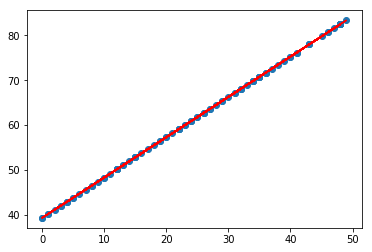

In [107]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.scatter(x, y)
plt.plot(x, y_predicted, color='red')
plt.show()